Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
#anltdate="2021-01-05"
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

2021-01-04
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-------

In [2]:
#sc.stop()
#exit()
import os 
# printing environment variables
print(os.environ)

environ({'PACKAGES': 'io.delta:delta-core_2.11:0.5.0', 'HADOOP_HOME': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7', 'HOSTNAME': '4b57754dbd59', 'OLDPWD': '/home/notebookuser', 'JAVA_HOME': '/usr/lib/jvm/default-java', 'PWD': '/home/notebookuser/notebooks', 'HOME': '/home/notebookuser', 'SPARK_LOCAL_IP': '0.0.0.0', 'SPARK_HOME': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7', 'TERM': 'xterm-color', 'PYSPARK_DRIVER_PYTHON': 'jupyter', 'SHLVL': '1', 'PYTHONPATH': '/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip:/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python:/home/notebookuser/spark/spark-2.4.5-bin-hadoop2.7/python/build:', 'PYSPARK_DRIVER_PYTHON_OPTS': 'notebook', 'PYSPARK_PYTHON': '/home/notebookuser/anaconda3/bin/python', 'PATH': '/home/notebookuser/anaconda3/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin', 'PYSPARK_SUBMIT_ARGS': '--packages io.delta:delta-core_2.11:0.5.0  pyspark-shell', '_': '/usr/bin/nohup',

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

2021-01-04
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
anltdate=datetime.today().strftime('%Y-%m-%d')
print(anltdate)
configs = {"analytics_date":anltdate,"a":1}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

2021-01-04


### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2021-01-04  Afghanistan_nan         0           0.0           0.0   
1  2021-01-04      Albania_nan         0         447.0        1122.0   
2  2021-01-04      Algeria_nan         0         249.0         798.0   
3  2021-01-04      Andorra_nan         0          26.0         143.0   
4  2021-01-04       Angola_nan         0          34.0          89.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         487.0              51526.0               51660.0  35530000.0   
1        3184.0              59438.0               59881.0   2878445.0   
2        2159.0             100408.0              100780.0  41320000.0   
3         371.0               8192.0                8259.0     77239.0   
4         402.0              17642.0               17727.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001450   
1                                       0.020650   
2                                       0.002430   
3                                       0.106072   
4                                       0.000537   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.014502                    134.0   
1                                           0.206497                    443.0   
2                                           0.024300                    372.0   
3                                           1.060720                     67.0   
4                                           0.005368                     85.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    3.771461              69.571426   
1                  153.902542             454.857147   
2                    9.002904             308.428558   
3                  867.437439              53.000000   
4                    2.586238              57.428570   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           2.741345      
1                                         221.230560      
2                                          10.450145      
3                                         960.654602      
4                                           2.446277

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [7]:
print(configs)

{'analytics_date': '2021-01-04', 'a': 1}


In [8]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {a} order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2021-01-04         United States_nan          213437.140625   
1   2021-01-04        United Kingdom_nan           52347.714844   
2   2021-01-04                Brazil_nan           35637.285156   
3   2021-01-04                Russia_nan           26253.000000   
4   2021-01-04                 India_nan           18942.572266   
5   2021-01-04               Germany_nan           17893.857422   
6   2021-01-04                 Italy_nan           15392.857422   
7   2021-01-04          South Africa_nan           13762.142578   
8   2021-01-04                France_nan           13610.286133   
9   2021-01-04                Turkey_nan           13476.286133   
10  2021-01-04              Colombia_nan           11617.571289   
11  2021-01-04                 Spain_nan           10473.428711   
12  2021-01-04               Czechia_nan            9983.142578   
13  2021-01-04                Mexico_nan            9331.571289   
14  2021-01-04                Poland_nan            8680.428711   
15  2021-01-04           Netherlands_nan            8311.142578   
16  2021-01-04             Argentina_nan            8203.000000   
17  2021-01-04             Indonesia_nan            7426.428711   
18  2021-01-04               Ukraine_nan            7267.428711   
19  2021-01-04                  Iran_nan            6138.428711   
20  2021-01-04                Sweden_nan            5904.428711   
21  2021-01-04                Israel_nan            5724.571289   
22  2021-01-04              Portugal_nan            4668.714355   
23  2021-01-04               Romania_nan            3517.142822   
24  2021-01-04           Switzerland_nan            3442.714355   
25  2021-01-04                 Japan_nan            3411.571533   
26  2021-01-04                Panama_nan            3197.000000   
27  2021-01-04            Canada_Ontario            3101.857178   
28  2021-01-04              Slovakia_nan            2848.571533   
29  2021-01-04                 Chile_nan            2583.714355   
30  2021-01-04               Lebanon_nan            2578.857178   
31  2021-01-04                Serbia_nan            2544.285645   
32  2021-01-04             Canada_Quebec            2519.857178   
33  2021-01-04             Lithuania_nan            2291.285645   
34  2021-01-04               Ireland_nan            2251.142822   
35  2021-01-04               Denmark_nan            2194.857178   
36  2021-01-04              Pakistan_nan            2174.285645   
37  2021-01-04              Malaysia_nan            1997.285767   
38  2021-01-04               Austria_nan            1982.285767   
39  2021-01-04               Belarus_nan            1887.857178   
40  2021-01-04                  Peru_nan            1793.285767   
41  2021-01-04               Tunisia_nan            1707.428589   
42  2021-01-04               Hungary_nan            1705.000000   
43  2021-01-04  United Arab Emirates_nan            1627.857178   
44  2021-01-04               Belgium_nan            1590.571411   
45  2021-01-04               Morocco_nan            1581.000000   
46  2021-01-04              Slovenia_nan            1468.571411   
47  2021-01-04                Jordan_nan            1466.000000   
48  2021-01-04                 Egypt_nan            1378.000000   
49  2021-01-04    West Bank and Gaza_nan            1160.857178   
50  2021-01-04               Croatia_nan            1146.857178   
51  2021-01-04           Philippines_nan            1131.571411   
52  2021-01-04               Bolivia_nan            1116.857178   
53  2021-01-04               Georgia_nan            1080.571411   
54  2021-01-04            Canada_Alberta             982.285706   
55  2021-01-04          Korea, South_nan             940.571411   
56  2021-01-04    Dominican Republic_nan             938.142883   
57  2021-01-04            Costa Rica_nan             904.428589   
58  2021-01-04                  Iraq_nan             882.

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2021-01-04           United States_nan          213437.140625   
1   2021-01-04          United Kingdom_nan           52347.714844   
2   2021-01-04                  Brazil_nan           35637.285156   
3   2021-01-04                  Russia_nan           26253.000000   
4   2021-01-04                 Germany_nan           17893.857422   
5   2021-01-04                   Italy_nan           15392.857422   
6   2021-01-04            South Africa_nan           13762.142578   
7   2021-01-04                  France_nan           13610.286133   
8   2021-01-04                  Turkey_nan           13476.286133   
9   2021-01-04                Colombia_nan           11617.571289   
10  2021-01-04                   Spain_nan           10473.428711   
11  2021-01-04                 Czechia_nan            9983.142578   
12  2021-01-04                  Mexico_nan            9331.571289   
13  2021-01-04                  Poland_nan            8680.428711   
14  2021-01-04             Netherlands_nan            8311.142578   
15  2021-01-04               Argentina_nan            8203.000000   
16  2021-01-04                 Ukraine_nan            7267.428711   
17  2021-01-04                    Iran_nan            6138.428711   
18  2021-01-04                  Sweden_nan            5904.428711   
19  2021-01-04                  Israel_nan            5724.571289   
20  2021-01-04                Portugal_nan            4668.714355   
21  2021-01-04                 Romania_nan            3517.142822   
22  2021-01-04             Switzerland_nan            3442.714355   
23  2021-01-04                  Panama_nan            3197.000000   
24  2021-01-04              Canada_Ontario            3101.857178   
25  2021-01-04                Slovakia_nan            2848.571533   
26  2021-01-04                   Chile_nan            2583.714355   
27  2021-01-04                 Lebanon_nan            2578.857178   
28  2021-01-04                  Serbia_nan            2544.285645   
29  2021-01-04               Canada_Quebec            2519.857178   
..         ...                         ...                    ...   
41  2021-01-04                  Jordan_nan            1466.000000   
42  2021-01-04      West Bank and Gaza_nan            1160.857178   
43  2021-01-04                 Croatia_nan            1146.857178   
44  2021-01-04                 Bolivia_nan            1116.857178   
45  2021-01-04                 Georgia_nan            1080.571411   
46  2021-01-04              Canada_Alberta             982.285706   
47  2021-01-04      Dominican Republic_nan             938.142883   
48  2021-01-04              Costa Rica_nan             904.428589   
49  2021-01-04                  Latvia_nan             881.000000   
50  2021-01-04              Azerbaijan_nan             793.428589   
51  2021-01-04                Bulgaria_nan             762.142883   
52  2021-01-04                Paraguay_nan             664.428589   
53  2021-01-04                  Greece_nan             663.285706   
54  2021-01-04                 Moldova_nan             645.428589   
55  2021-01-04                  Cyprus_nan             616.714294   
56  2021-01-04                Honduras_nan             610.285706   
57  2021-01-04                 Uruguay_nan             585.000000   
58  2021-01-04                 Estonia_nan             534.142883   
59  2021-01-04                  Norway_nan             522.428589   
60  2021-01-04     Canada_British Columbia             483.000000   
61  2021-01-04                 Namibia_nan             456.142853   
62  2021-01-04                 Albania_nan             454.857147   
63  2021-01-04                   Libya_nan             433.285706   
64  2021-01-04  Bosnia and Herzegovina_nan             422.000000   
65  2021-01-04              Montenegro_nan             357.285706   
66  2021-01-04         North Macedonia_nan             329.000000   
67  2021

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2021-01-04         United States_nan          213437.140625   
1   2021-01-04        United Kingdom_nan           52347.714844   
2   2021-01-04                Russia_nan           26253.000000   
3   2021-01-04               Germany_nan           17893.857422   
4   2021-01-04                 Italy_nan           15392.857422   
5   2021-01-04          South Africa_nan           13762.142578   
6   2021-01-04                France_nan           13610.286133   
7   2021-01-04              Colombia_nan           11617.571289   
8   2021-01-04                 Spain_nan           10473.428711   
9   2021-01-04               Czechia_nan            9983.142578   
10  2021-01-04                Poland_nan            8680.428711   
11  2021-01-04           Netherlands_nan            8311.142578   
12  2021-01-04             Argentina_nan            8203.000000   
13  2021-01-04                Sweden_nan            5904.428711   
14  2021-01-04                Israel_nan            5724.571289   
15  2021-01-04              Portugal_nan            4668.714355   
16  2021-01-04               Romania_nan            3517.142822   
17  2021-01-04           Switzerland_nan            3442.714355   
18  2021-01-04                Panama_nan            3197.000000   
19  2021-01-04            Canada_Ontario            3101.857178   
20  2021-01-04              Slovakia_nan            2848.571533   
21  2021-01-04               Lebanon_nan            2578.857178   
22  2021-01-04                Serbia_nan            2544.285645   
23  2021-01-04             Canada_Quebec            2519.857178   
24  2021-01-04             Lithuania_nan            2291.285645   
25  2021-01-04               Ireland_nan            2251.142822   
26  2021-01-04               Denmark_nan            2194.857178   
27  2021-01-04               Austria_nan            1982.285767   
28  2021-01-04               Belarus_nan            1887.857178   
29  2021-01-04               Hungary_nan            1705.000000   
30  2021-01-04  United Arab Emirates_nan            1627.857178   
31  2021-01-04              Slovenia_nan            1468.571411   
32  2021-01-04    West Bank and Gaza_nan            1160.857178   
33  2021-01-04               Croatia_nan            1146.857178   
34  2021-01-04               Georgia_nan            1080.571411   
35  2021-01-04            Canada_Alberta             982.285706   
36  2021-01-04            Costa Rica_nan             904.428589   
37  2021-01-04                Latvia_nan             881.000000   
38  2021-01-04                Cyprus_nan             616.714294   
39  2021-01-04               Estonia_nan             534.142883   
40  2021-01-04               Namibia_nan             456.142853   
41  2021-01-04            Montenegro_nan             357.285706   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          902.748047          210479.0   
1                                         1103.052368           54990.0   
2                                          254.354324           23845.0   
3                                          302.589691           10356.0   
4                                          356.316132           14245.0   
5                                          325.738495           11859.0   
6                                          272.244598           12489.0   
7                                          320.384003            9412.0   
8                                          314.247742               0.0   
9                                         1305.633667            5012.0   
10                                         319.973663            5782.0   
11                                         677.275879            7398.0   
12                                         254.600754            5884.0   
13                                         816.818176               0.0   
14 

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2021-01-04                  Brazil_nan           35637.285156   
1   2021-01-04                  Turkey_nan           13476.286133   
2   2021-01-04                 Ukraine_nan            7267.428711   
3   2021-01-04                   Chile_nan            2583.714355   
4   2021-01-04                 Tunisia_nan            1707.428589   
5   2021-01-04                 Belgium_nan            1590.571411   
6   2021-01-04                  Jordan_nan            1466.000000   
7   2021-01-04                 Bolivia_nan            1116.857178   
8   2021-01-04      Dominican Republic_nan             938.142883   
9   2021-01-04                Bulgaria_nan             762.142883   
10  2021-01-04                Paraguay_nan             664.428589   
11  2021-01-04                 Moldova_nan             645.428589   
12  2021-01-04                 Uruguay_nan             585.000000   
13  2021-01-04                  Norway_nan             522.428589   
14  2021-01-04     Canada_British Columbia             483.000000   
15  2021-01-04                 Albania_nan             454.857147   
16  2021-01-04  Bosnia and Herzegovina_nan             422.000000   
17  2021-01-04         North Macedonia_nan             329.000000   
18  2021-01-04                 Armenia_nan             313.285706   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          234.721649           17341.0   
1                                          233.471100            9877.0   
2                                          232.356003            4881.0   
3                                          189.570648            2289.0   
4                                          202.714249            1565.0   
5                                          191.852417             842.0   
6                                          201.153885            1540.0   
7                                          133.365875             606.0   
8                                          121.335922             366.0   
9                                          153.322327             171.0   
10                                         130.799423             355.0   
11                                         223.888245             179.0   
12                                         235.944855             548.0   
13                                         136.531647             450.0   
14                                         132.588242               0.0   
15                                         221.230560             447.0   
16                                         179.846252             502.0   
17                                         221.762161             235.0   
18                                         148.072571             229.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        57773.0      249461.0            7733746.0  212559008.0   
1        33260.0       94334.0            2241912.0   80810000.0   
2        20140.0       50872.0            1107137.0   43787980.0   
3         9218.0       18086.0             618191.0   19081012.0   
4         4404.0       11952.0             143544.0   11791968.0   
5         3515.0       11134.0             650011.0   11606838.0   
6         3714.0       10262.0             298208.0   10203134.0   
7         2537.0        7818.0             162661.0   11724139.0   
8         2546.0        6567.0             173331.0   10824494.0   
9          785.0        5335.0             203051.0    6959195.0   
10        1141.0        4651.0             109073.0    7111652.0   
11        1055.0        4518.0             145873.0    4035942.0   
12        1704.0        4095.0              20823.0    3471150.0   
13        1149.0        3657.0              50716.0    5357000.0   
14           0.0        3381.0              51990.0    5100000.0   
15        1122.0        3184.0          

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date          region  delta_roling_7day_AVG  \
0  2021-01-04      Mexico_nan            9331.571289   
1  2021-01-04        Iran_nan            6138.428711   
2  2021-01-04    Malaysia_nan            1997.285767   
3  2021-01-04  Azerbaijan_nan             793.428589   
4  2021-01-04      Greece_nan             663.285706   
5  2021-01-04    Honduras_nan             610.285706   
6  2021-01-04       Libya_nan             433.285706   
7  2021-01-04      Kuwait_nan             241.428574   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         101.555656            5211.0   
1                                         102.315666            5960.0   
2                                          88.431374            1704.0   
3                                         109.767654             803.0   
4                                          86.461823             390.0   
5                                          86.262886             225.0   
6                                          88.280342             670.0   
7                                          81.701714             269.0   

   3_day_change  7_day_change  confirmed_yesterday   population  \
0       22661.0       65321.0            1448755.0  128640792.0   
1       18292.0       42969.0            1243434.0   83993000.0   
2        6067.0       13981.0             119077.0   31620000.0   
3        1565.0        5554.0             220265.0   10119557.0   
4        1249.0        4643.0             140099.0   10740000.0   
5        1542.0        4272.0             123369.0    9904607.0   
6        1137.0        3033.0             101414.0    6871292.0   
7         759.0        1690.0             151343.0    4137000.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.112620                  12303.0   
1                                           0.148040                   6166.0   
2                                           0.037659                   2062.0   
3                                           0.217664                    973.0   
4                                           0.130447                    889.0   
5                                           0.124558                    841.0   
6                                           0.147592                    390.0   
7                                           0.365830                    224.0   

   delta_new_cases_per_1M_hab  
0                   95.638405  
1                   73.410881  
2                   65.211891  
3                   96.150452  
4                   82.774673  
5                   84.909981  
6                   56.757885  
7                   54.145515

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2021-01-04        Congo (Kinshasa)_nan             180.428574   
1   2021-01-04                    Cuba_nan             174.142853   
2   2021-01-04              Mauritania_nan             164.571426   
3   2021-01-04                 Senegal_nan             155.428574   
4   2021-01-04              Mozambique_nan             149.142853   
5   2021-01-04              Kyrgyzstan_nan             145.000000   
6   2021-01-04                    Oman_nan             133.142853   
7   2021-01-04                   Kenya_nan             125.571426   
8   2021-01-04            Saudi Arabia_nan             120.142860   
9   2021-01-04                Botswana_nan             111.428574   
10  2021-01-04                   Ghana_nan             109.571426   
11  2021-01-04            Burkina Faso_nan             101.000000   
12  2021-01-04                  Rwanda_nan             100.857140   
13  2021-01-04                   Syria_nan              96.714287   
14  2021-01-04                    Mali_nan              89.142860   
15  2021-01-04                Cameroon_nan              81.571426   
16  2021-01-04              Uzbekistan_nan              72.428574   
17  2021-01-04           Cote d'Ivoire_nan              70.857140   
18  2021-01-04                  Malawi_nan              70.000000   
19  2021-01-04             Afghanistan_nan              69.571426   
20  2021-01-04                 Lesotho_nan              68.714287   
21  2021-01-04                  Angola_nan              57.428570   
22  2021-01-04                   Niger_nan              50.714287   
23  2021-01-04             China_Hong Kong              50.571430   
24  2021-01-04                 Jamaica_nan              46.571430   
25  2021-01-04                 Eritrea_nan              30.428572   
26  2021-01-04     Congo (Brazzaville)_nan              28.428572   
27  2021-01-04               Singapore_nan              24.714285   
28  2021-01-04              France_Reunion              18.285715   
29  2021-01-04   Australia_New South Wales              13.285714   
30  2021-01-04                 Iceland_nan              10.142858   
31  2021-01-04               Nicaragua_nan               7.857143   
32  2021-01-04                 Vietnam_nan               7.571429   
33  2021-01-04              China_Liaoning               5.714286   
34  2021-01-04             New Zealand_nan               5.285714   
35  2021-01-04              China_Shanghai               5.142857   
36  2021-01-04          Australia_Victoria               4.428571   
37  2021-01-04                 Taiwan*_nan               3.857143   
38  2021-01-04               China_Beijing               2.857143   
39  2021-01-04           France_Martinique               2.714286   
40  2021-01-04                Cambodia_nan               2.571429   
41  2021-01-04        Australia_Queensland               2.000000   
42  2021-01-04             China_Guangdong               2.000000   
43  2021-01-04   Australia_South Australia               1.571429   
44  2021-01-04               China_Shaanxi               1.571429   
45  2021-01-04                China_Fujian               1.285714   
46  2021-01-04               China_Tianjin               1.285714   
47  2021-01-04          China_Heilongjiang               1.142857   
48  2021-01-04        China_Inner Mongolia               1.142857   
49  2021-01-04               China_Sichuan               1.142857   
50  2021-01-04  United Kingdom_Isle of Man               0.857143   
51  2021-01-04                 China_Hebei               0.714286   
52  2021-01-04              China_Shandong               0.285714   
53  2021-01-04                 China_Henan               0.142857   
54  2021-01-04                China_Shanxi               0.142857   
55  2021-01-04                China_Yunnan               0.142857   
56  2021-01-04              China_Zhejiang               0.142857   
57  2021

In [15]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60    

date                      region  delta_roling_7day_AVG  \
0   2021-01-04        Congo (Kinshasa)_nan             180.428574   
1   2021-01-04                    Cuba_nan             174.142853   
2   2021-01-04              Mauritania_nan             164.571426   
3   2021-01-04                 Senegal_nan             155.428574   
4   2021-01-04              Mozambique_nan             149.142853   
5   2021-01-04              Kyrgyzstan_nan             145.000000   
6   2021-01-04                    Oman_nan             133.142853   
7   2021-01-04                   Kenya_nan             125.571426   
8   2021-01-04            Saudi Arabia_nan             120.142860   
9   2021-01-04                Botswana_nan             111.428574   
10  2021-01-04                   Ghana_nan             109.571426   
11  2021-01-04            Burkina Faso_nan             101.000000   
12  2021-01-04                  Rwanda_nan             100.857140   
13  2021-01-04                   Syria_nan              96.714287   
14  2021-01-04                    Mali_nan              89.142860   
15  2021-01-04                Cameroon_nan              81.571426   
16  2021-01-04              Uzbekistan_nan              72.428574   
17  2021-01-04           Cote d'Ivoire_nan              70.857140   
18  2021-01-04                  Malawi_nan              70.000000   
19  2021-01-04             Afghanistan_nan              69.571426   
20  2021-01-04                 Lesotho_nan              68.714287   
21  2021-01-04                  Angola_nan              57.428570   
22  2021-01-04                   Niger_nan              50.714287   
23  2021-01-04             China_Hong Kong              50.571430   
24  2021-01-04                 Jamaica_nan              46.571430   
25  2021-01-04                 Eritrea_nan              30.428572   
26  2021-01-04     Congo (Brazzaville)_nan              28.428572   
27  2021-01-04               Singapore_nan              24.714285   
28  2021-01-04              France_Reunion              18.285715   
29  2021-01-04   Australia_New South Wales              13.285714   
30  2021-01-04                 Iceland_nan              10.142858   
31  2021-01-04               Nicaragua_nan               7.857143   
32  2021-01-04                 Vietnam_nan               7.571429   
33  2021-01-04              China_Liaoning               5.714286   
34  2021-01-04             New Zealand_nan               5.285714   
35  2021-01-04              China_Shanghai               5.142857   
36  2021-01-04          Australia_Victoria               4.428571   
37  2021-01-04                 Taiwan*_nan               3.857143   
38  2021-01-04               China_Beijing               2.857143   
39  2021-01-04           France_Martinique               2.714286   
40  2021-01-04                Cambodia_nan               2.571429   
41  2021-01-04        Australia_Queensland               2.000000   
42  2021-01-04             China_Guangdong               2.000000   
43  2021-01-04   Australia_South Australia               1.571429   
44  2021-01-04               China_Shaanxi               1.571429   
45  2021-01-04                China_Fujian               1.285714   
46  2021-01-04               China_Tianjin               1.285714   
47  2021-01-04          China_Heilongjiang               1.142857   
48  2021-01-04        China_Inner Mongolia               1.142857   
49  2021-01-04               China_Sichuan               1.142857   
50  2021-01-04  United Kingdom_Isle of Man               0.857143   
51  2021-01-04                 China_Hebei               0.714286   
52  2021-01-04              China_Shandong               0.285714   
53  2021-01-04                 China_Henan               0.142857   
54  2021-01-04                China_Shanxi               0.142857   
55  2021-01-04                China_Yunnan               0.142857   
56  2021-01-04              China_Zhejiang               0.142857   
57  2021

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [18]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG < 0.428571 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 ) 
    order by delta_roling_7day_AVG desc, region asc
limit 60  

date                                      region  \
0   2021-01-04                              China_Shandong   
1   2021-01-04                                 China_Henan   
2   2021-01-04                                China_Shanxi   
3   2021-01-04                                China_Yunnan   
4   2021-01-04                              China_Zhejiang   
5   2021-01-04                                 China_Anhui   
6   2021-01-04                             China_Chongqing   
7   2021-01-04                                 China_Gansu   
8   2021-01-04                               China_Guangxi   
9   2021-01-04                               China_Guizhou   
10  2021-01-04                                China_Hainan   
11  2021-01-04                                 China_Hubei   
12  2021-01-04                                 China_Hunan   
13  2021-01-04                               China_Jiangsu   
14  2021-01-04                               China_Jiangxi   
15  2021-01-04                                 China_Jilin   
16  2021-01-04                                 China_Macau   
17  2021-01-04                               China_Ningxia   
18  2021-01-04                               China_Qinghai   
19  2021-01-04                                 China_Tibet   
20  2021-01-04                              China_Xinjiang   
21  2021-01-04                                Holy See_nan   
22  2021-01-04                                   Sudan_nan   
23  2021-01-04  United Kingdom_Falkland Islands (Malvinas)   
24  2021-01-04                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0                0.285714   
1                0.142857   
2                0.142857   
3                0.142857   
4                0.142857   
5                0.000000   
6                0.000000   
7                0.000000   
8                0.000000   
9                0.000000   
10               0.000000   
11               0.000000   
12               0.000000   
13               0.000000   
14               0.000000   
15               0.000000   
16               0.000000   
17               0.000000   
18               0.000000   
19               0.000000   
20               0.000000   
21               0.000000   
22               0.000000   
23               0.000000   
24               0.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                            0.004325               0.0   
1                                            0.002128               0.0   
2                                            0.005479               1.0   
3                                            0.004351               0.0   
4                                            0.003486               0.0   
5                                            0.000000               0.0   
6                                            0.000000               0.0   
7                                            0.000000               0.0   
8                                            0.000000               0.0   
9                                            0.000000               0.0   
10                                           0.000000               0.0   
11                                           0.000000               0.0   
12                                           0.000000               0.0   
13                                           0.000000               0.0   
14                                           0.000000               0.0   
15                                           0.000000               0.0   
16                                           0.000000               0.0   
17                                           0.000000               0.0   
18                                           0.000000               0.0   
19                                           0.000000               0.0   
20                                           0.000000              

In [19]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [20]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [21]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 40 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [22]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 10 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [23]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2021-01-05' and
    delta_roling_7day_AVG >= 5 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 5 and
    population in (10000000.0 )
order by region asc
limit 80

date             region confirmed  1_day_change  3_day_change  \
0  2021-01-04  Netherlands_Aruba         0          32.0          75.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         259.0               5564.0                5607.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.000556   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.005565                     43.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                         4.3                   37.0   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                               5.18

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [24]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2021-01-05' and population in (10000000.0 ) order by region asc
limit 60

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
30                         Equatorial Guinea_nan
31                                      Fiji_nan
32                             France_Guadeloupe
33                                France_Mayotte
34                          France_New Caledonia
35                       France_Saint Barthelemy
36              France_Saint Pierre and Miquelon
37                              France_St Martin
38                      France_Wallis and Futuna
39                                     Gabon_nan
40                                    Gambia_nan
41                                   Grenada_nan
42                             Guinea-Bissau_nan
43                                    Guinea_nan
44                                    Guyana_nan
45                                     Haiti_nan
46                                      Laos_nan
47                                   Liberia_nan
48                                MS Zaandam_nan
49                                Madagascar_nan
50                                  Maldives_nan
51                          Marshall Islands_nan
52                                 Mauritius_nan
53                                  Mongolia_nan
54                             Netherlands_Aruba
55  Netherlands_Bonaire, Sint Eustatius and Saba
56                      Netherlands_Sint Maarten
57                          Papua New Guinea_nan
58                     Saint Kitts and Nevis_nan
59                               Saint Lucia_nan

In [25]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2021-01-05' and region > 'Saint Lucia_nan' and
     population in (10000000.0 ) order by region asc

region
0      Saint Vincent and the Grenadines_nan
1                                 Samoa_nan
2                 Sao Tome and Principe_nan
3                            Seychelles_nan
4                          Sierra Leone_nan
5                       Solomon Islands_nan
6                               Somalia_nan
7                           South Sudan_nan
8                            Tajikistan_nan
9                              Tanzania_nan
10                          Timor-Leste_nan
11                                 Togo_nan
12                  Trinidad and Tobago_nan
13                  United Kingdom_Anguilla
14                   United Kingdom_Bermuda
15    United Kingdom_British Virgin Islands
16            United Kingdom_Cayman Islands
17  United Kingdom_Turks and Caicos Islands
18                              Vanuatu_nan
19                                Yemen_nan

In [26]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [27]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-14' and  date <= '2021-01-05' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [28]:
sc.stop()

In [29]:
%matplotlib inline
##%matplotlib notebook

In [30]:
%matplotlib notebook

<IPython.core.display.Javascript object>


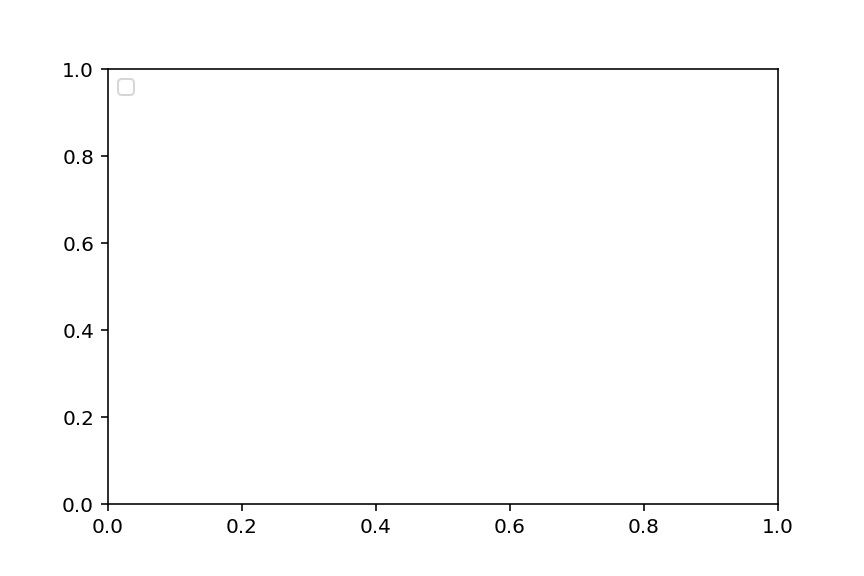

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


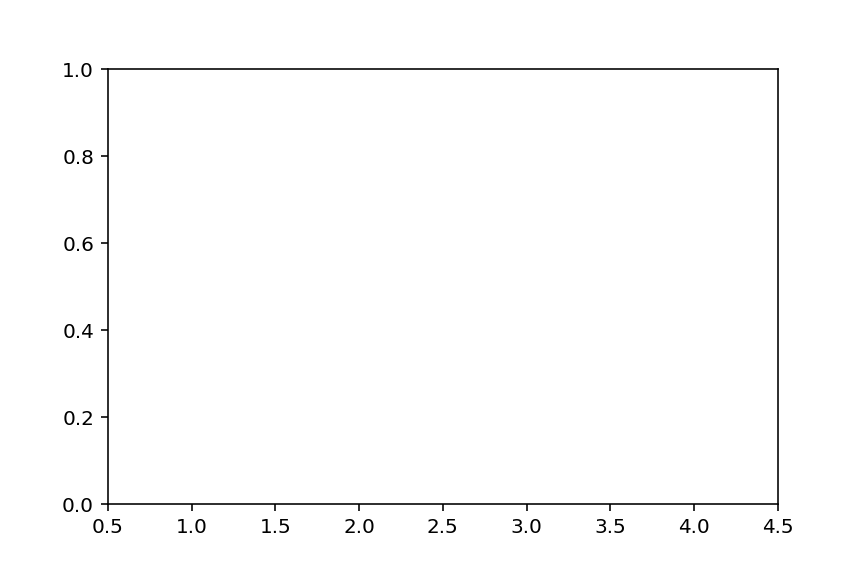

In [31]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [32]:
#### Turn-off automation
#
#%matplotlib notebook
%matplotlib inline

<IPython.core.display.Javascript object>


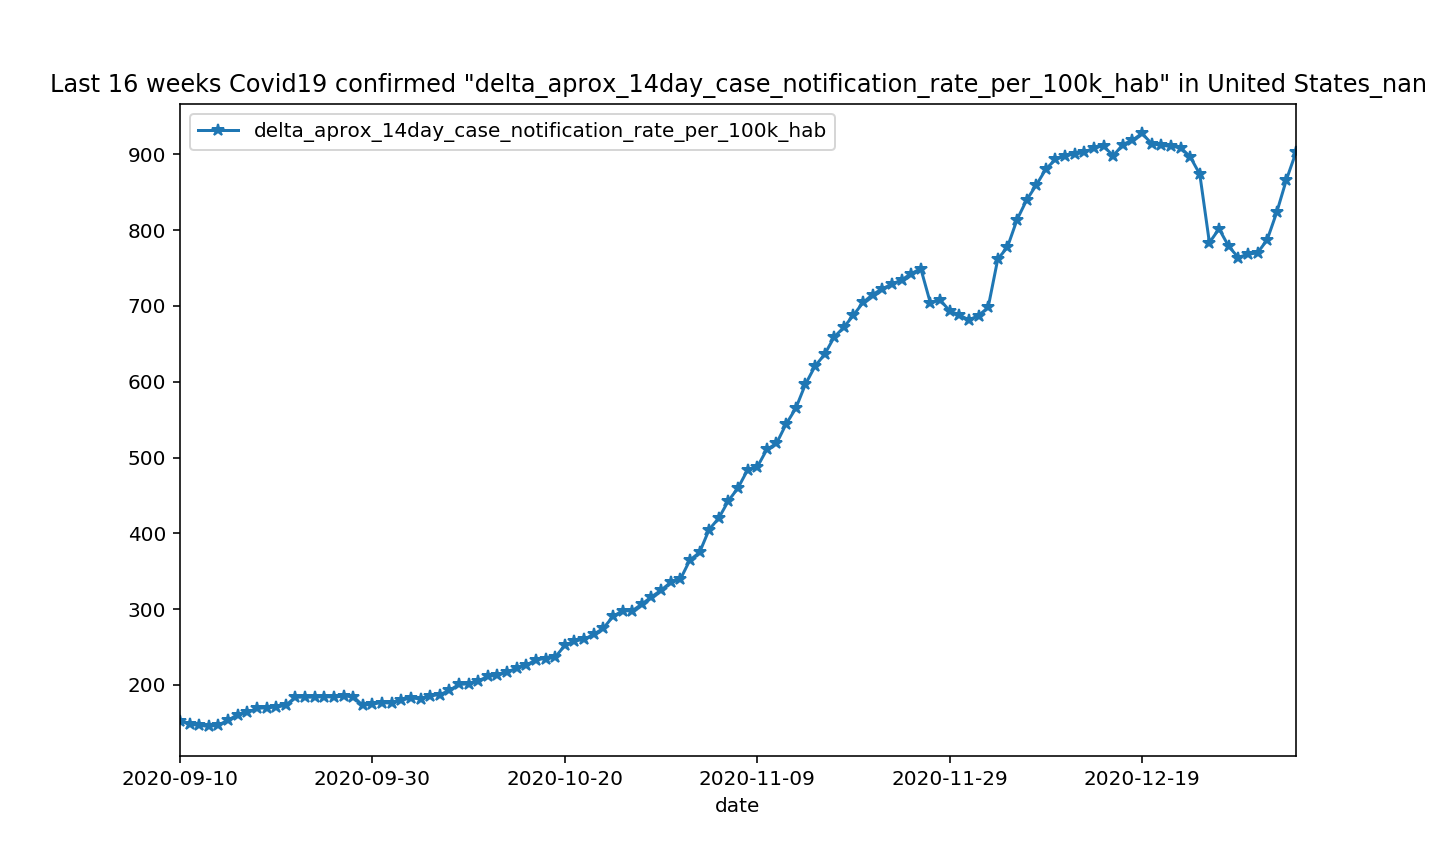

In [33]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


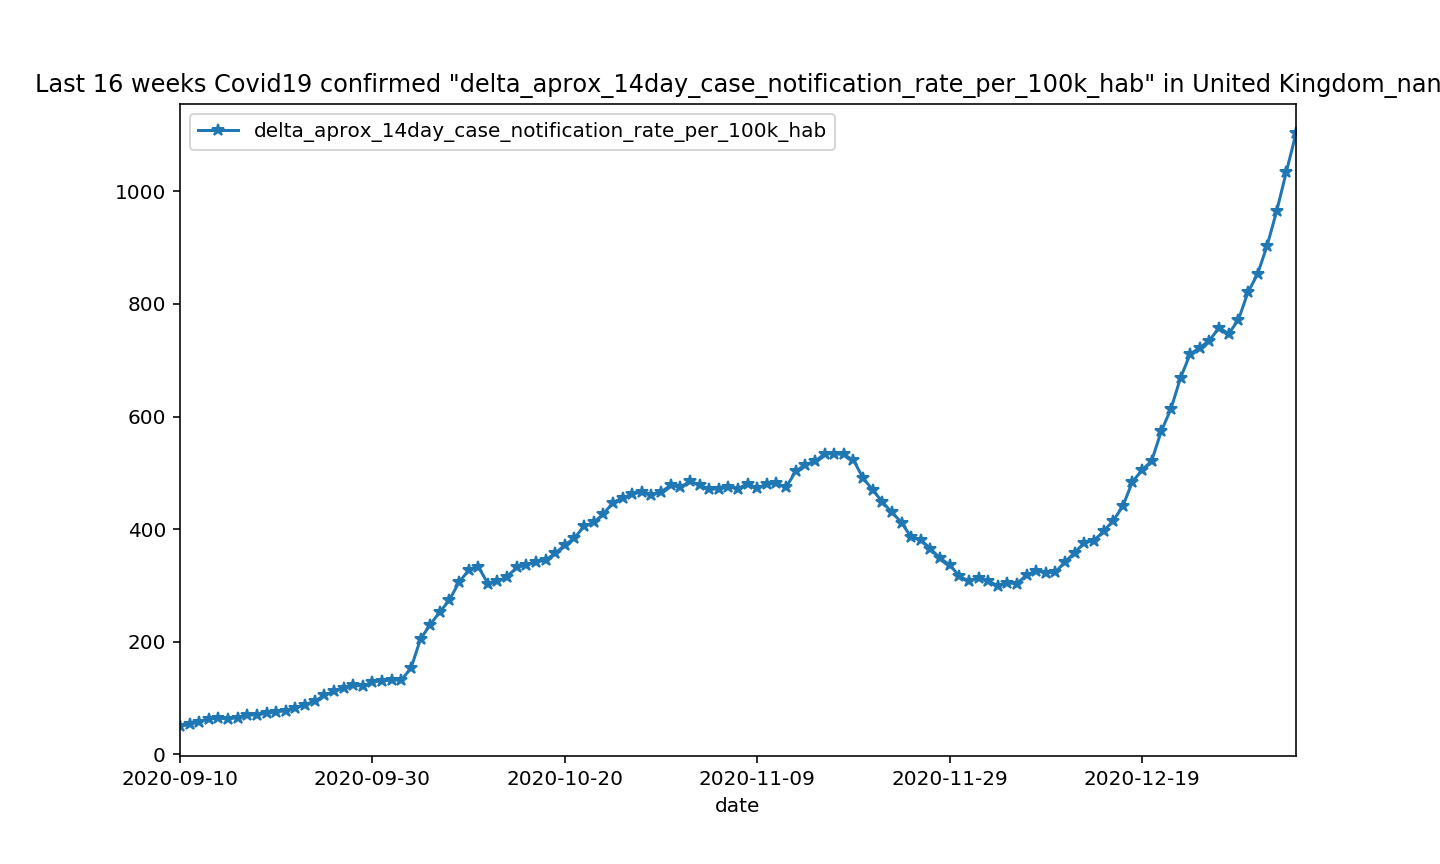

In [34]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


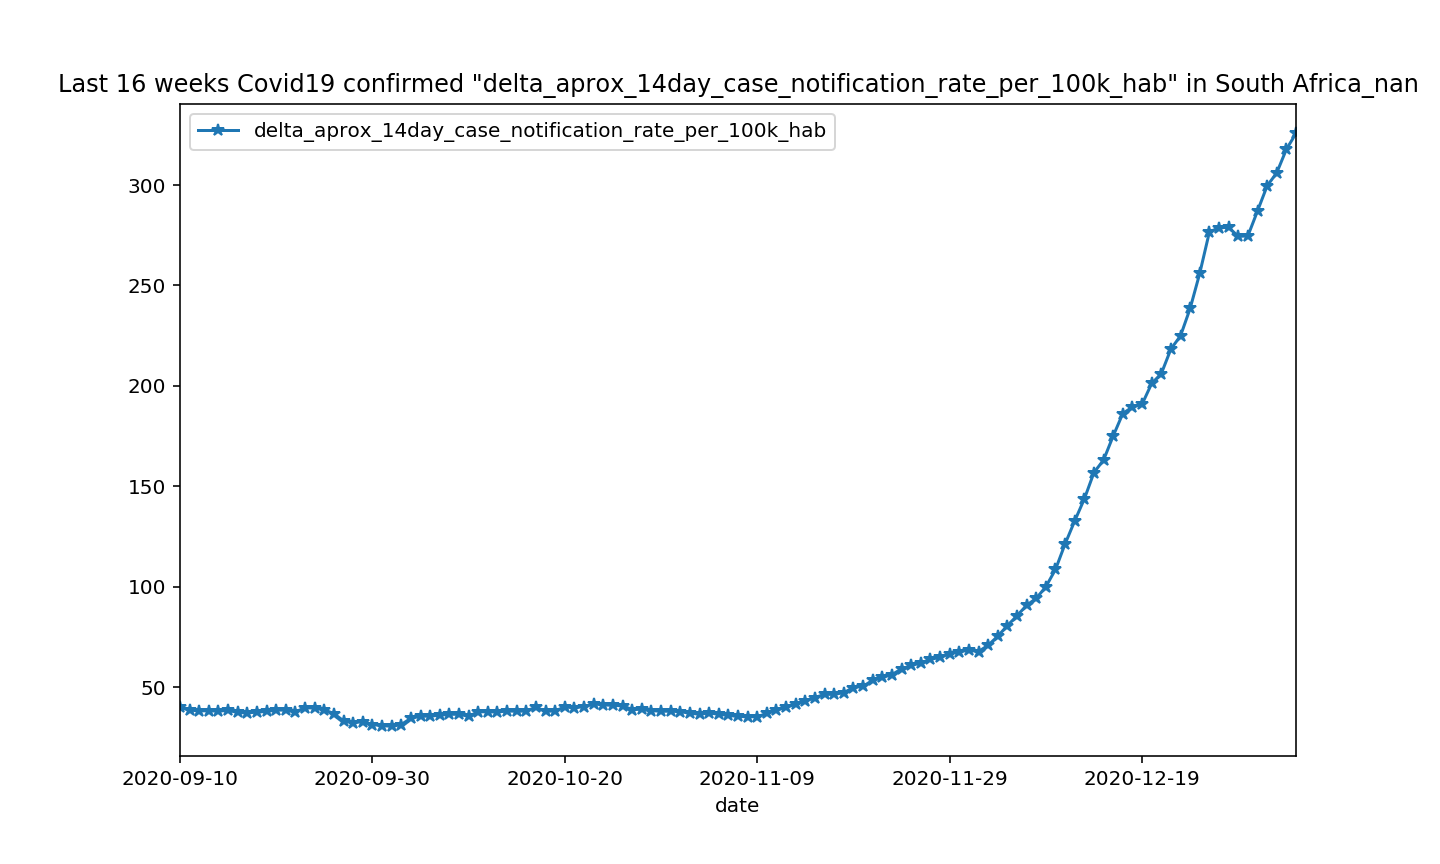

In [35]:
region='South Africa_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


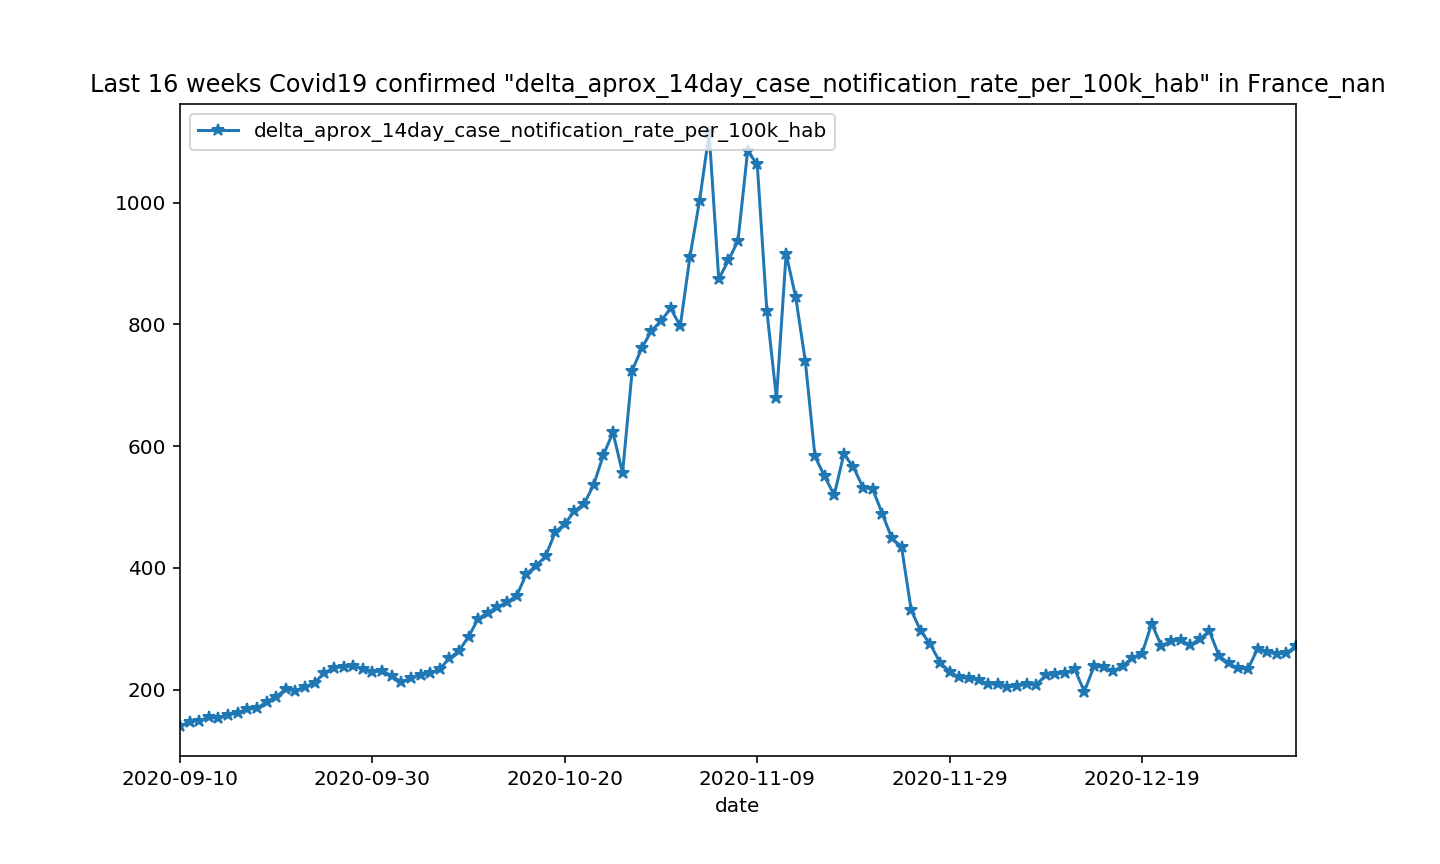

In [36]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


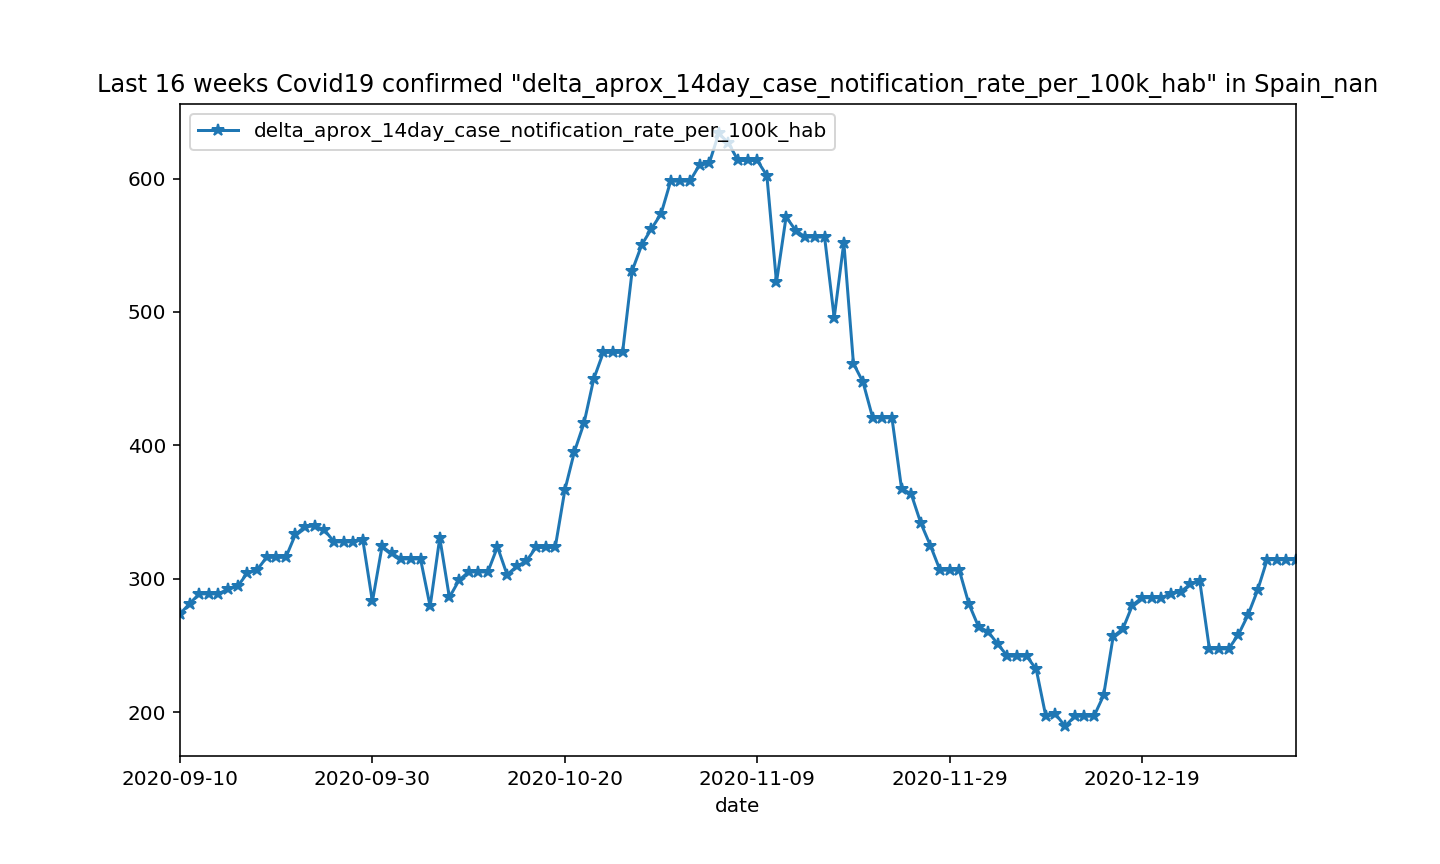

In [37]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


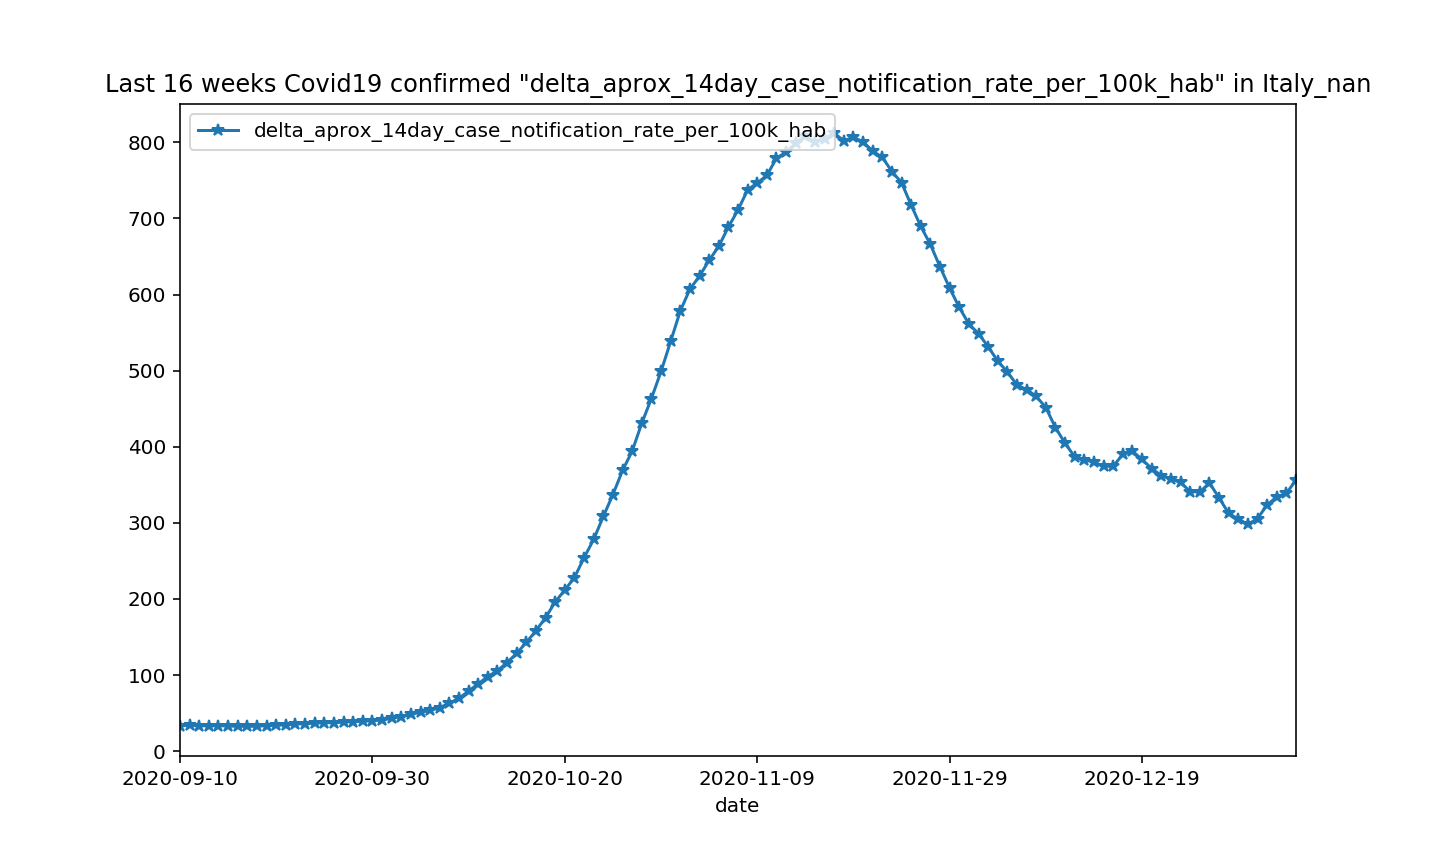

In [38]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


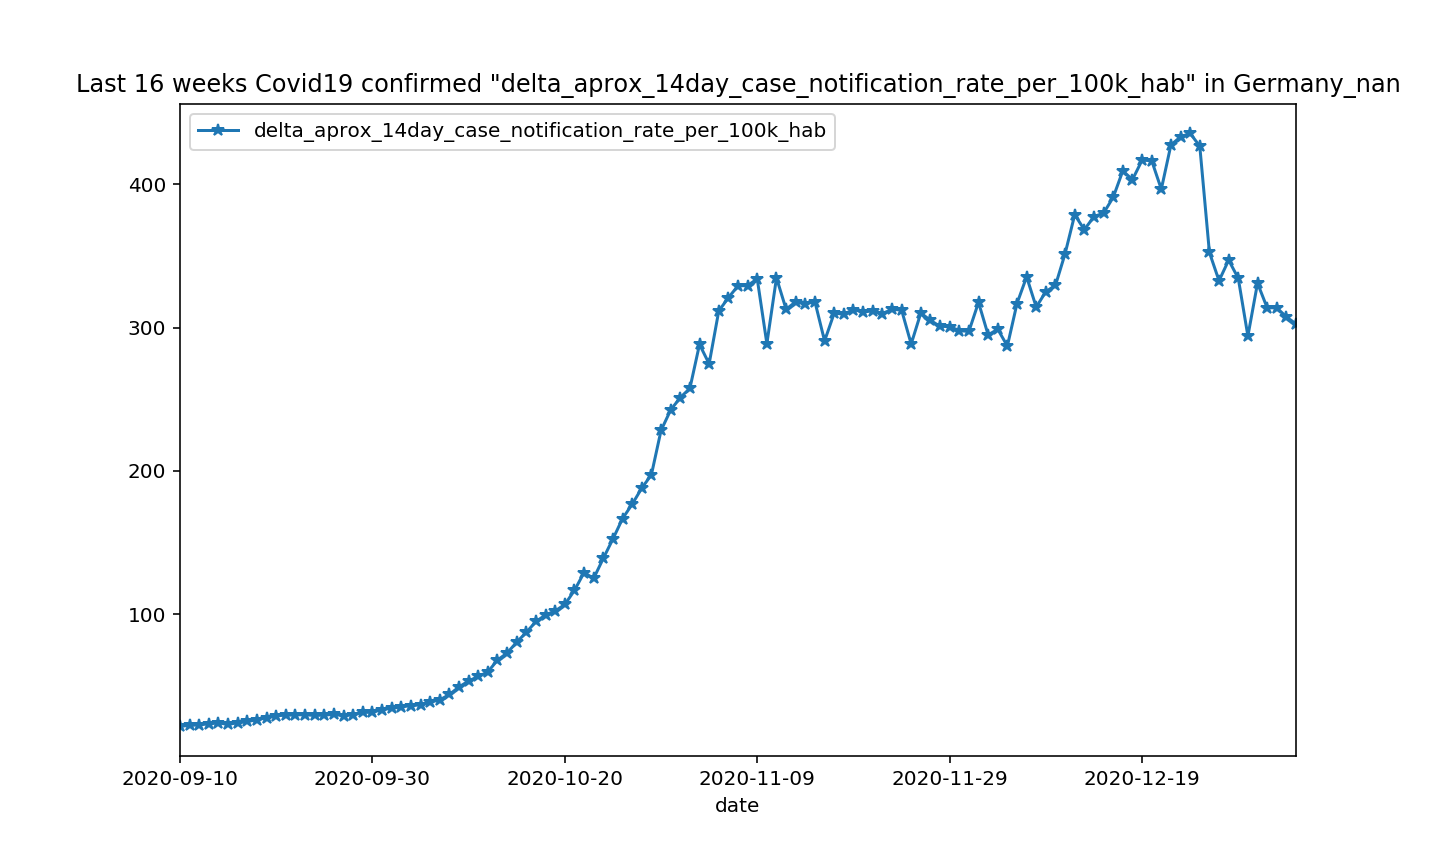

In [39]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


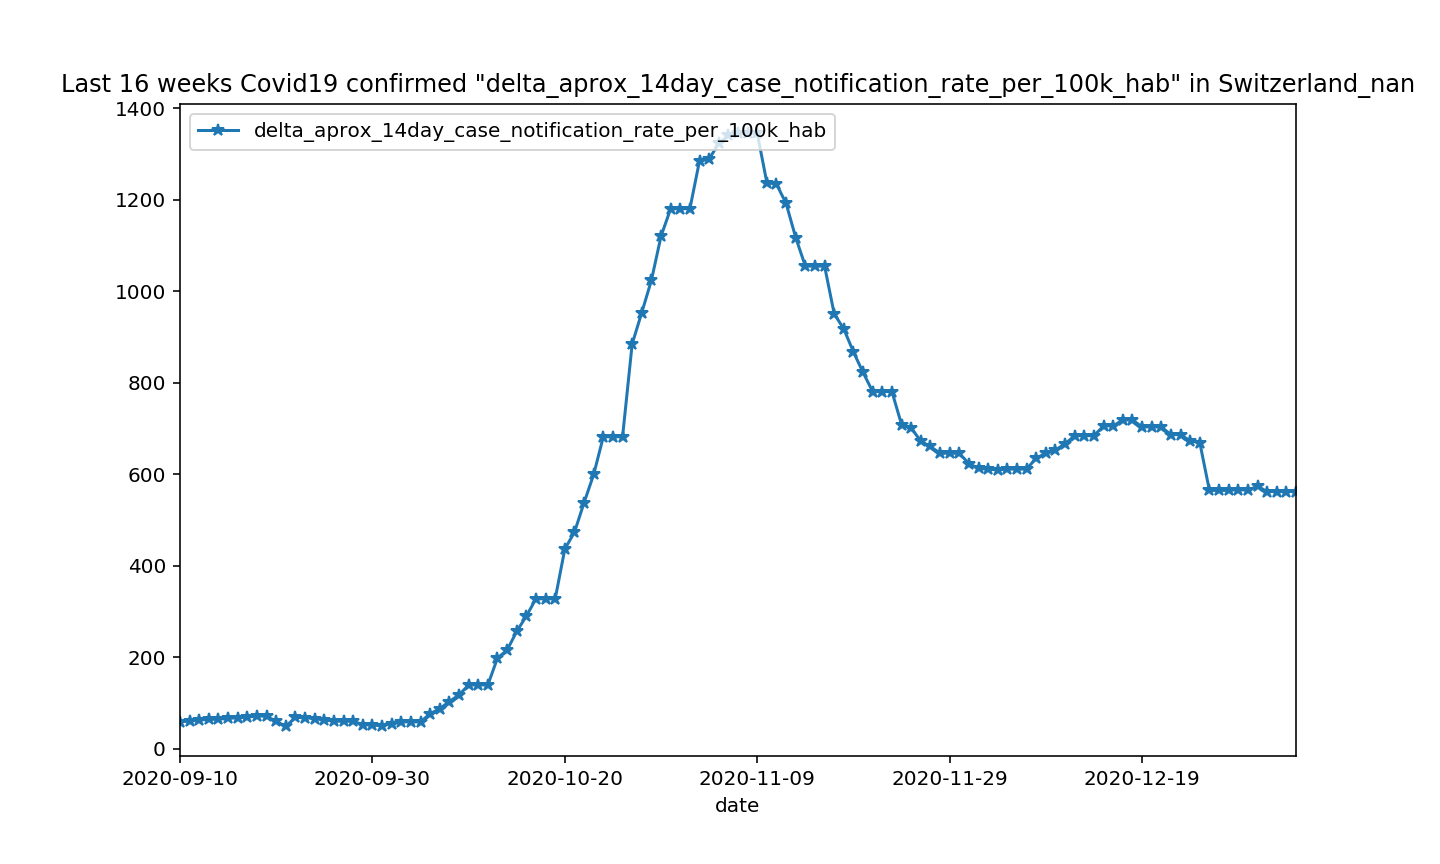

In [40]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


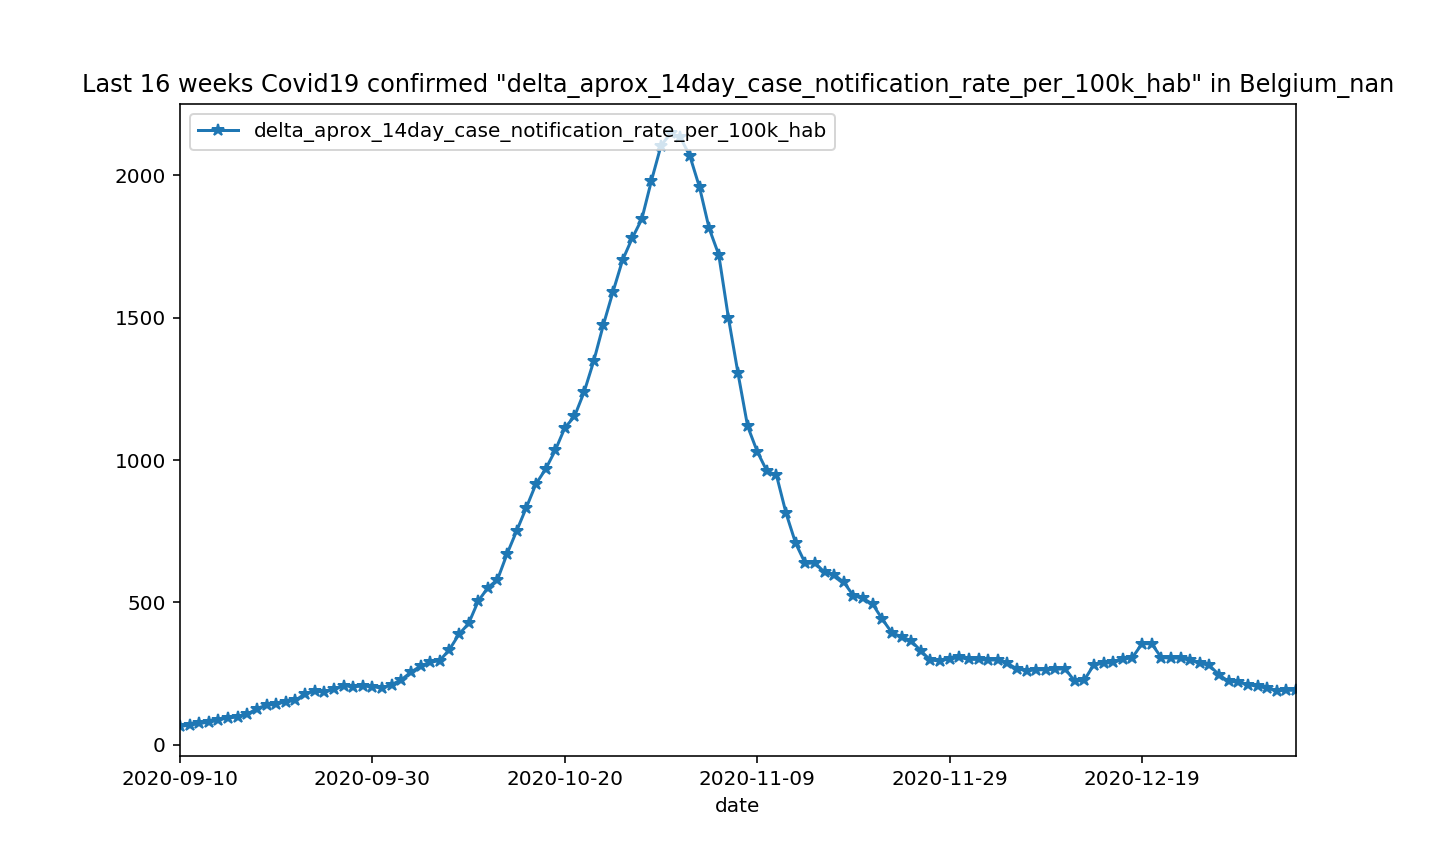

In [41]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


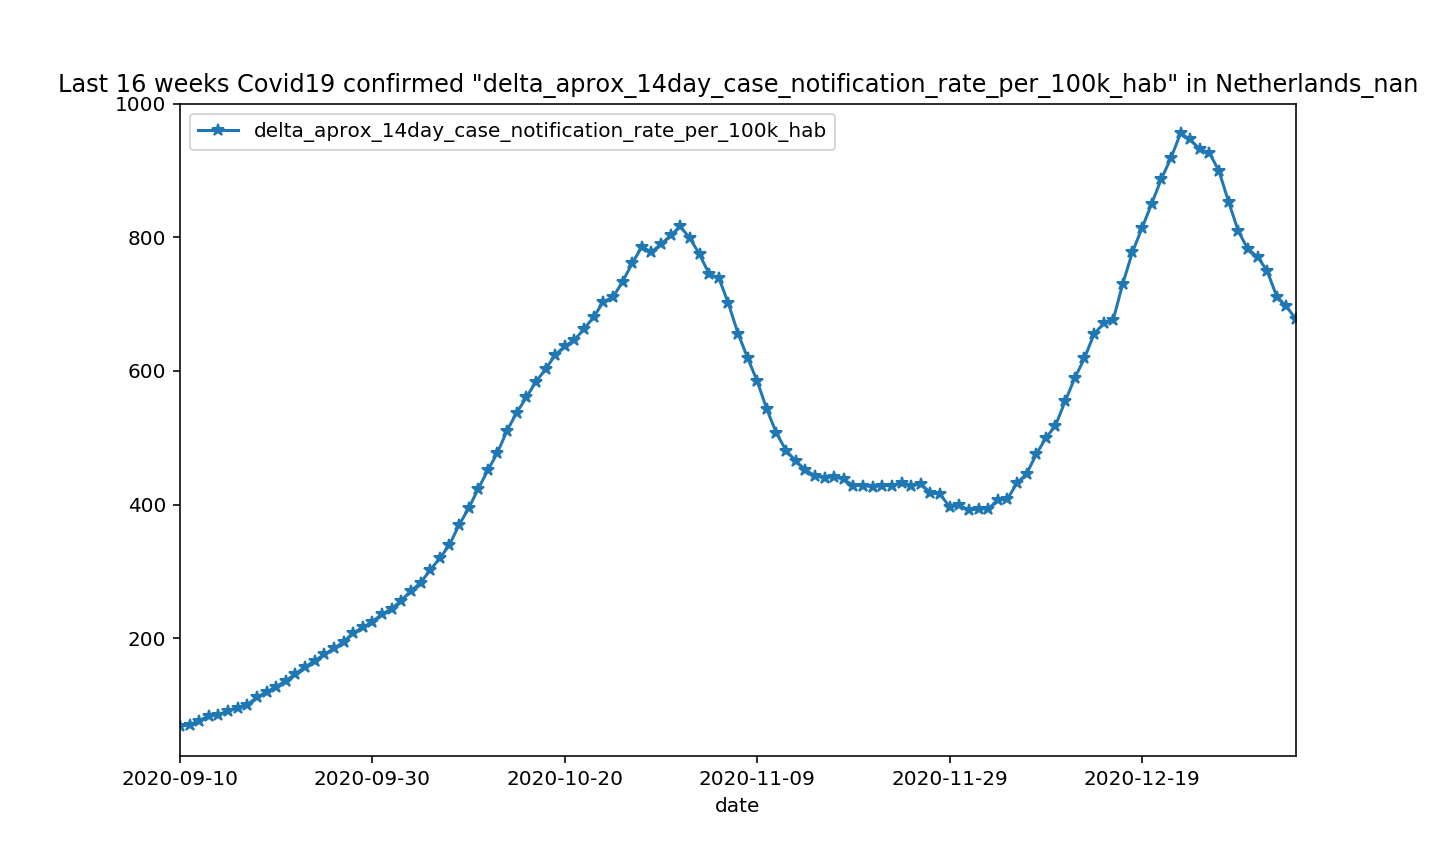

In [42]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


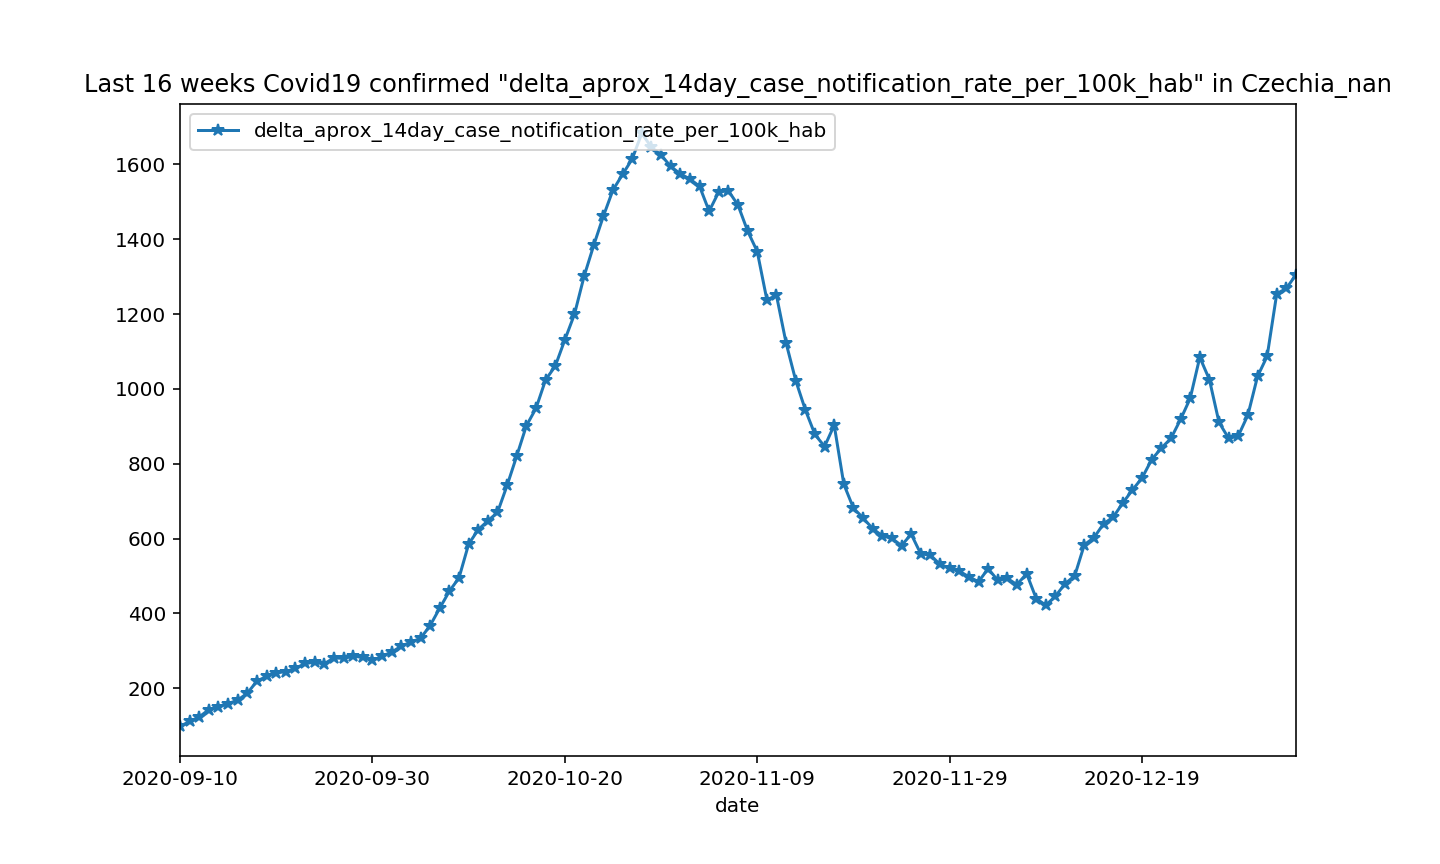

In [43]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


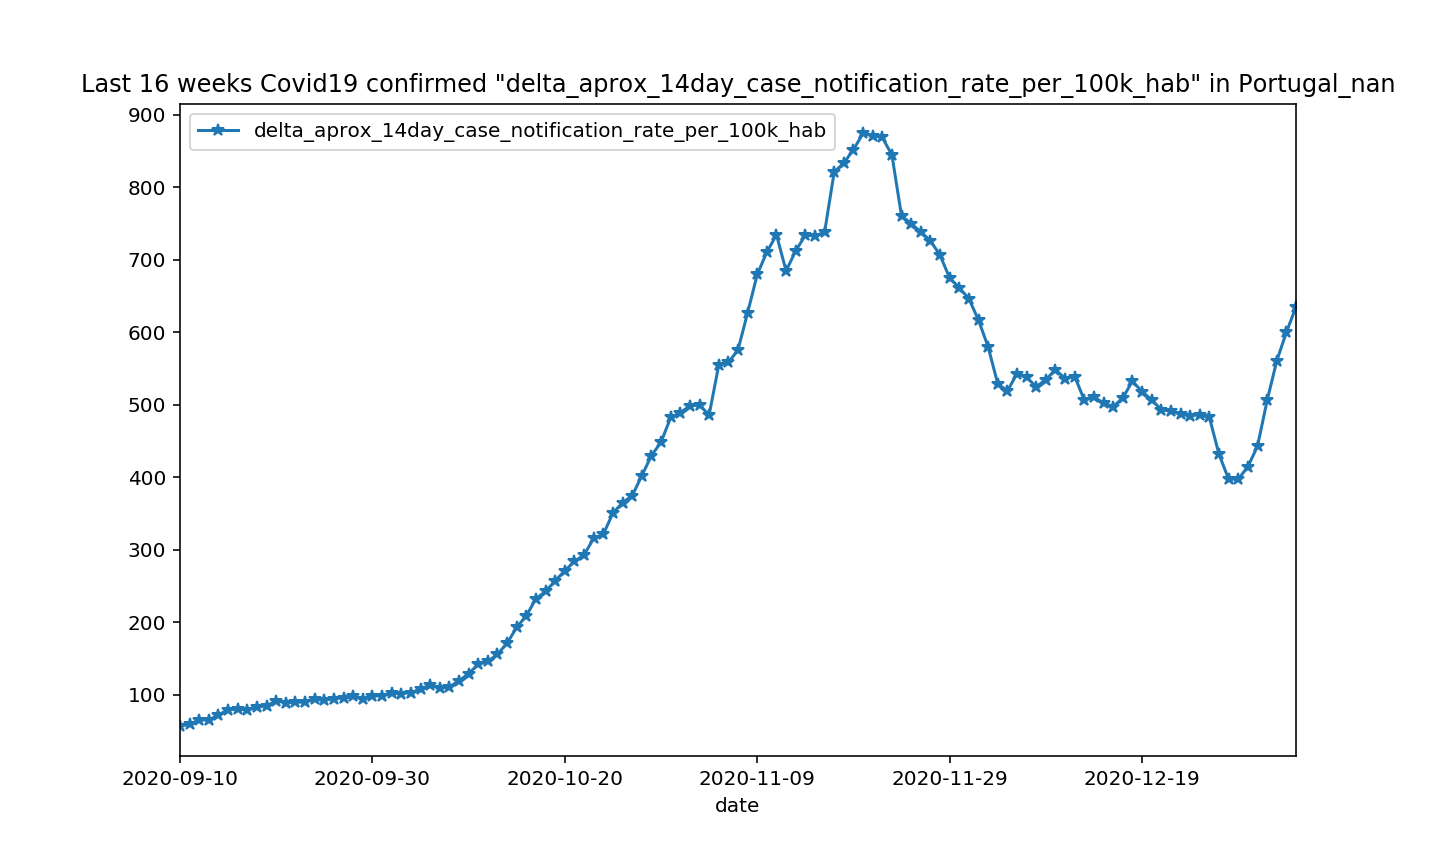

In [44]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [45]:
#%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


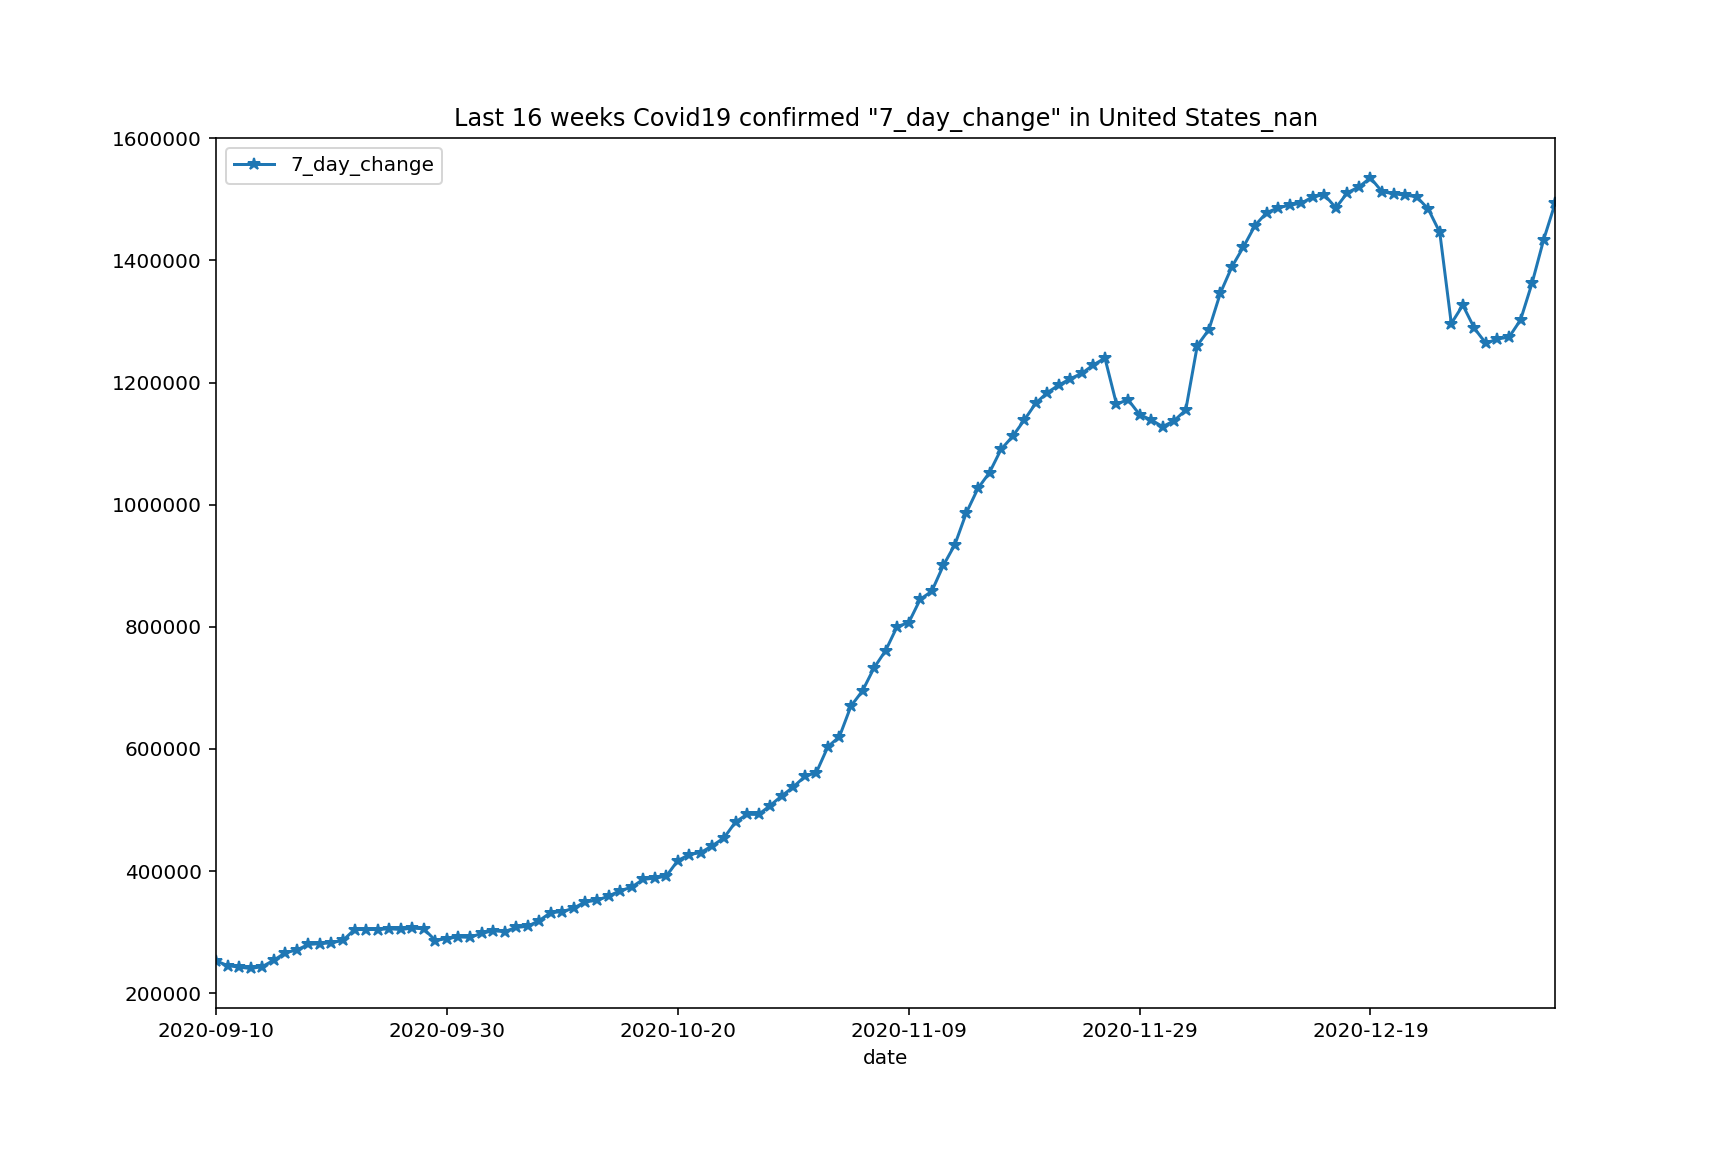

In [46]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


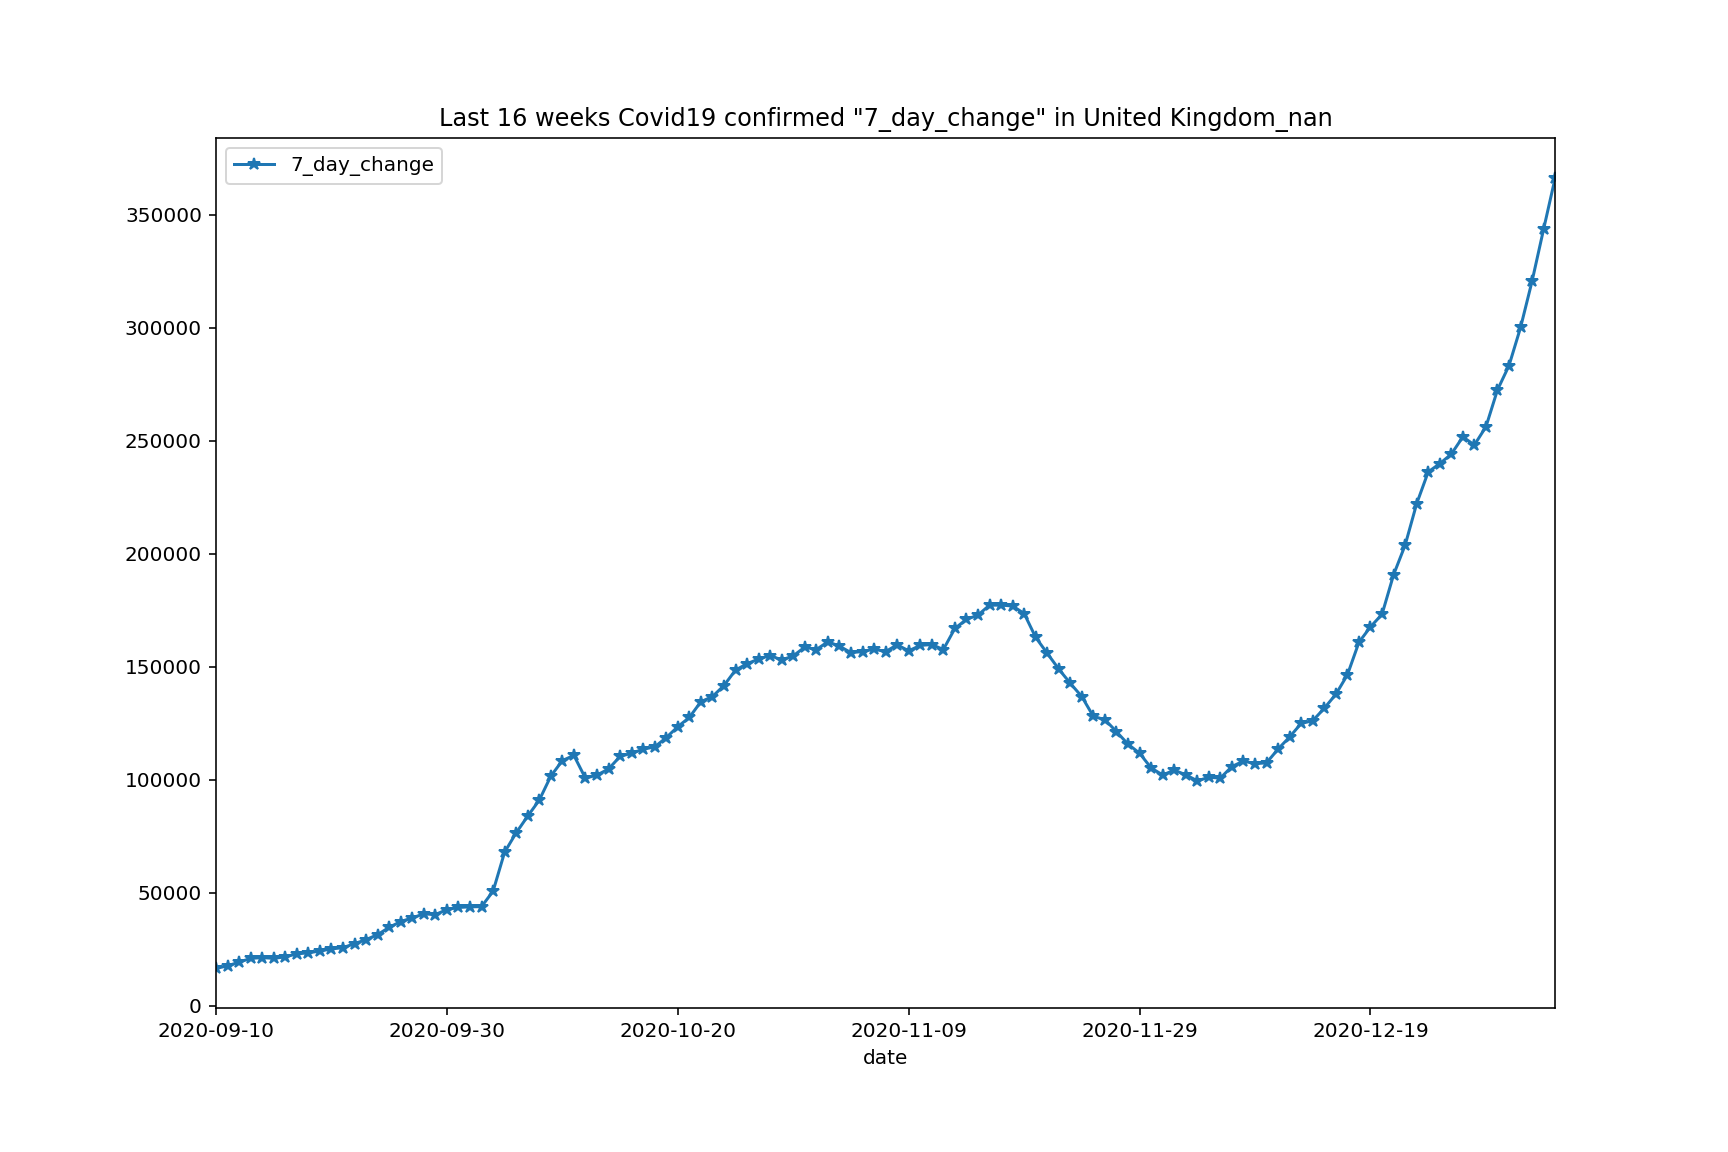

In [48]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


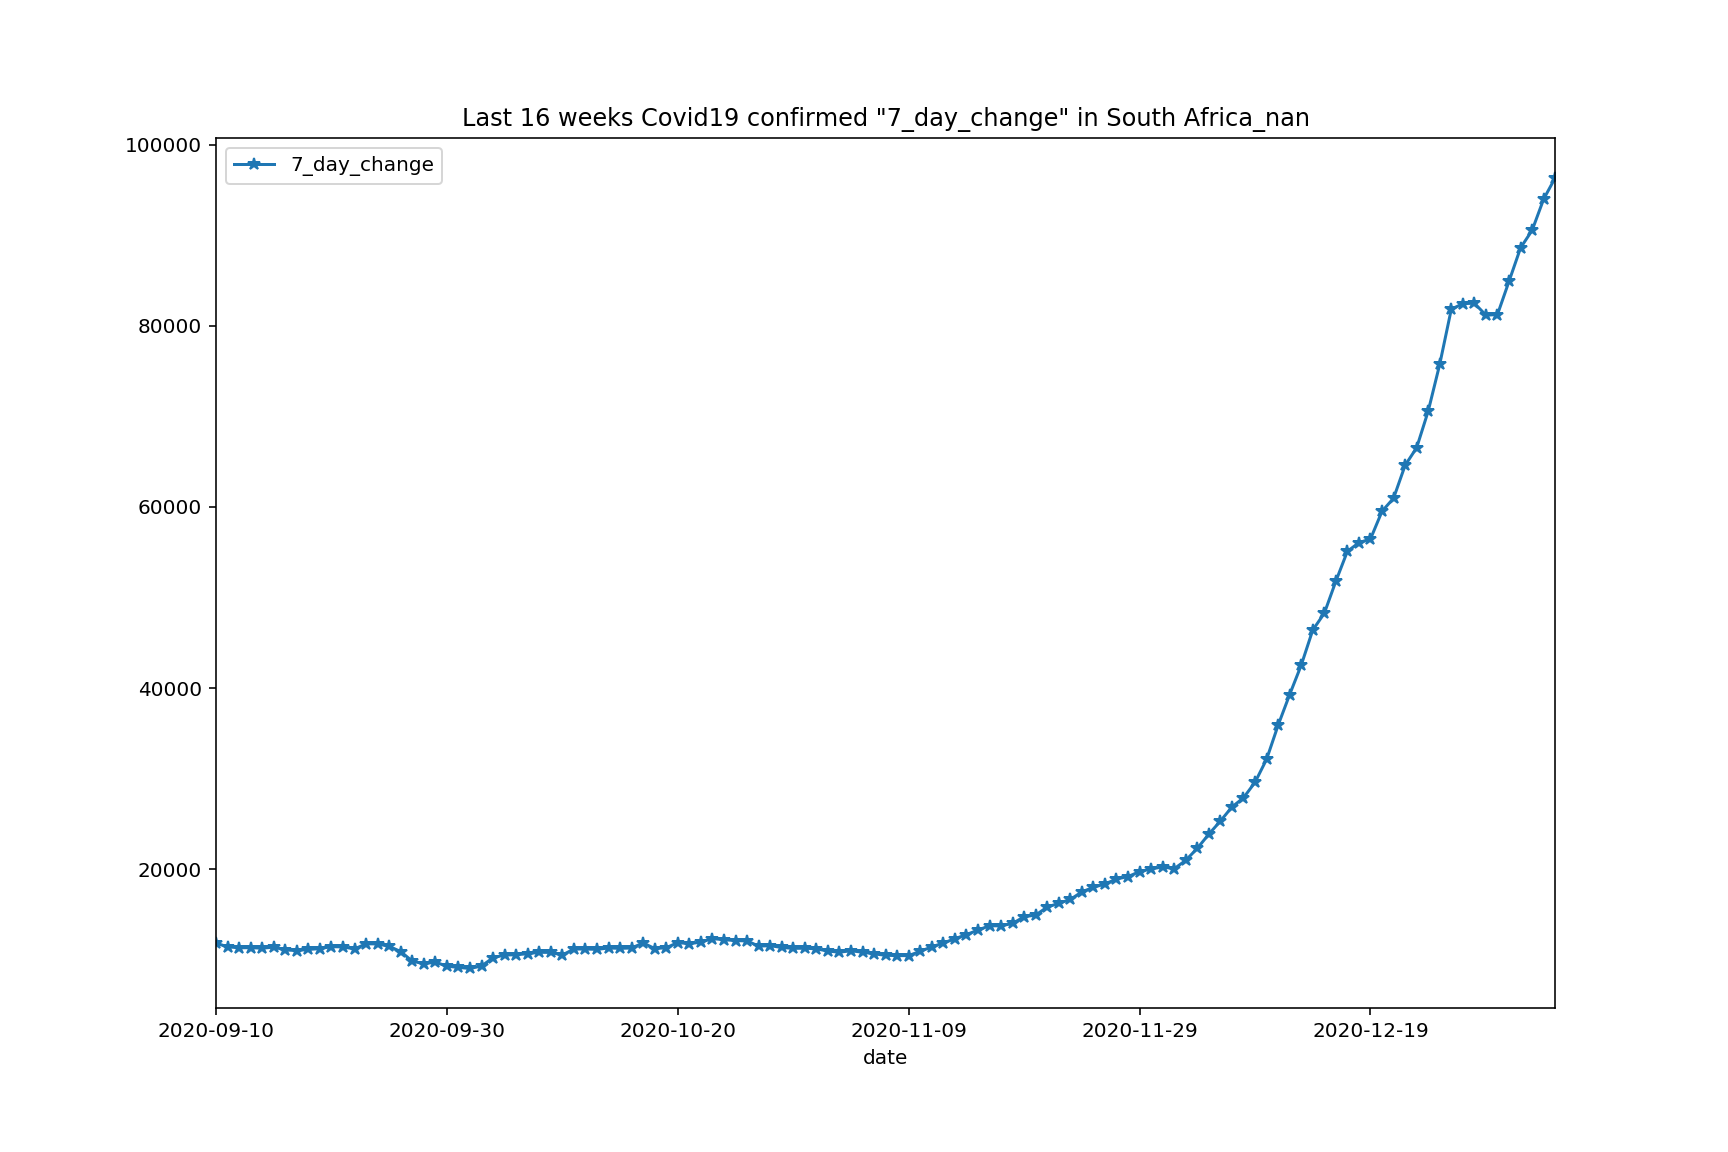

In [49]:
region='South Africa_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


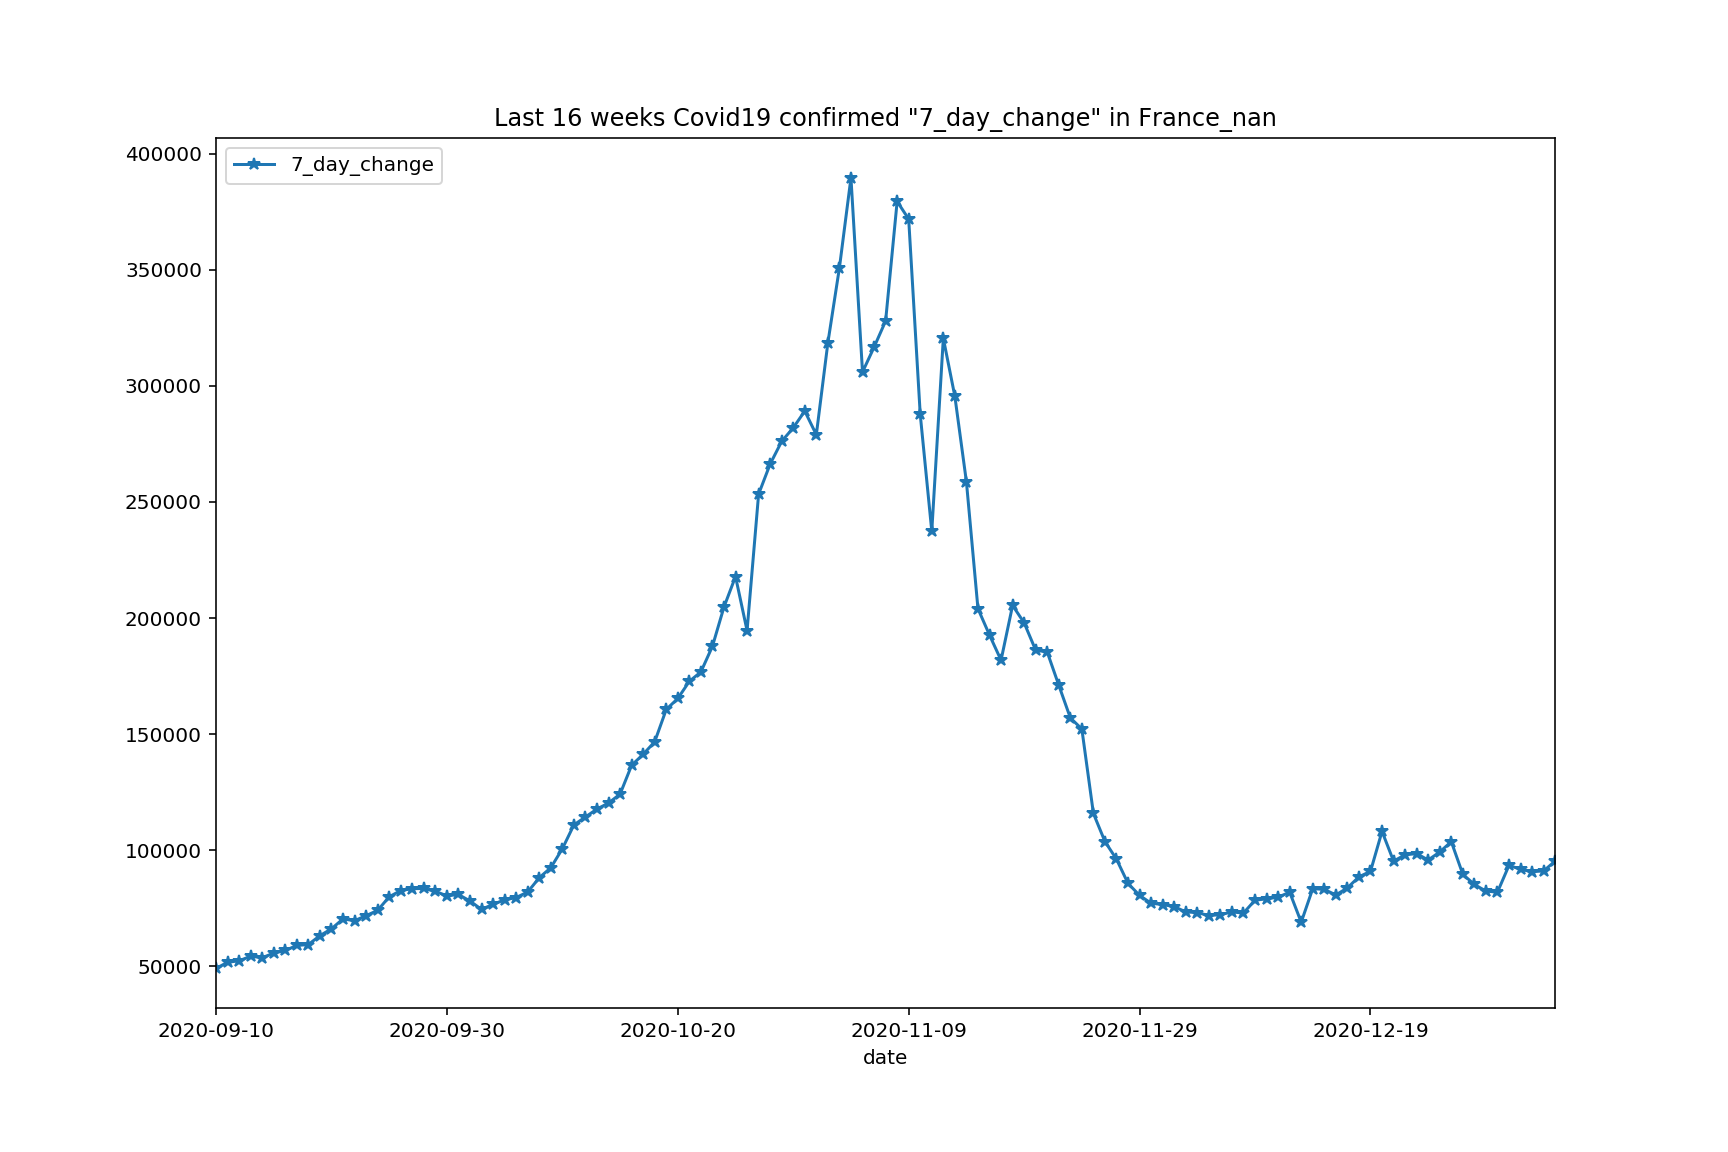

In [50]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


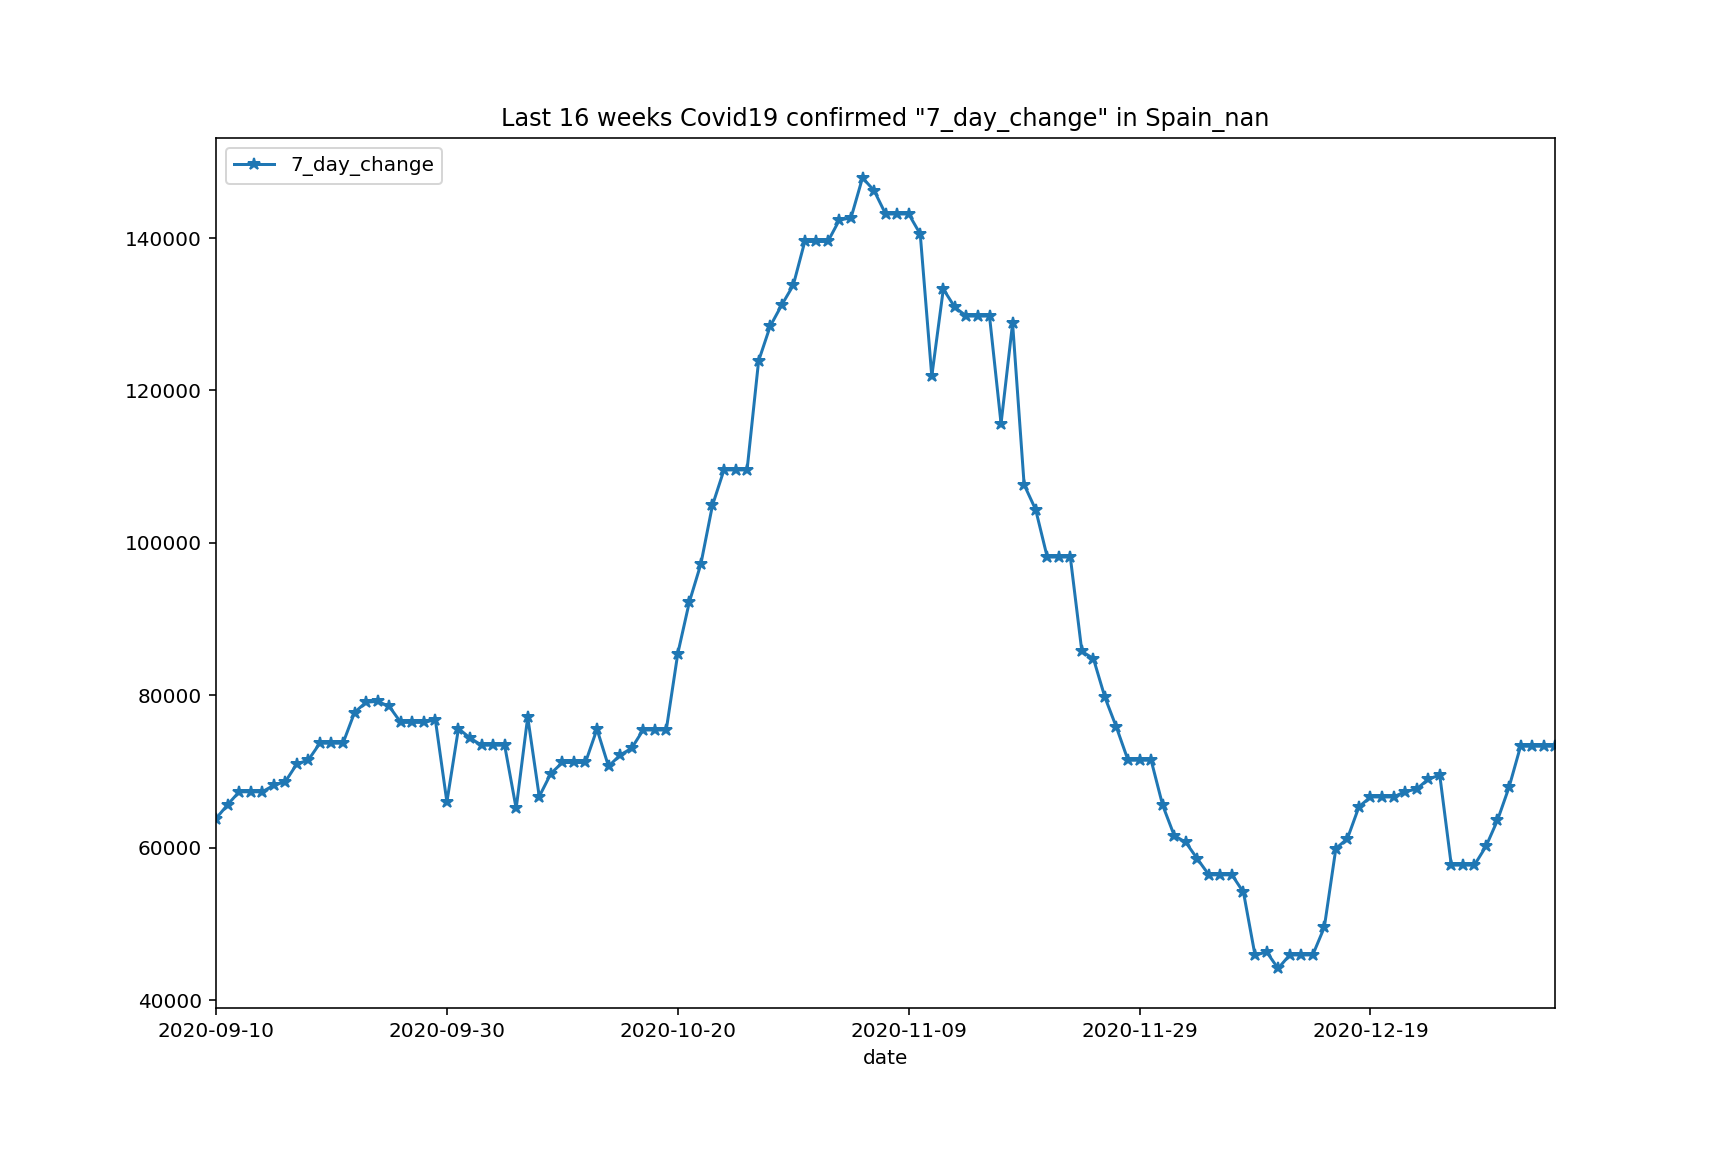

In [51]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


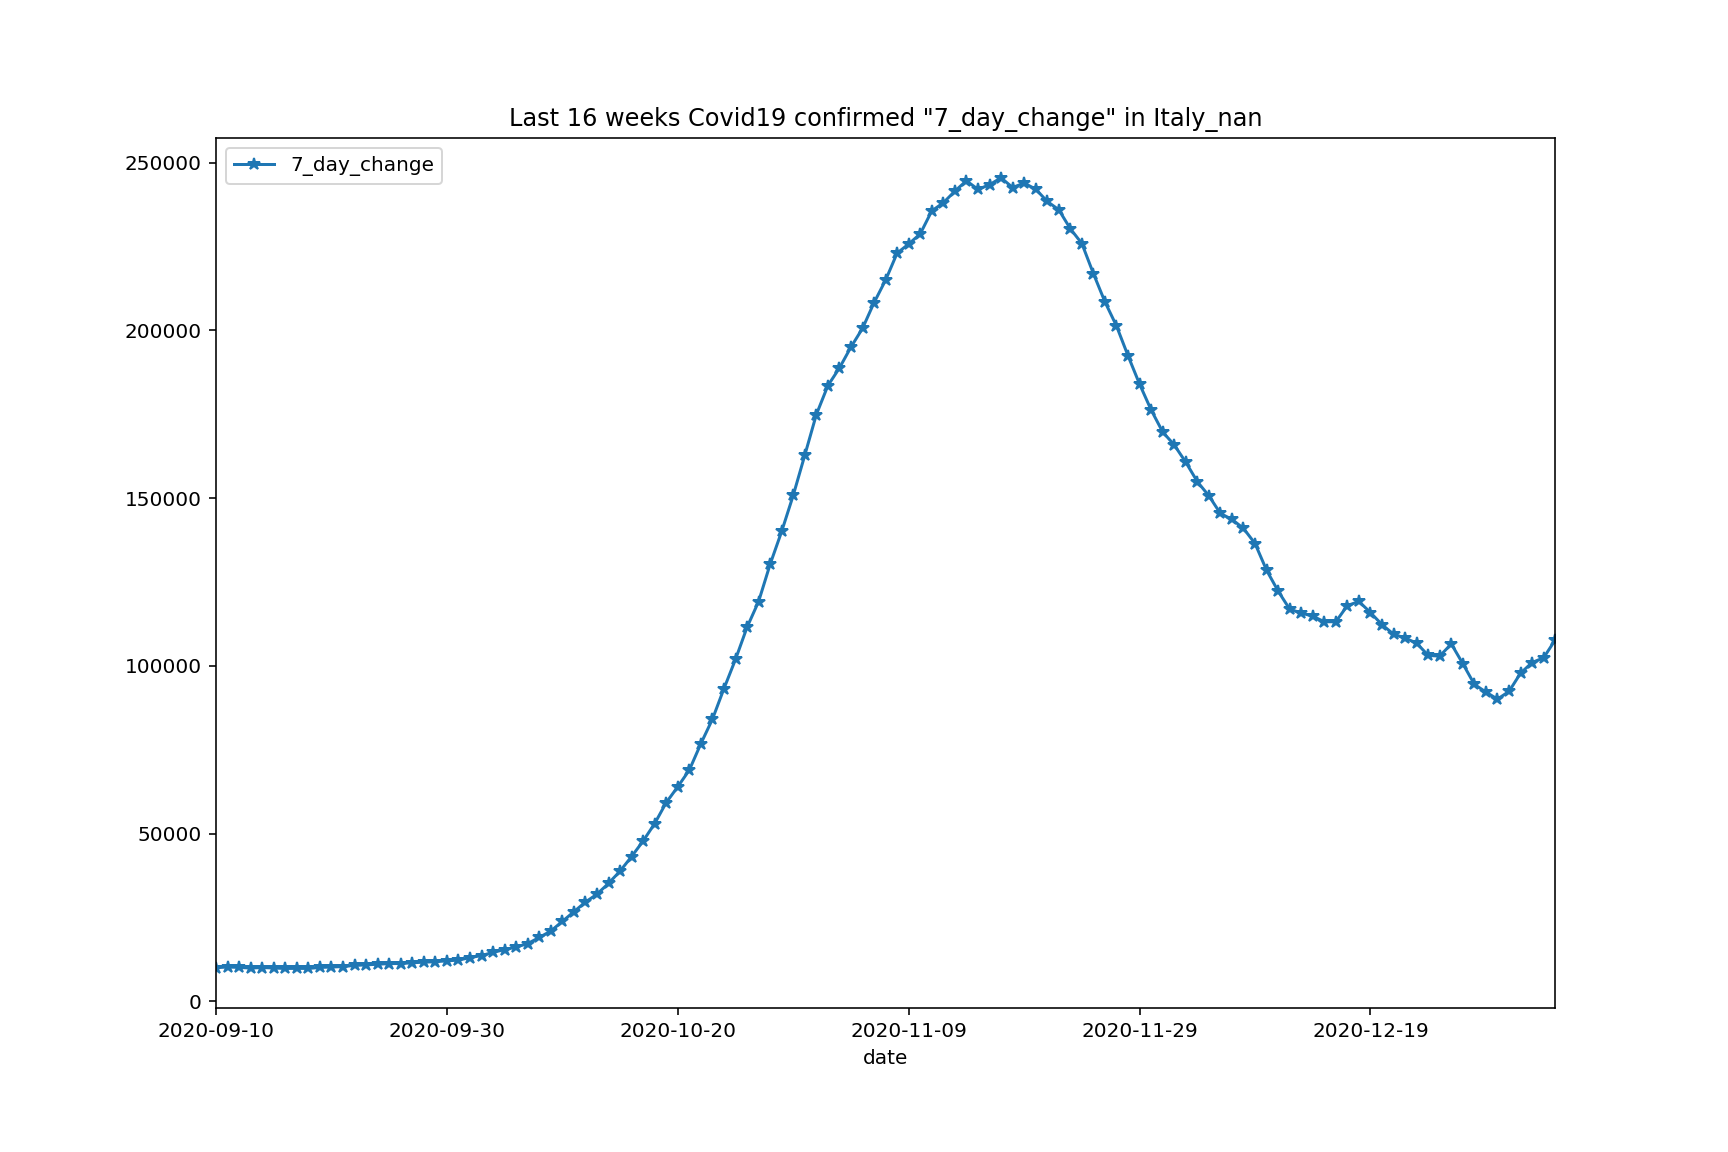

In [52]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


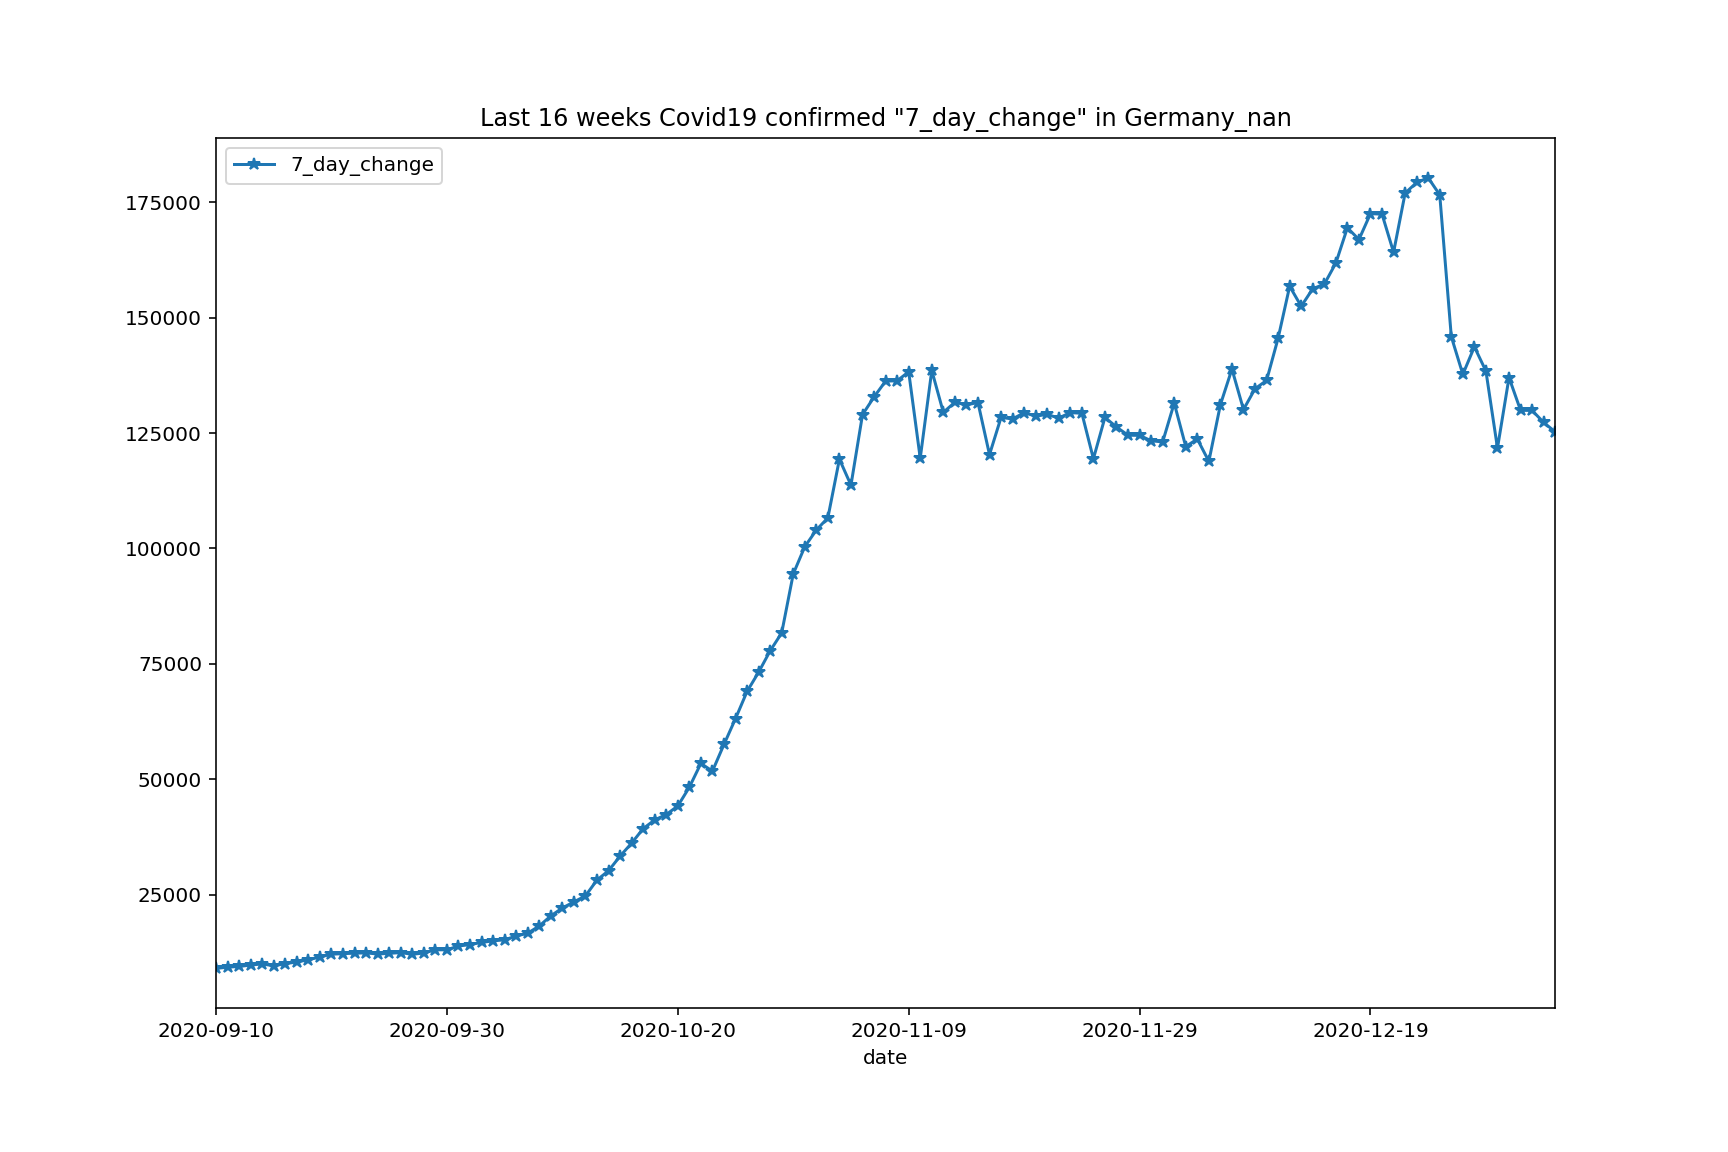

In [53]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


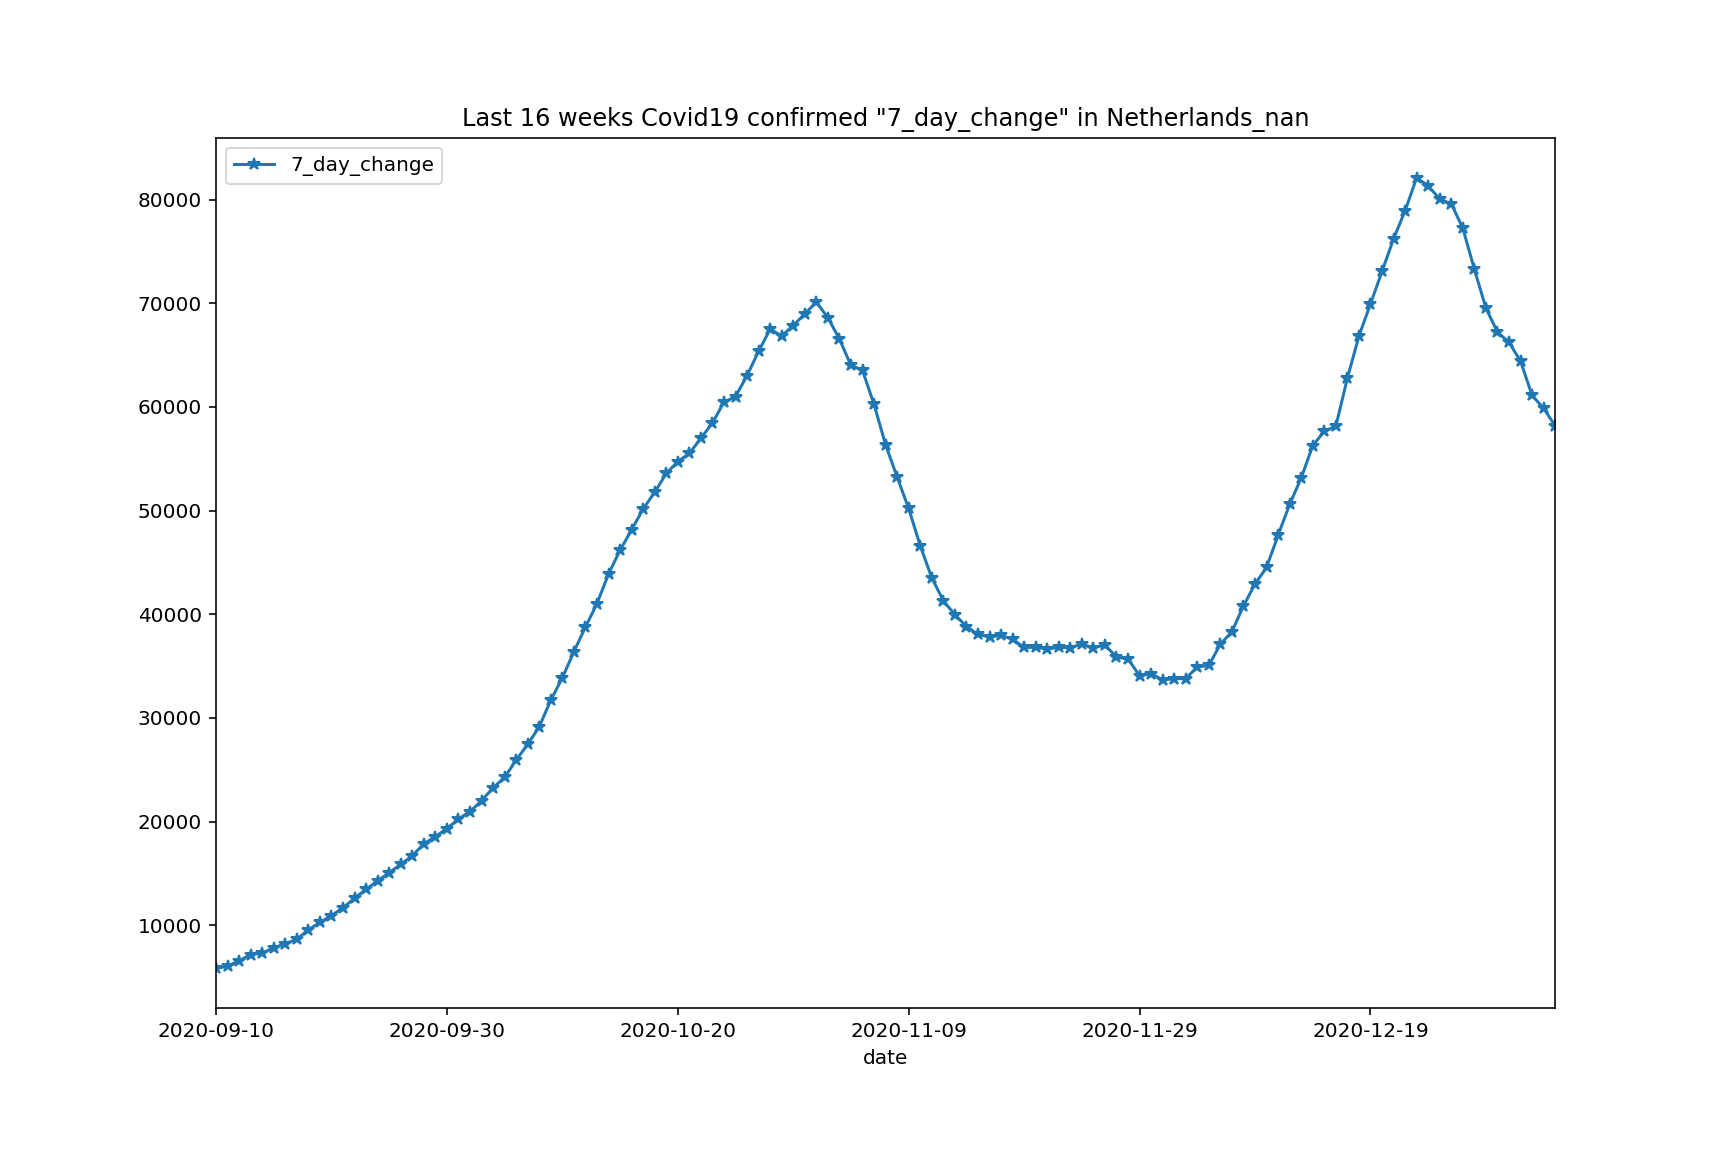

In [54]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


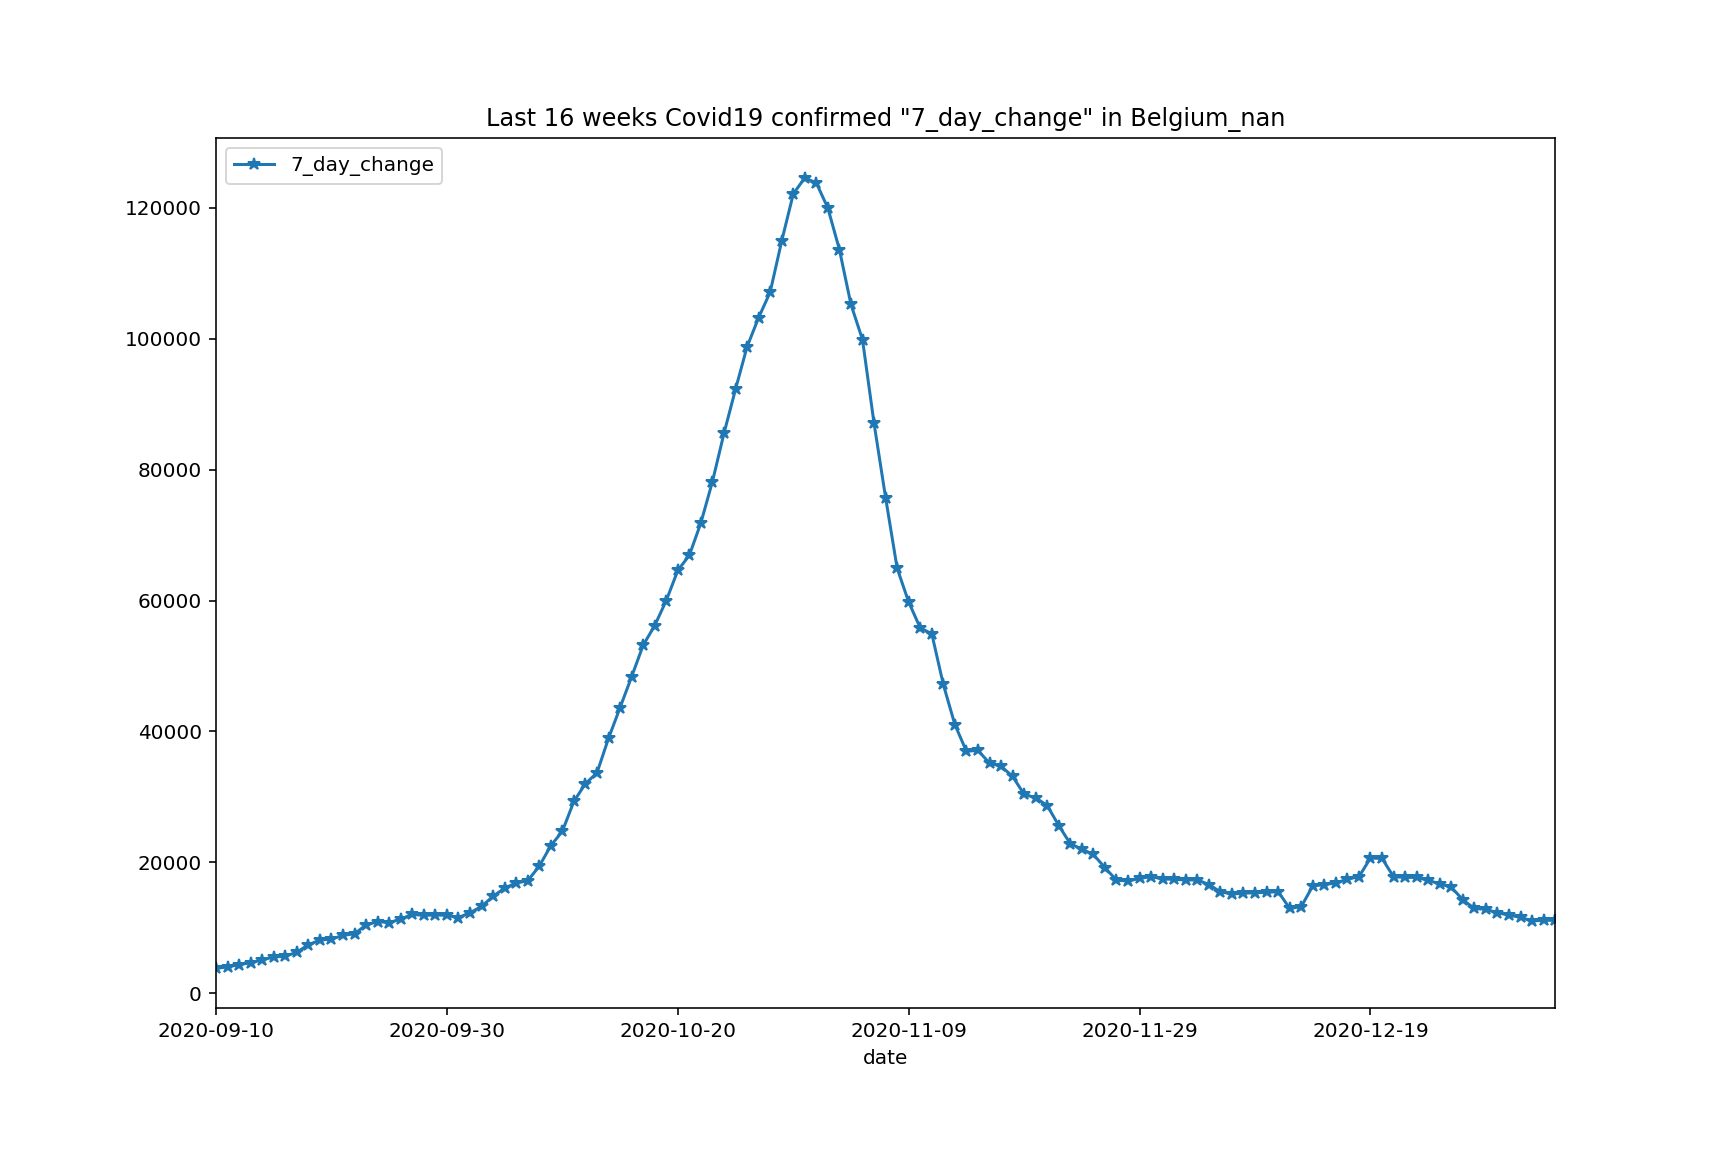

In [55]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


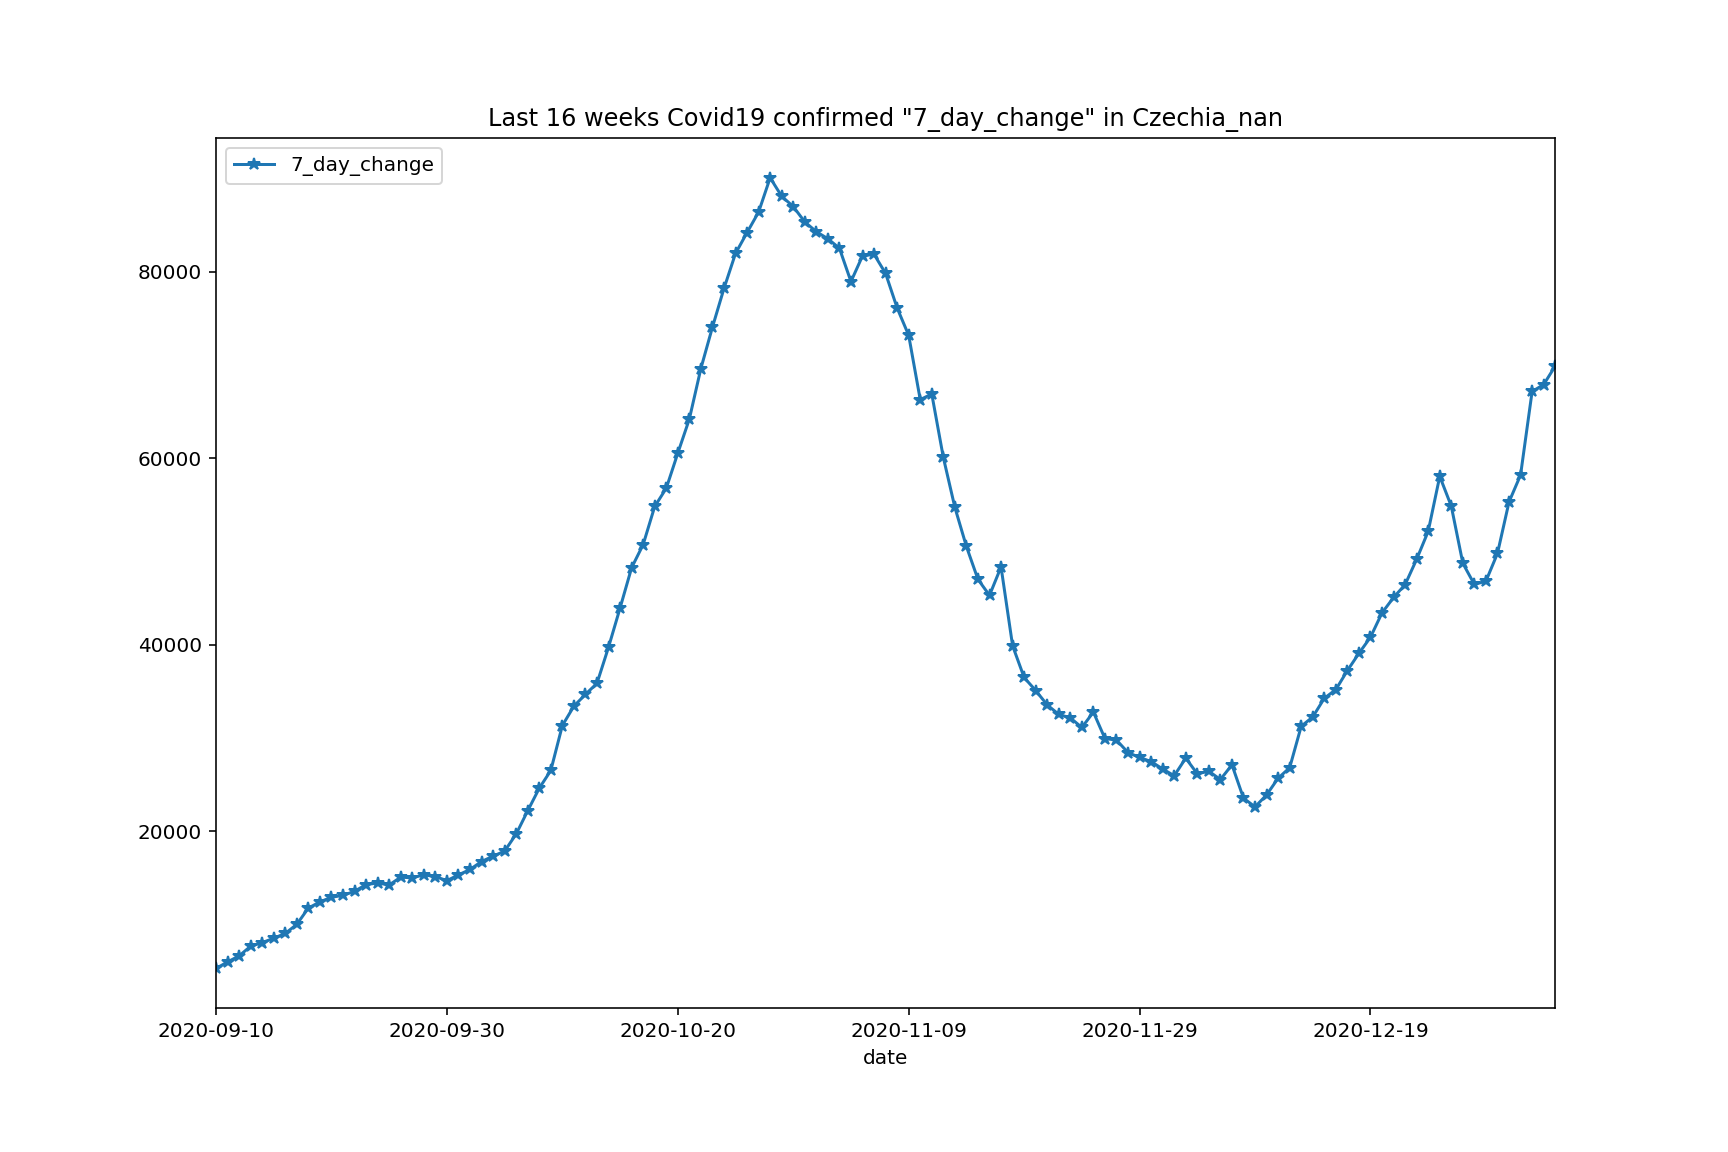

In [56]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


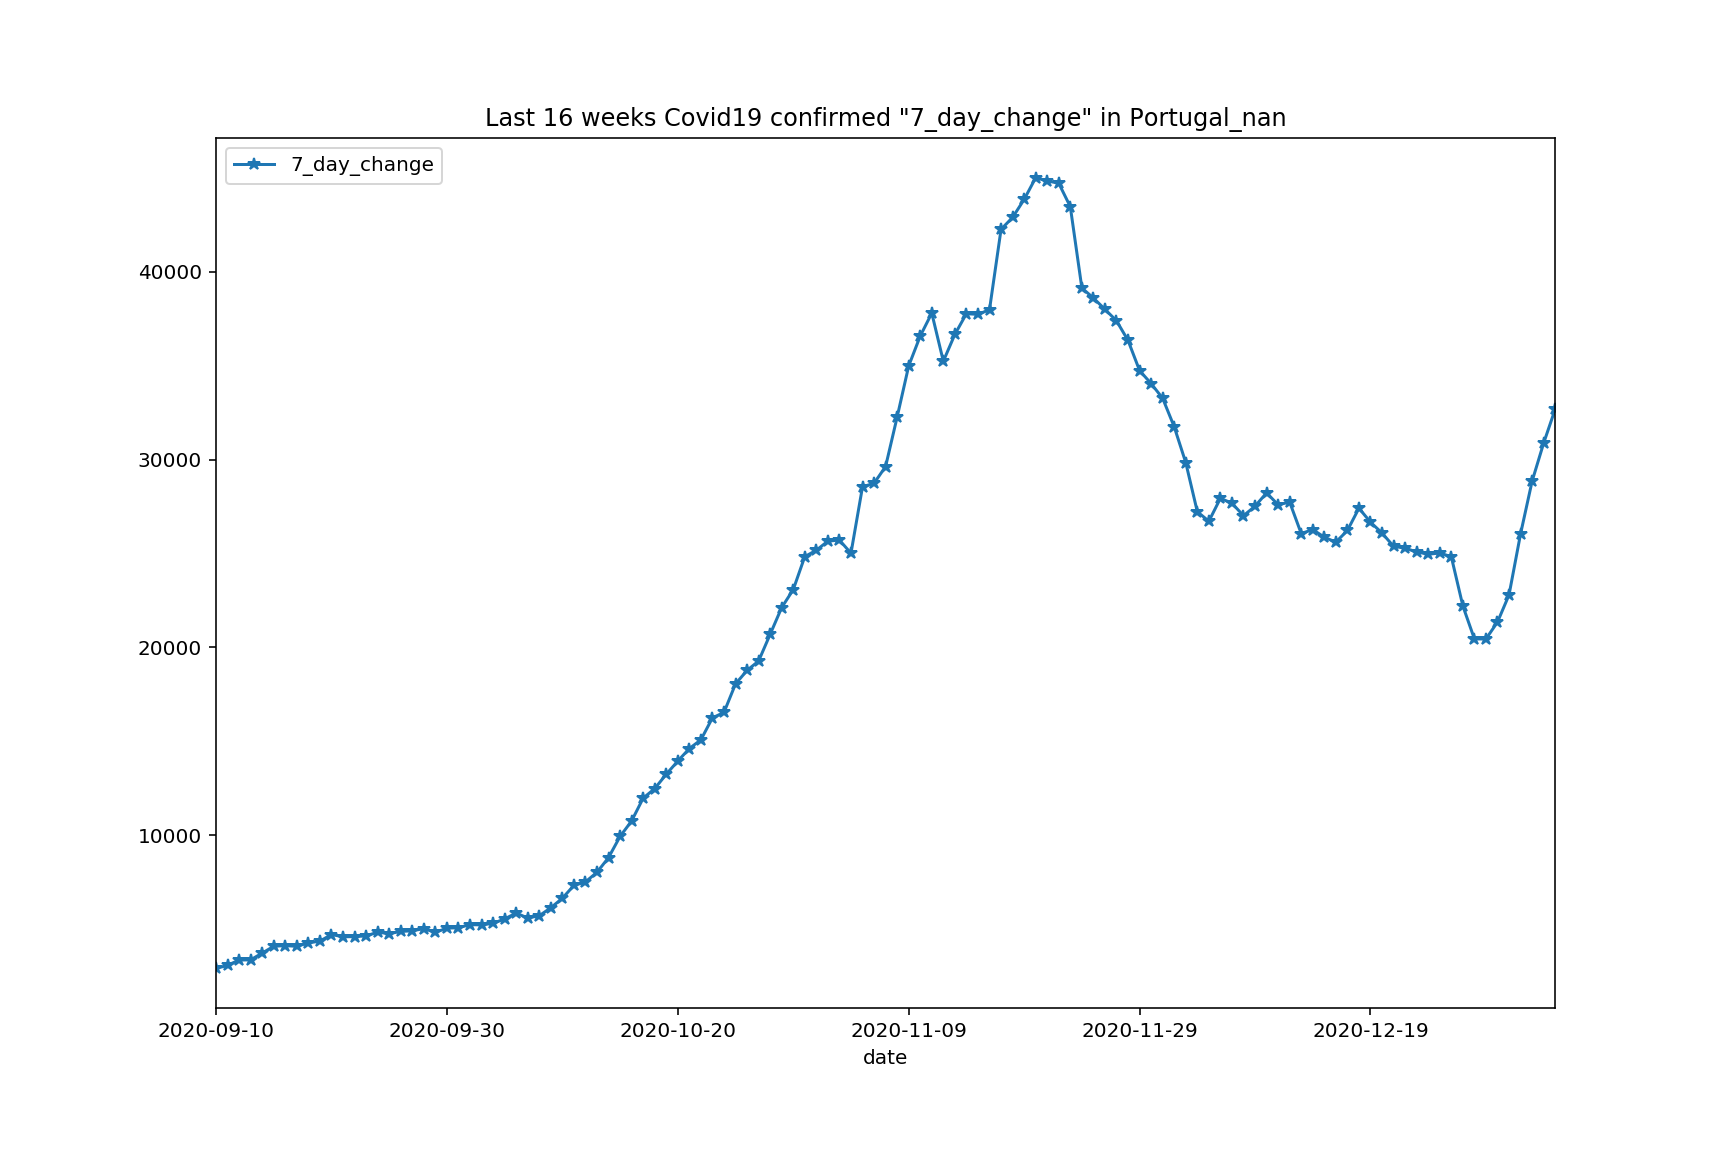

In [57]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [58]:
#%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


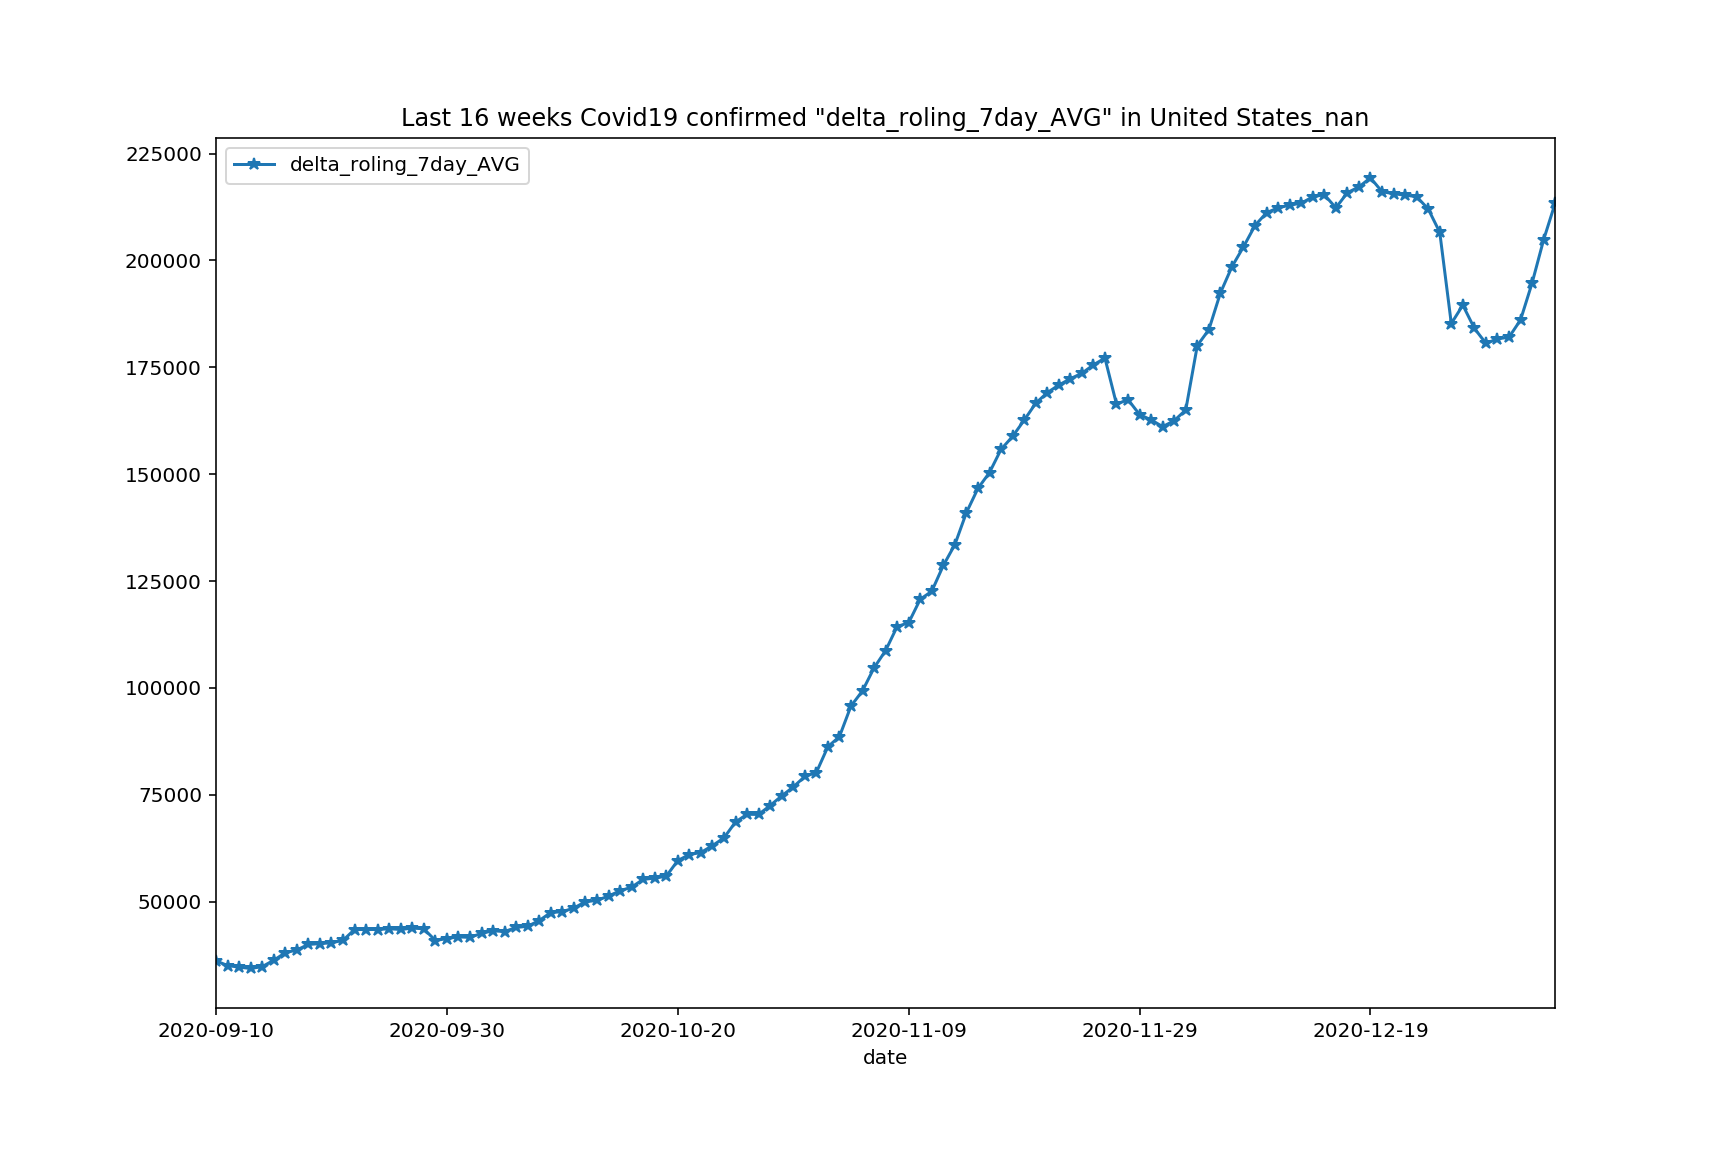

In [59]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


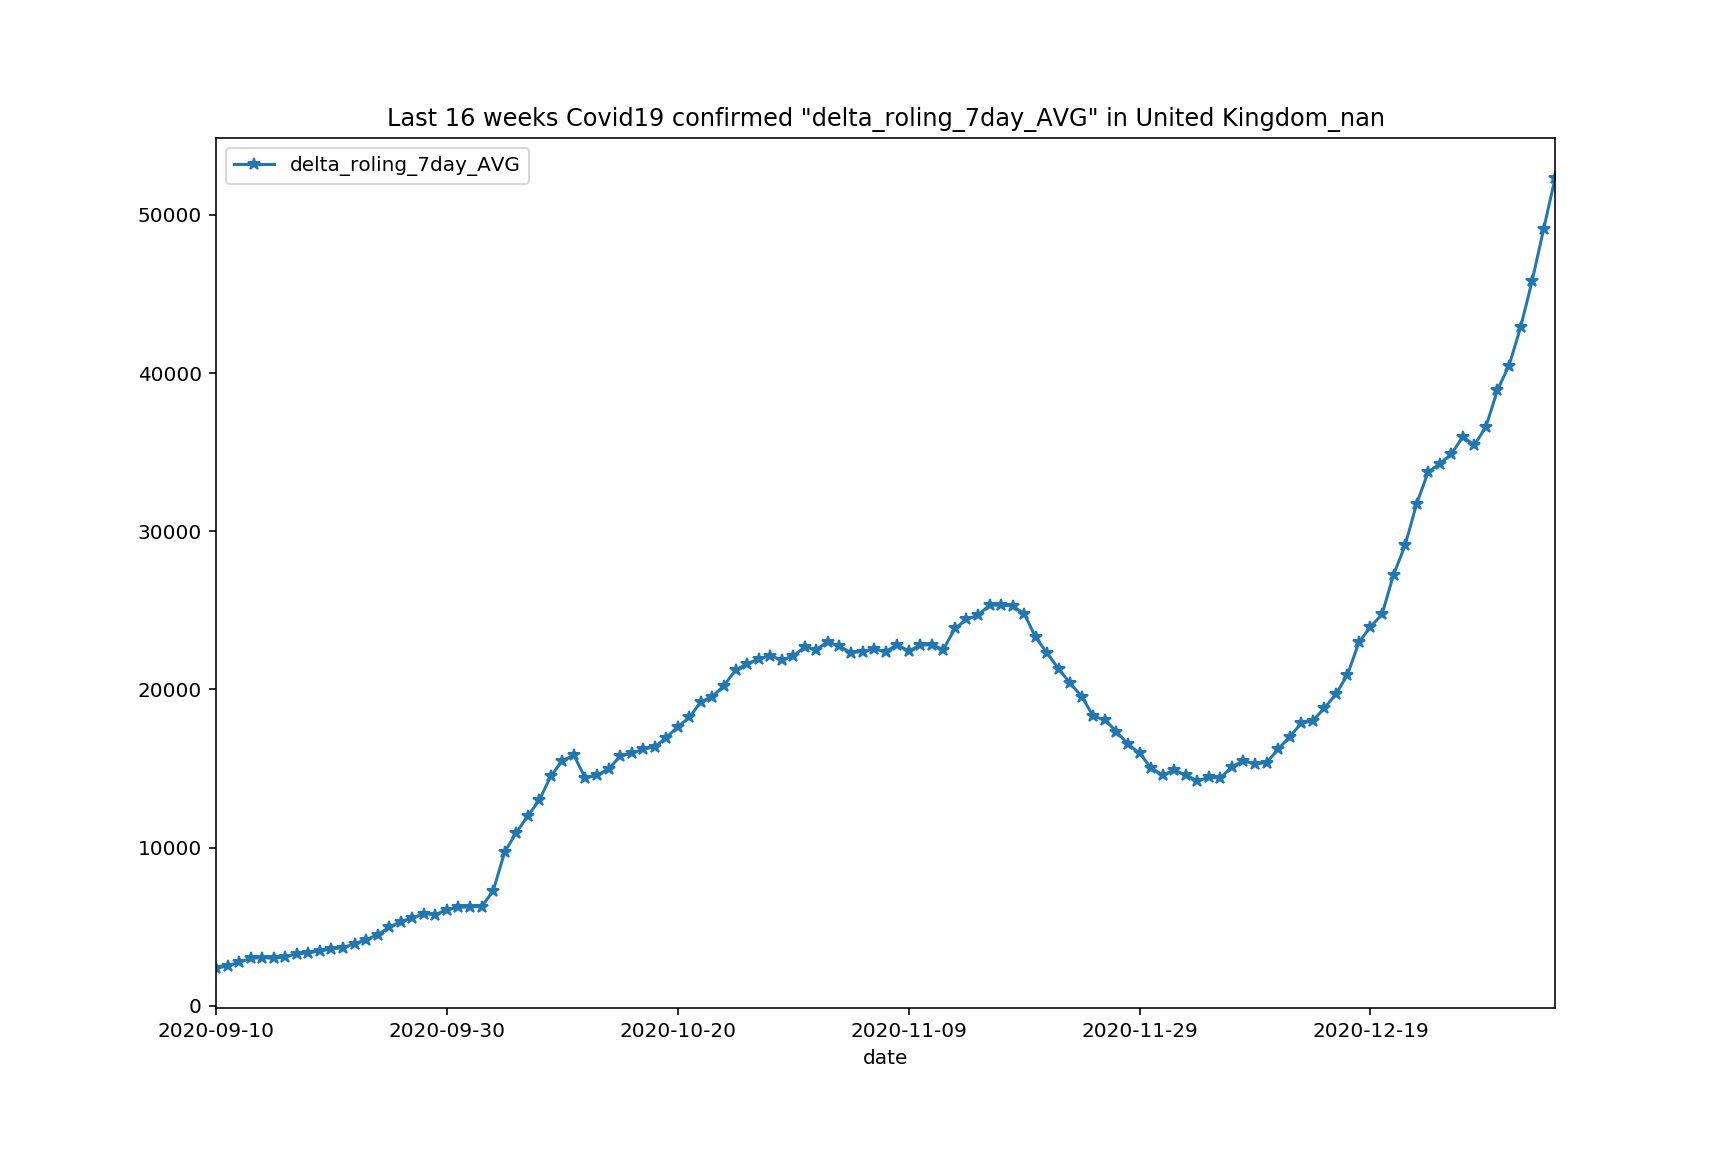

In [61]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


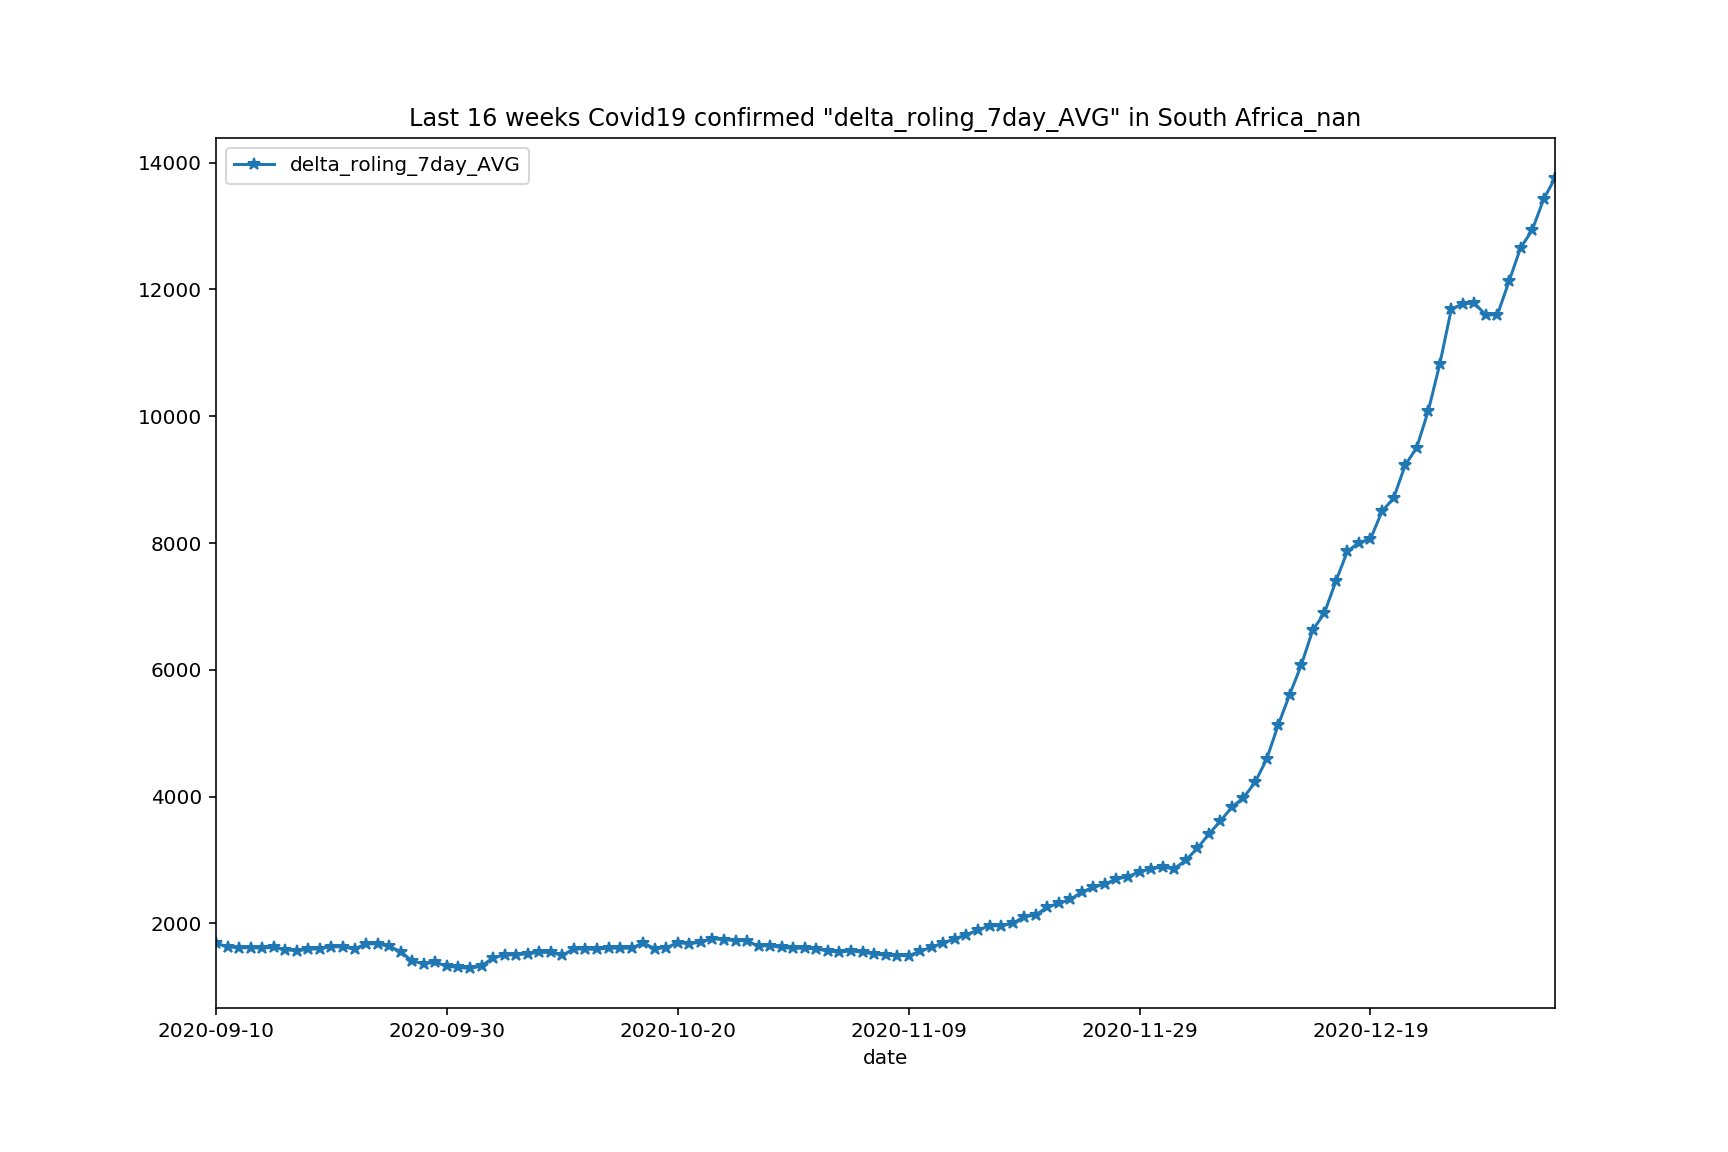

In [62]:
region='South Africa_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


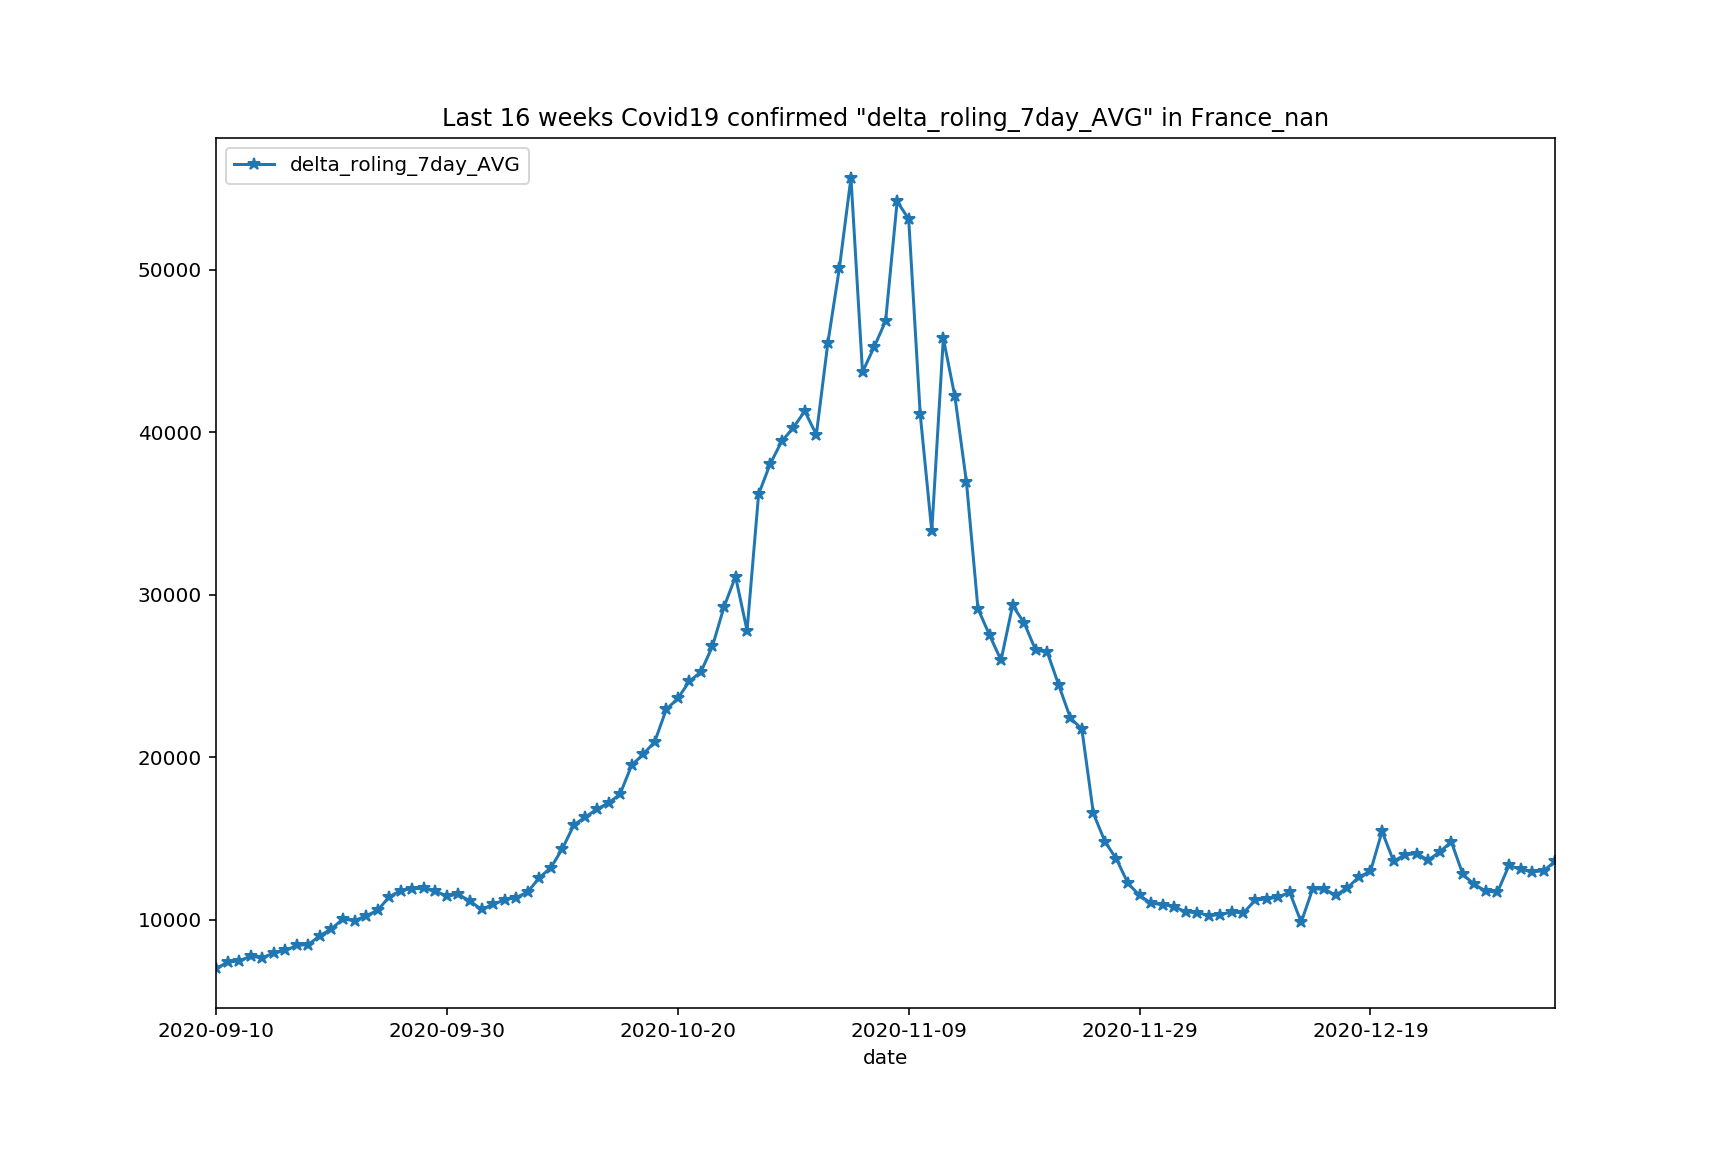

In [63]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


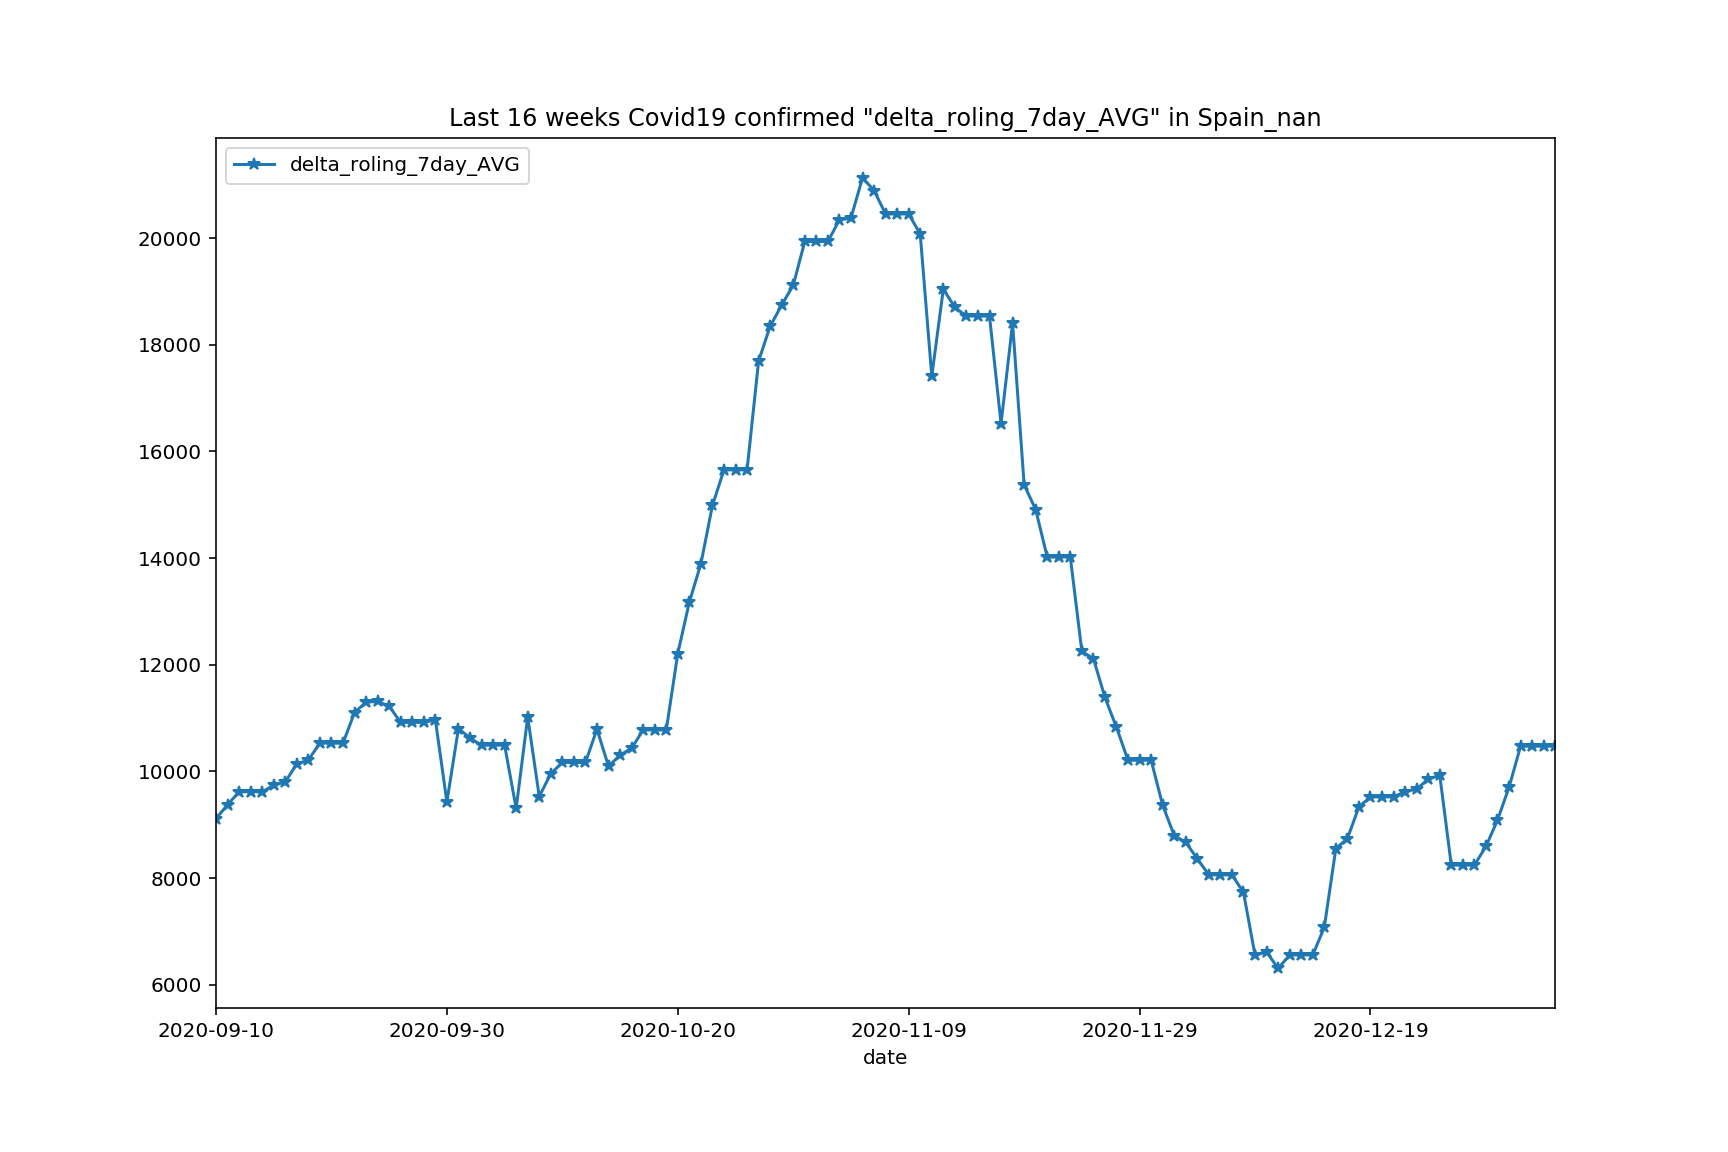

In [64]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


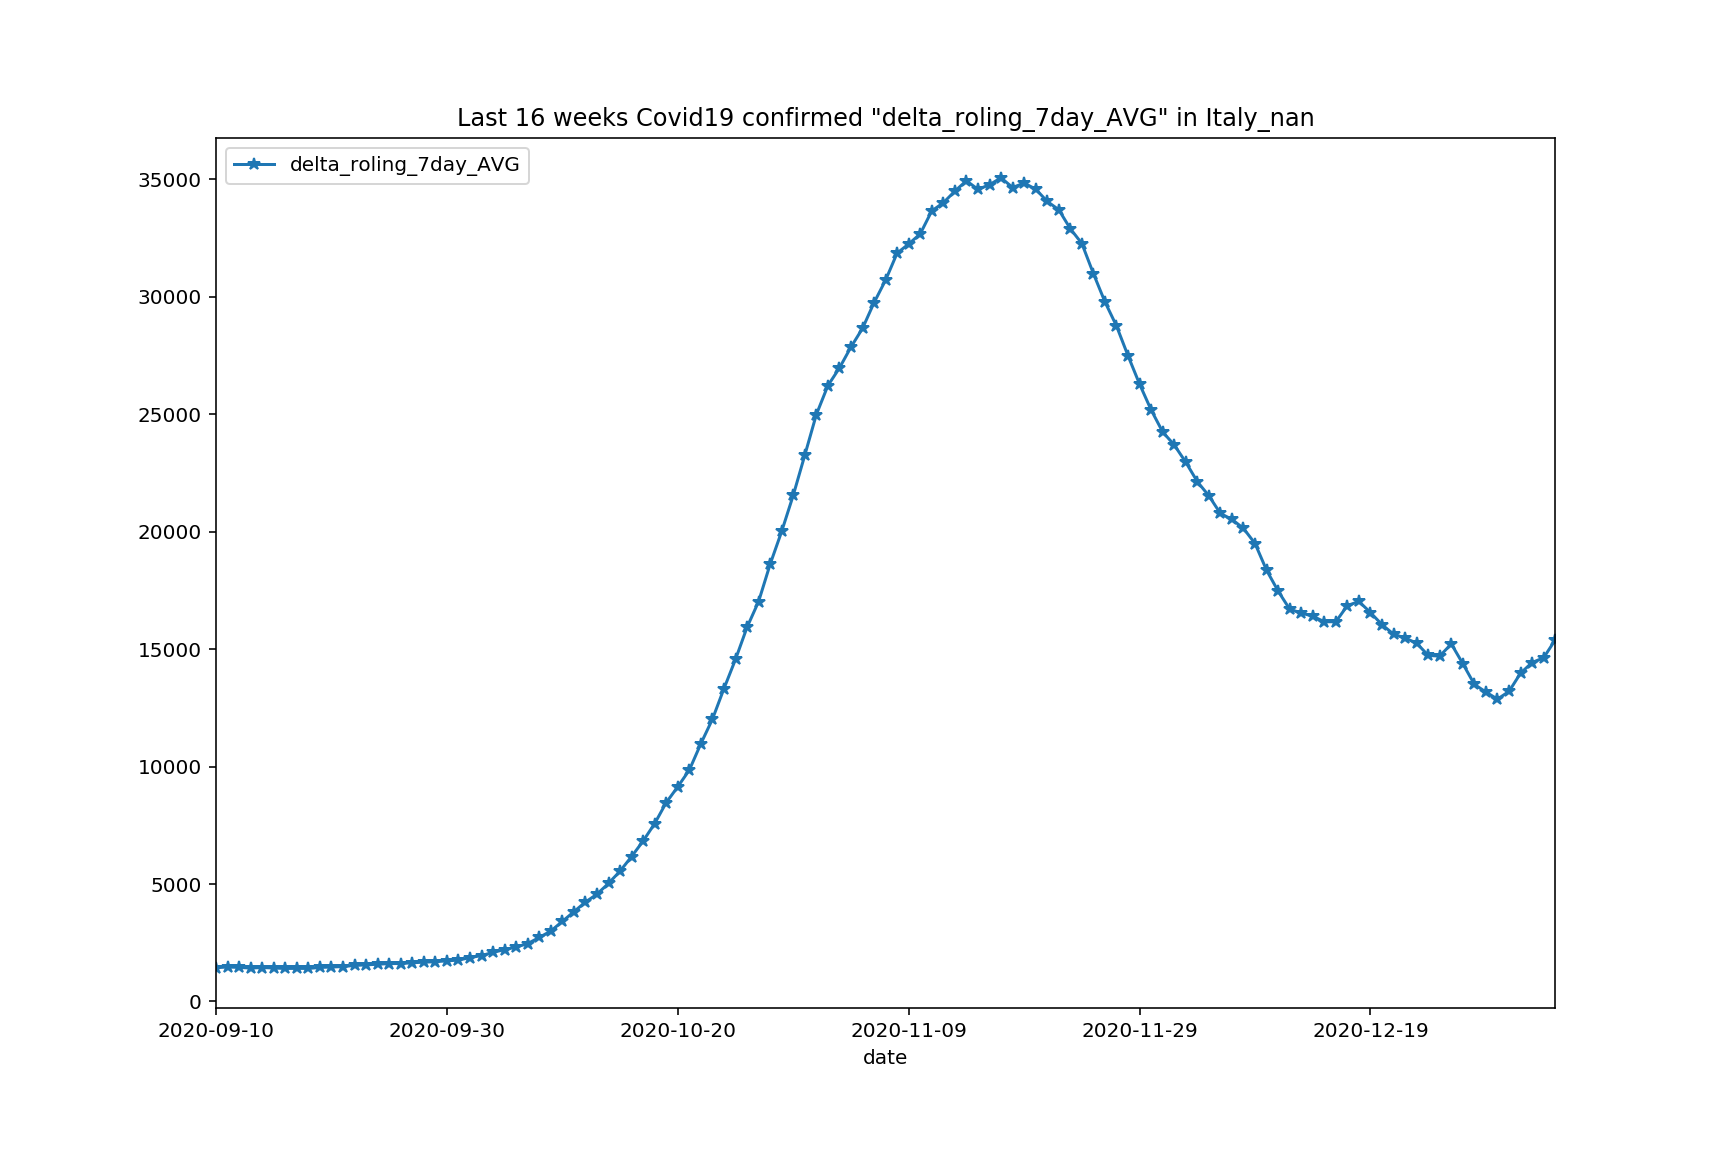

In [65]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


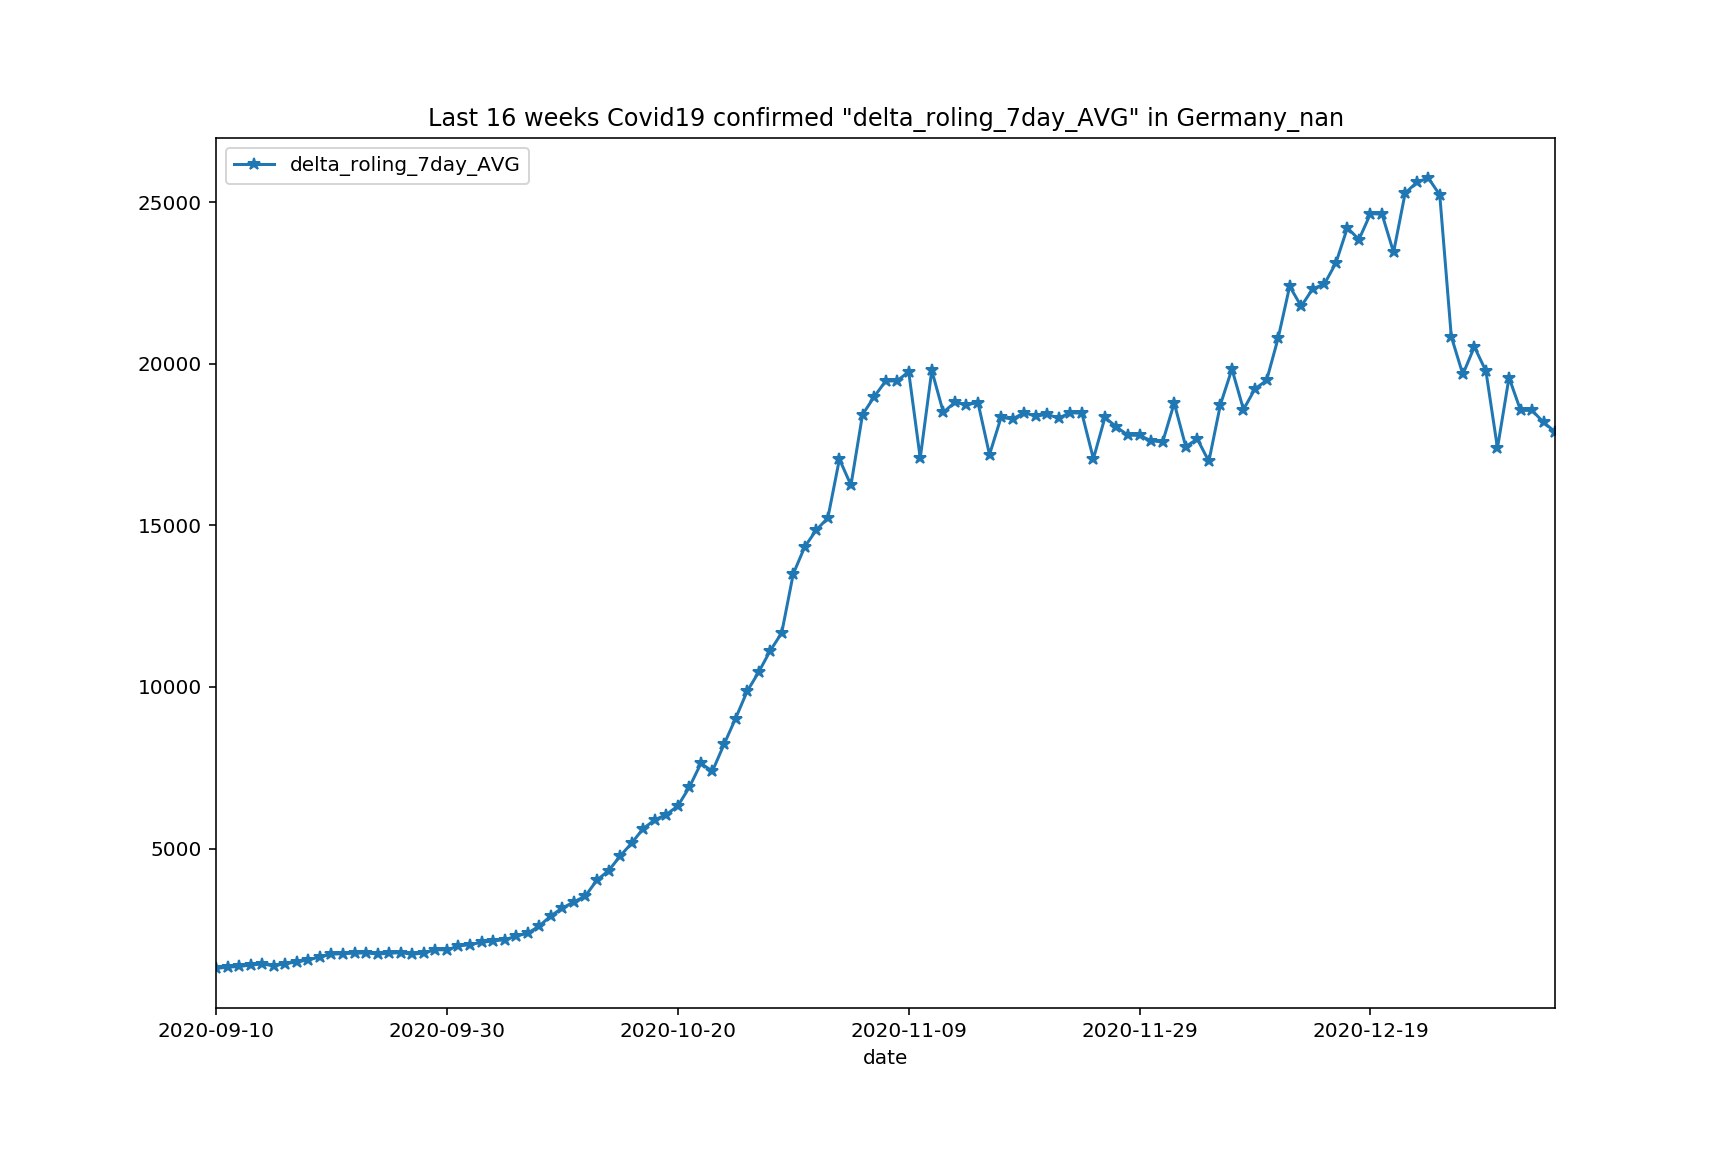

In [66]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


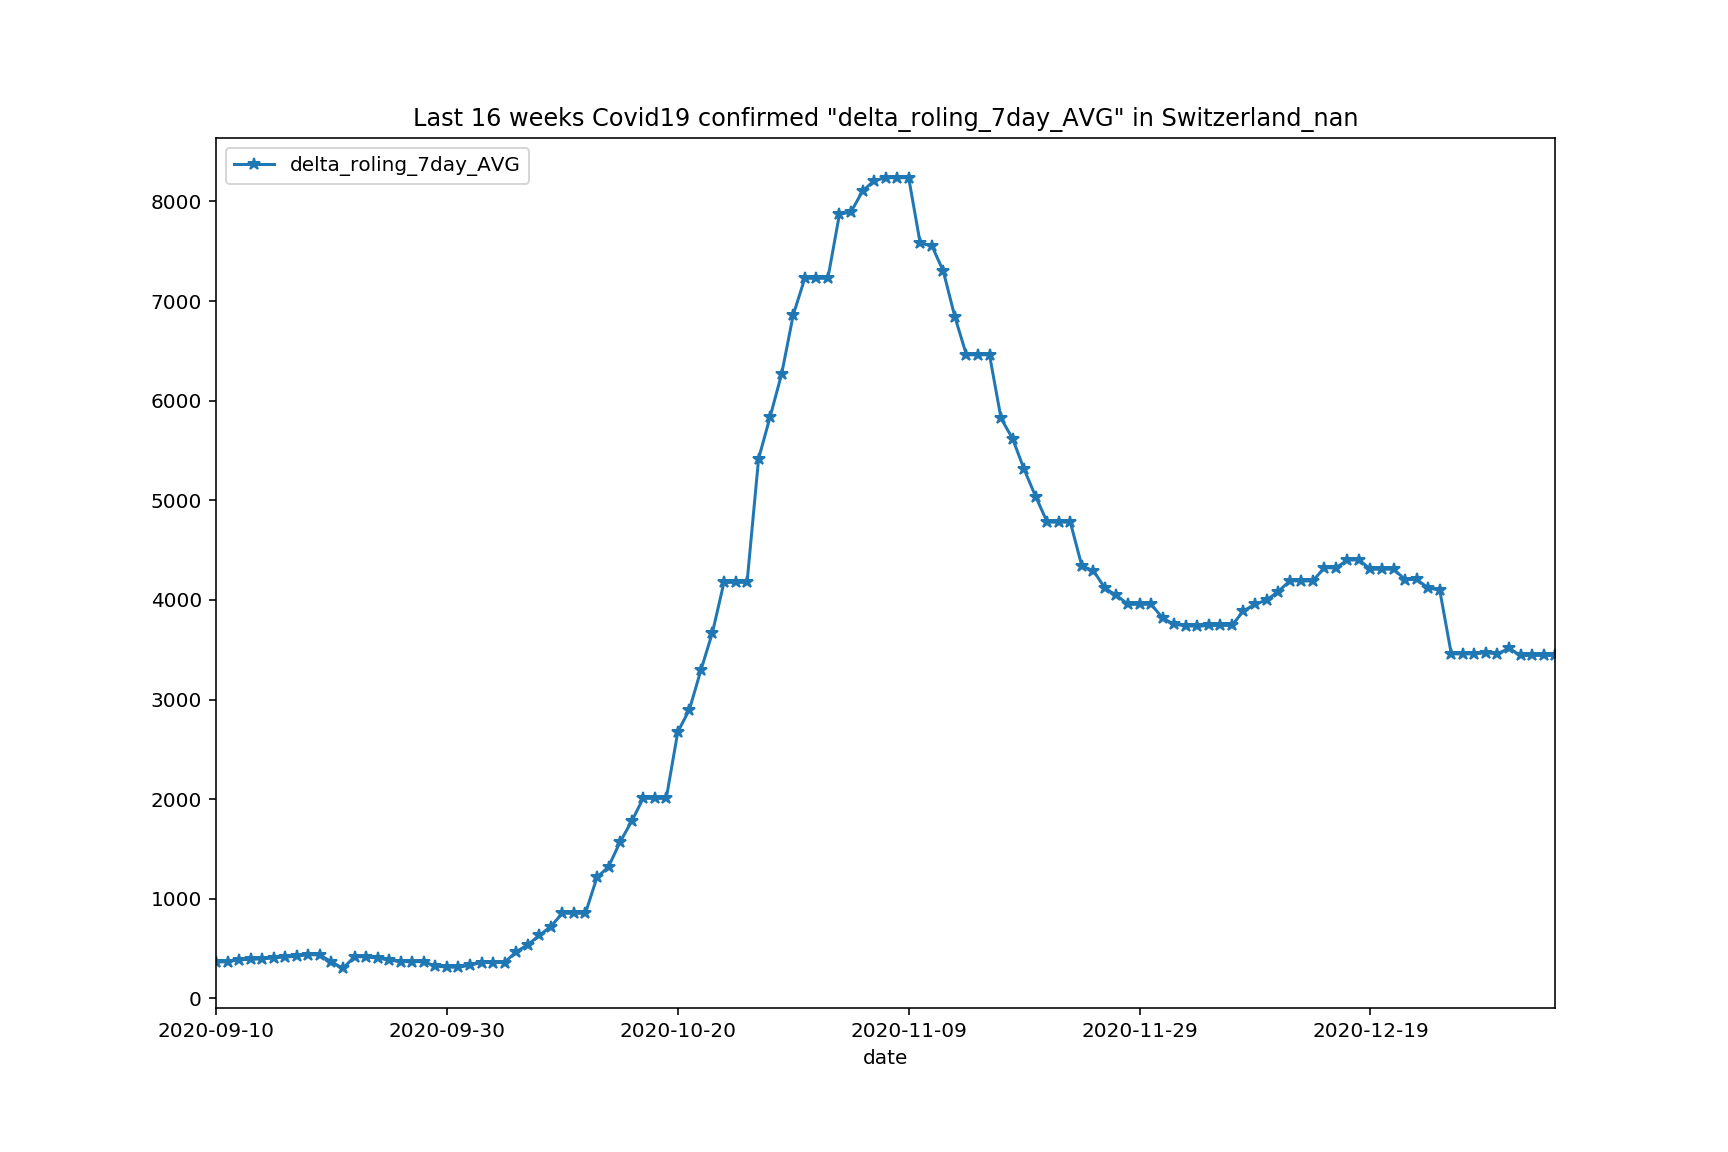

In [67]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


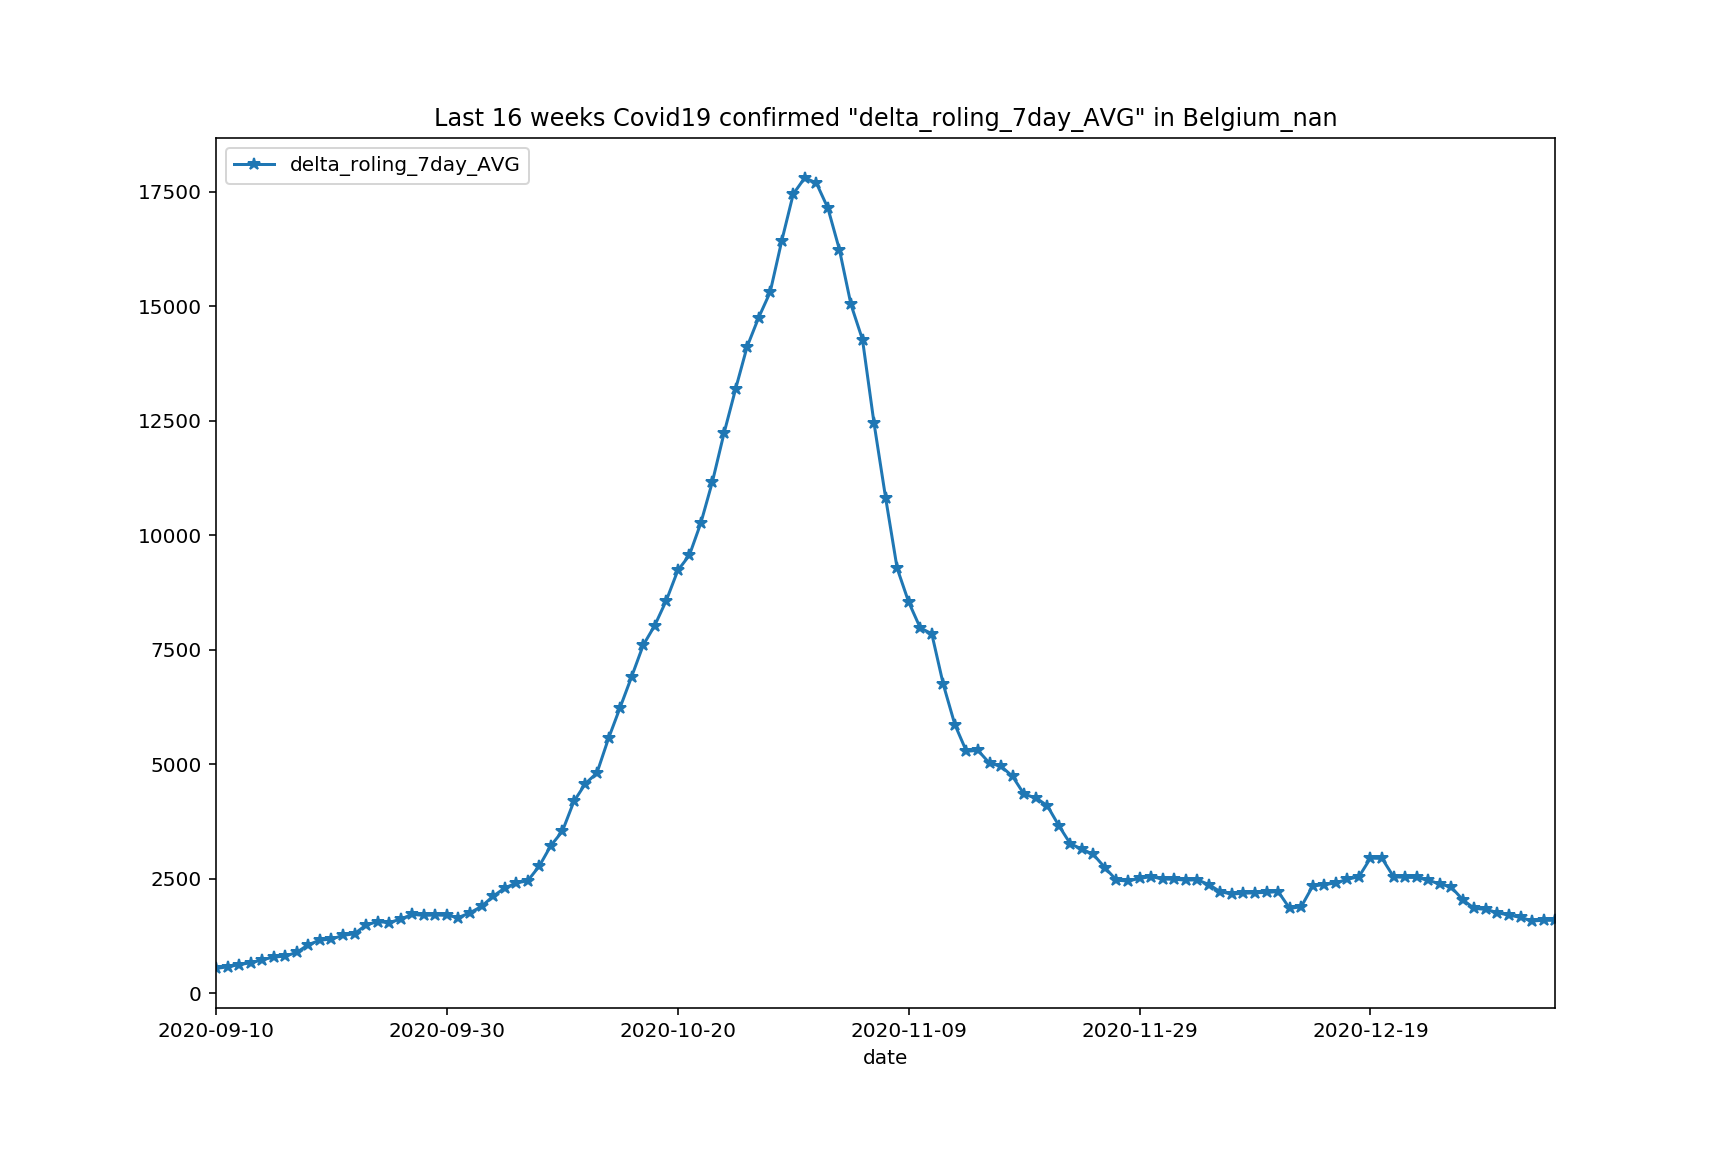

In [68]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


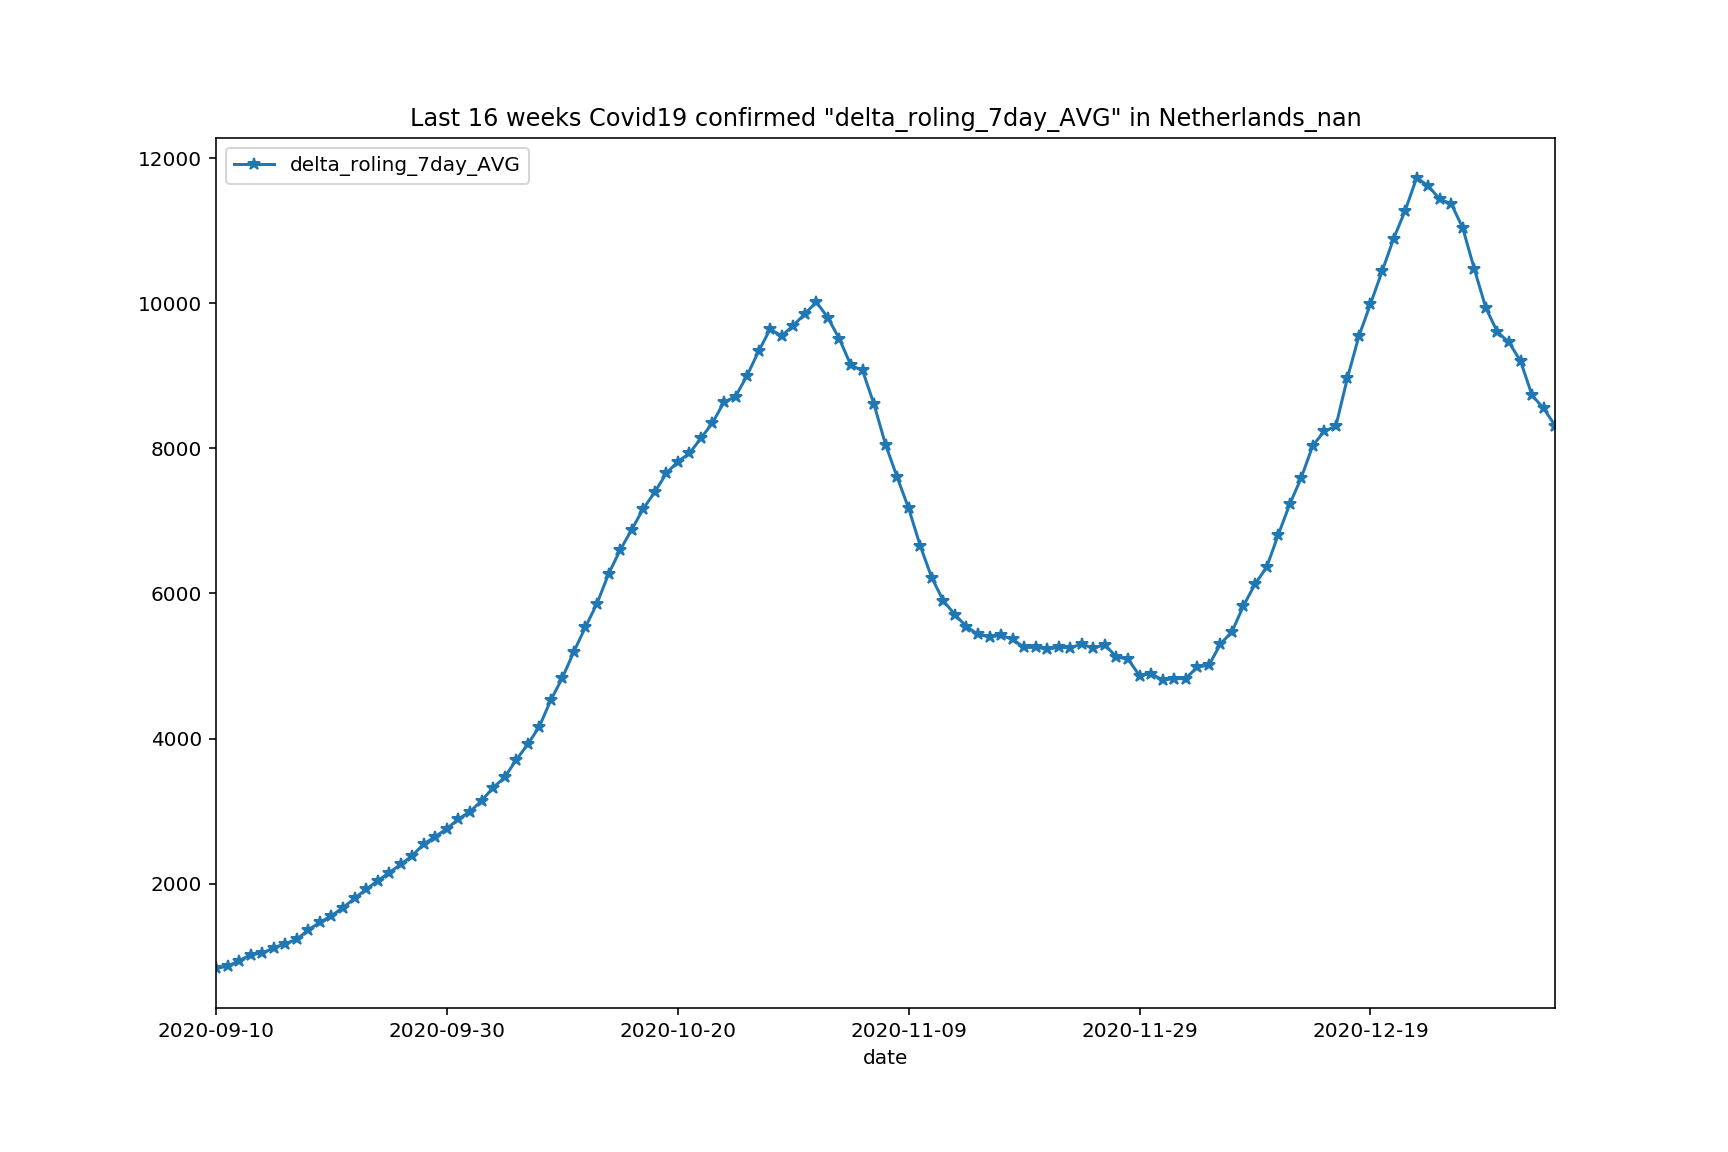

In [69]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


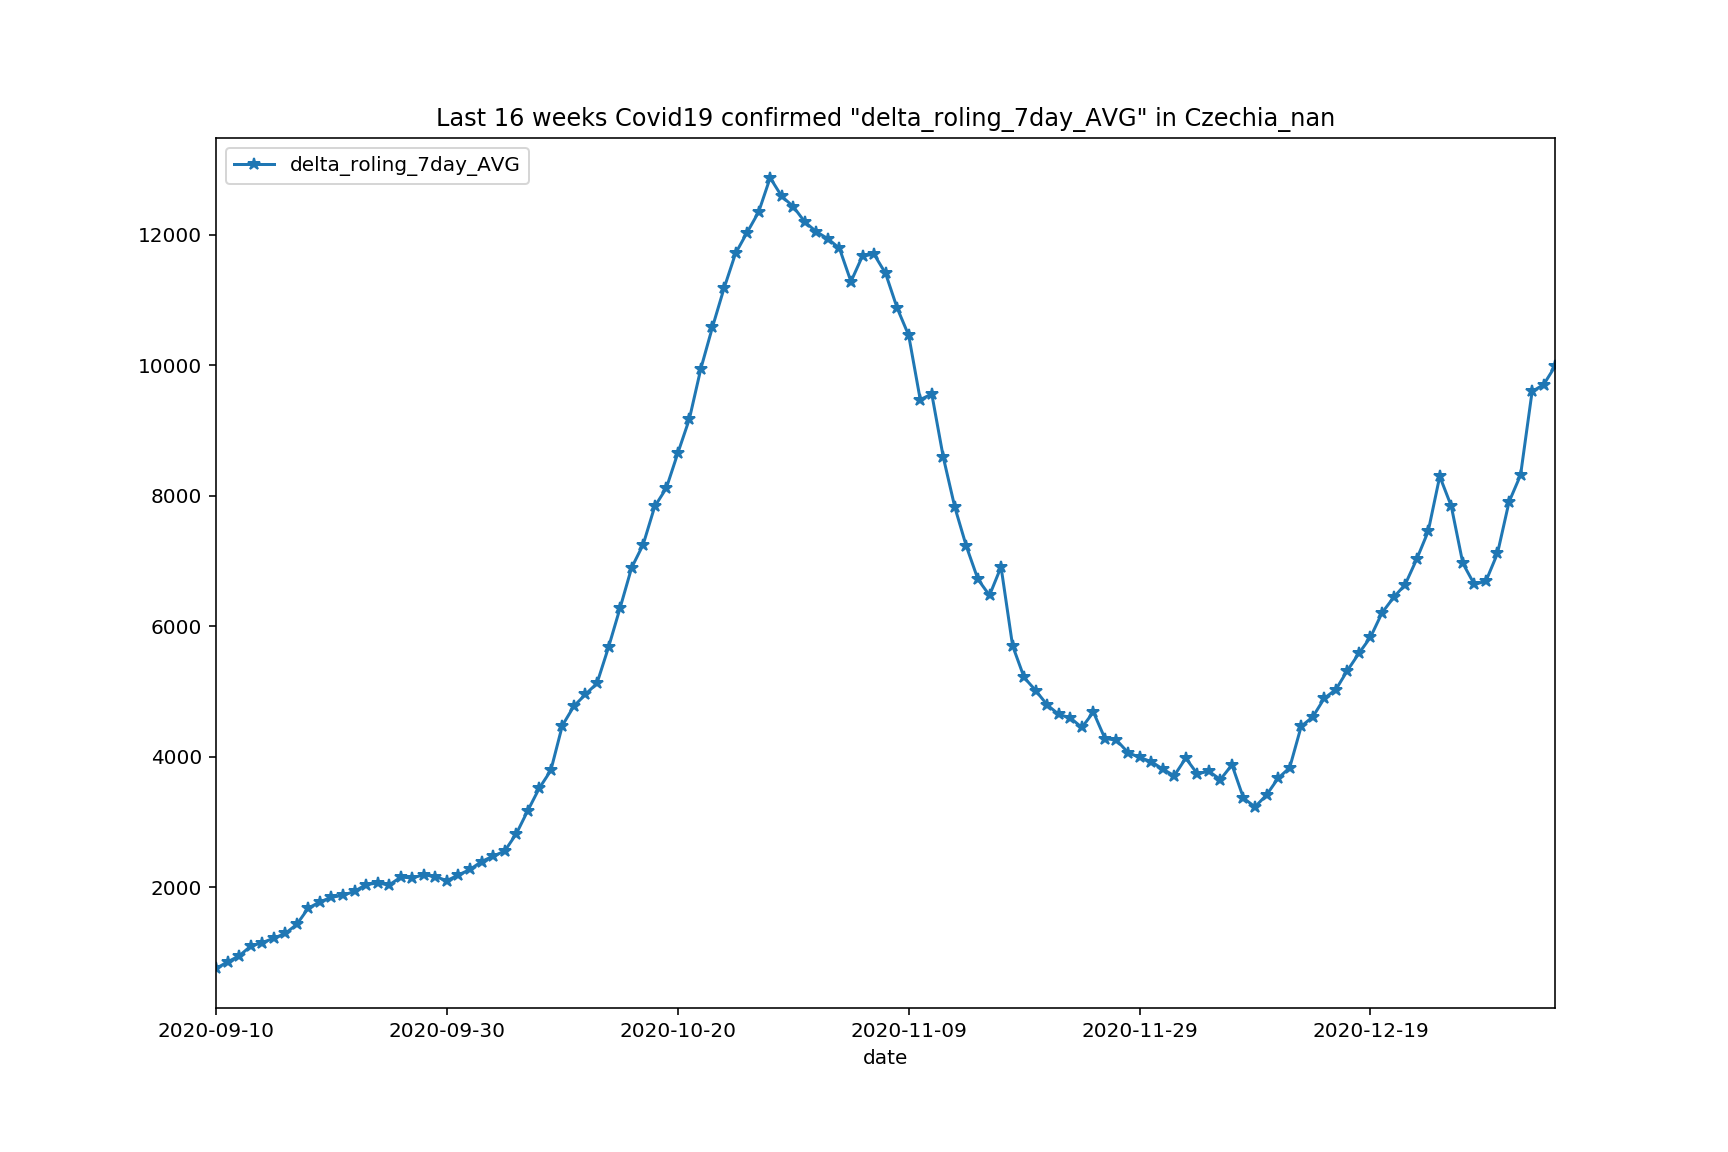

In [70]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


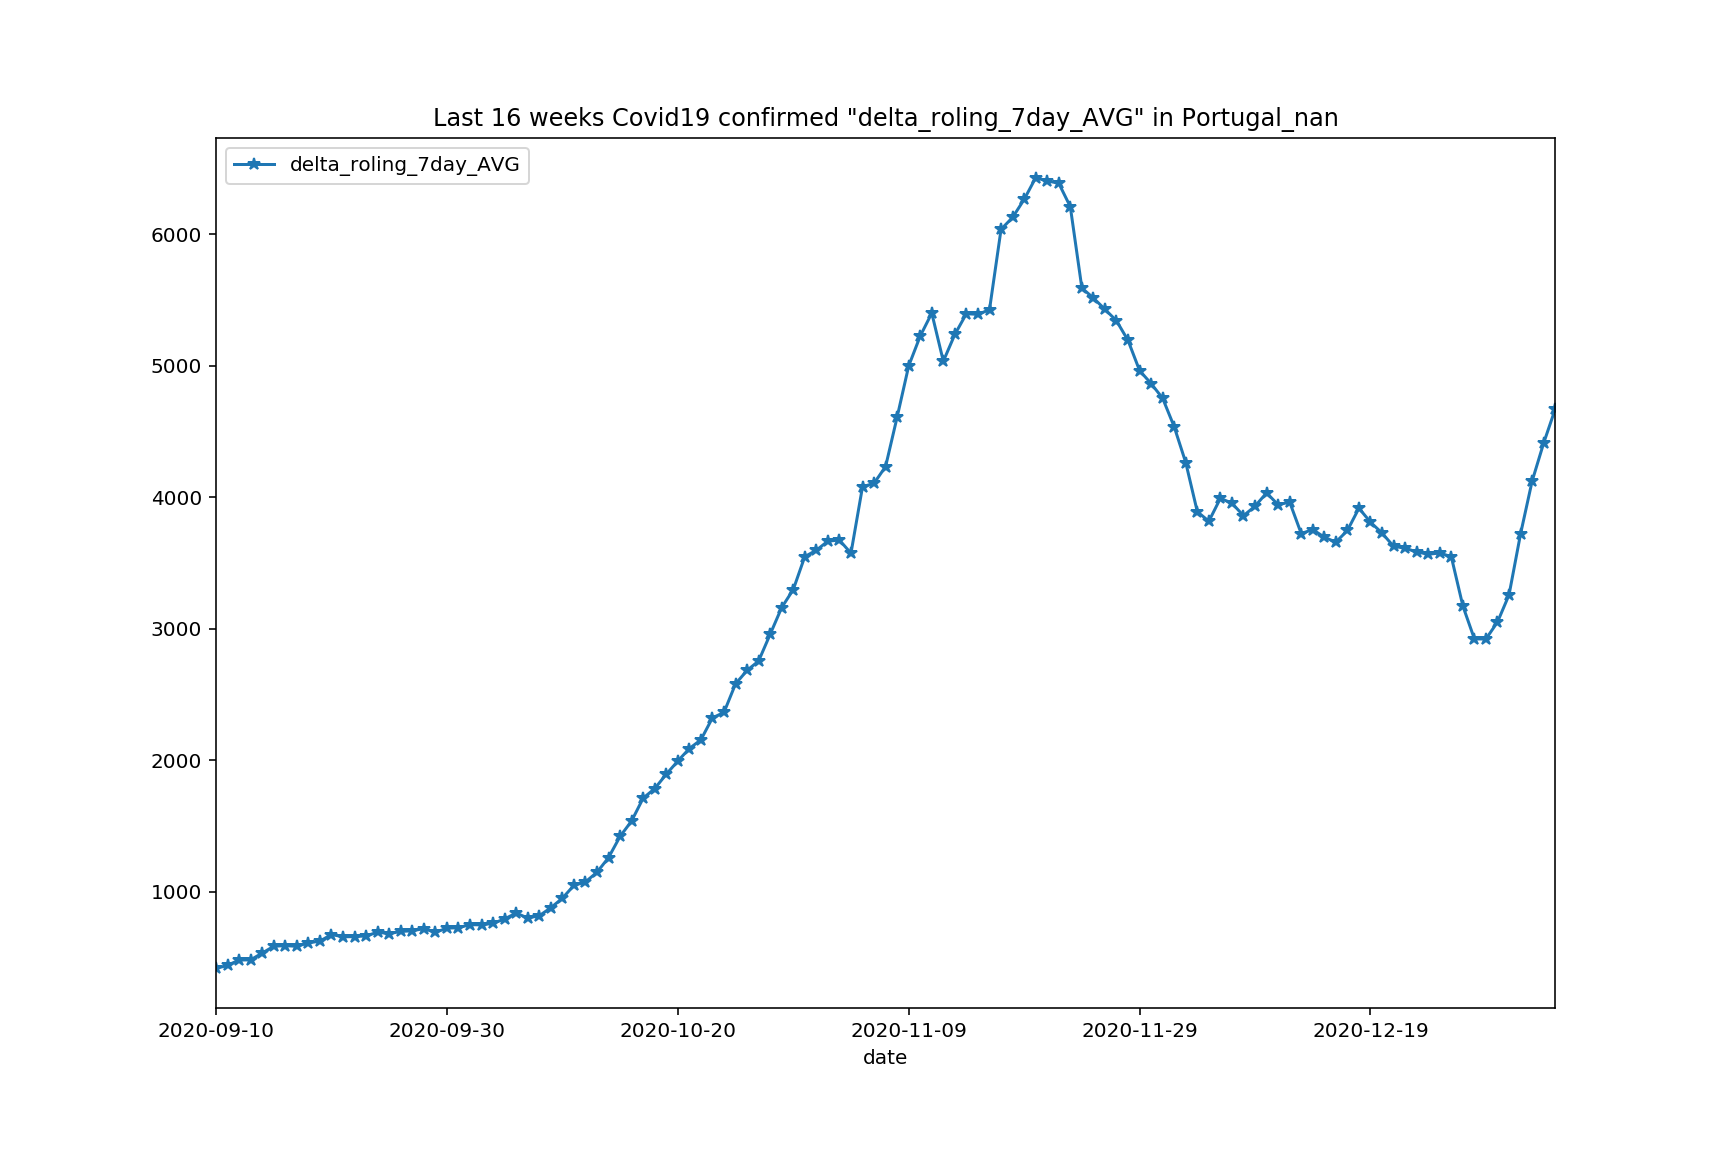

In [71]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [72]:
print("Validation Analysis 1day-Forecast and last 16 weeks evolution plot for: https://FuelBigData.com/blog is done!")

Validation Analysis 1day-Forecast and last 16 weeks evolution plot for: https://FuelBigData.com/blog is done!


In [73]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
